# BHANU PRATAP REDDY - 19/02/2023

### Library Imports and QoL Settings

In [1727]:
## Importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
from warnings import filterwarnings
from datetime import datetime 
filterwarnings("ignore")

#Visualization
from statsmodels.graphics.tsaplots import month_plot

#Dates
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

#TS Plots
from statsmodels.graphics.tsaplots import month_plot

#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

#Evaluation Smoothing and prediction
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#Metrics
from sklearn import metrics

#Statistics
from statsmodels.distributions.empirical_distribution import ECDF

#Dickey fuller Test
from statsmodels.tsa.stattools import adfuller

#Autocorrelation and Partial Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Iteration
import itertools

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#Mean Squared Error
from sklearn.metrics import  mean_squared_error

#Linear Regression
from sklearn.linear_model import LinearRegression

#Exponential Smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#SARIMA
import statsmodels.api as sm

### Data Import

In [1728]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')     # month/day/year
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [1729]:
Sparkling_wine_time_s = pd.read_csv("D:/Visual Studio Projects/Python/Great Learning Data Science/Datasets/Sparkling.csv")
Sparkling_wine_time_s.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [1730]:
Sparkling_wine_time_s['YearMonth'] = date
Sparkling_wine_time_s.set_index('YearMonth',inplace=True)

In [1731]:
Sparkling_wine_time_s.head()

Sparkling
YearMonth            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [1732]:
Rose_wine_time_s = pd.read_csv("D:/Visual Studio Projects/Python/Great Learning Data Science/Datasets/Rose.csv")
Rose_wine_time_s.head()

YearMonth   Rose
0   1980-01 112.00
1   1980-02 118.00
2   1980-03 129.00
3   1980-04  99.00
4   1980-05 116.00

In [1733]:
Rose_wine_time_s['YearMonth'] = date
Rose_wine_time_s.set_index('YearMonth',inplace=True)

In [1734]:
Rose_wine_time_s.head()

Rose
YearMonth        
1980-01-31 112.00
1980-02-29 118.00
1980-03-31 129.00
1980-04-30  99.00
1980-05-31 116.00

### EDA

In [1735]:
Sparkling_wine_time_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [1736]:
Rose_wine_time_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [1737]:
(Sparkling_wine_time_s.index == Rose_wine_time_s.index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [1738]:
Sparkling_wine_time_s.isnull().sum()

Sparkling    0
dtype: int64

In [1739]:
Rose_wine_time_s.isnull().sum()

Rose    2
dtype: int64

#### Imputing Missing values using Forward Fill

In [1740]:
Rose_wine_time_s["Rose"] = Rose_wine_time_s["Rose"].fillna(method='ffill')

In [1741]:
Rose_wine_time_s.isnull().sum()

Rose    0
dtype: int64

In [1742]:
Sparkling_wine_time_s.describe()

Sparkling
count     187.00
mean     2402.42
std      1295.11
min      1070.00
25%      1605.00
50%      1874.00
75%      2549.00
max      7242.00

In [1743]:
Rose_wine_time_s.describe()

Rose
count 187.00
mean   89.91
std    39.24
min    28.00
25%    62.50
50%    85.00
75%   111.00
max   267.00

### Data Plot and Initial Analysis

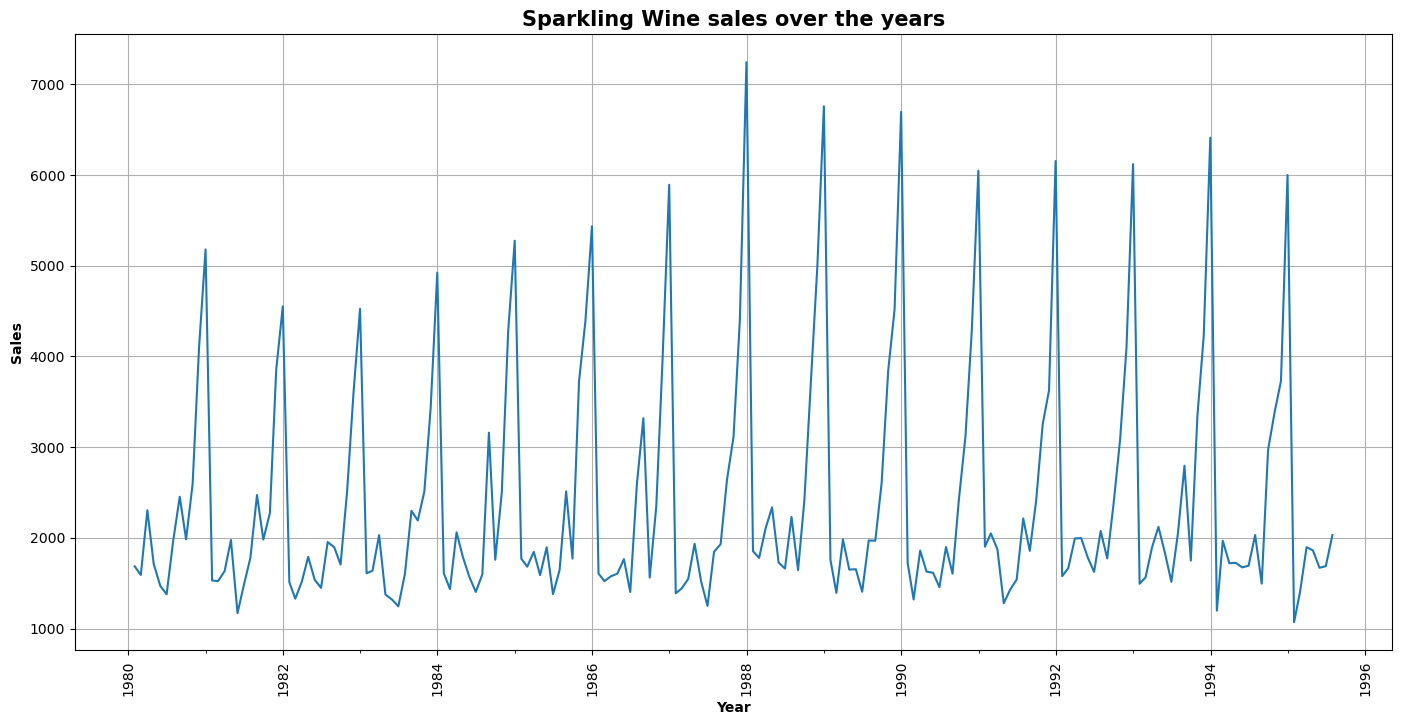

In [1744]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(17, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Sparkling_wine_time_s.index.values,Sparkling_wine_time_s['Sparkling'])
#ax.plot(Sparkling_wine_time_s.index.values,Sparkling_wine_time_s['Age'],color='purple')

# Set title and labels for axes
plt.title("Sparkling Wine sales over the years",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

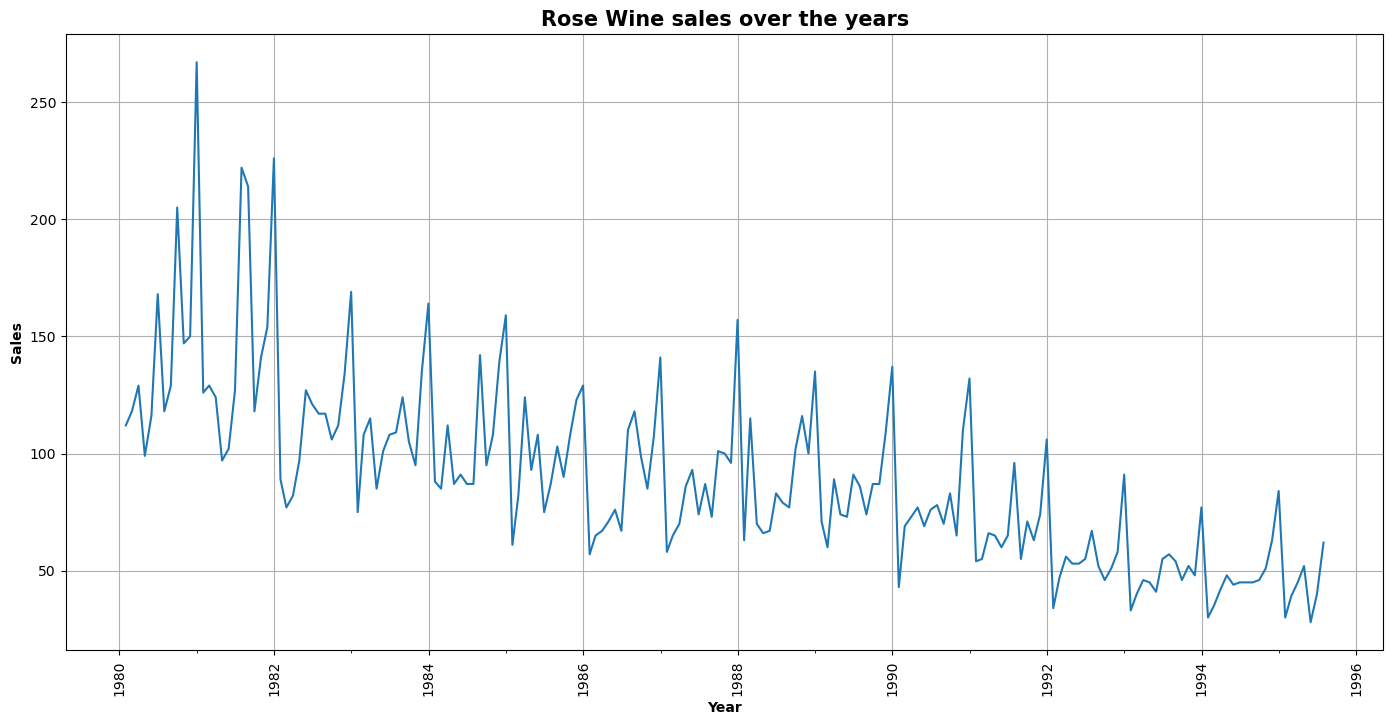

In [1745]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(17, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Rose_wine_time_s.index.values,Rose_wine_time_s['Rose'])
#ax.plot(Rose_wine_time_s.index.values,Rose_wine_time_s['Age'],color='purple')

# Set title and labels for axes
plt.title("Rose Wine sales over the years",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

#### Yearly Analysis

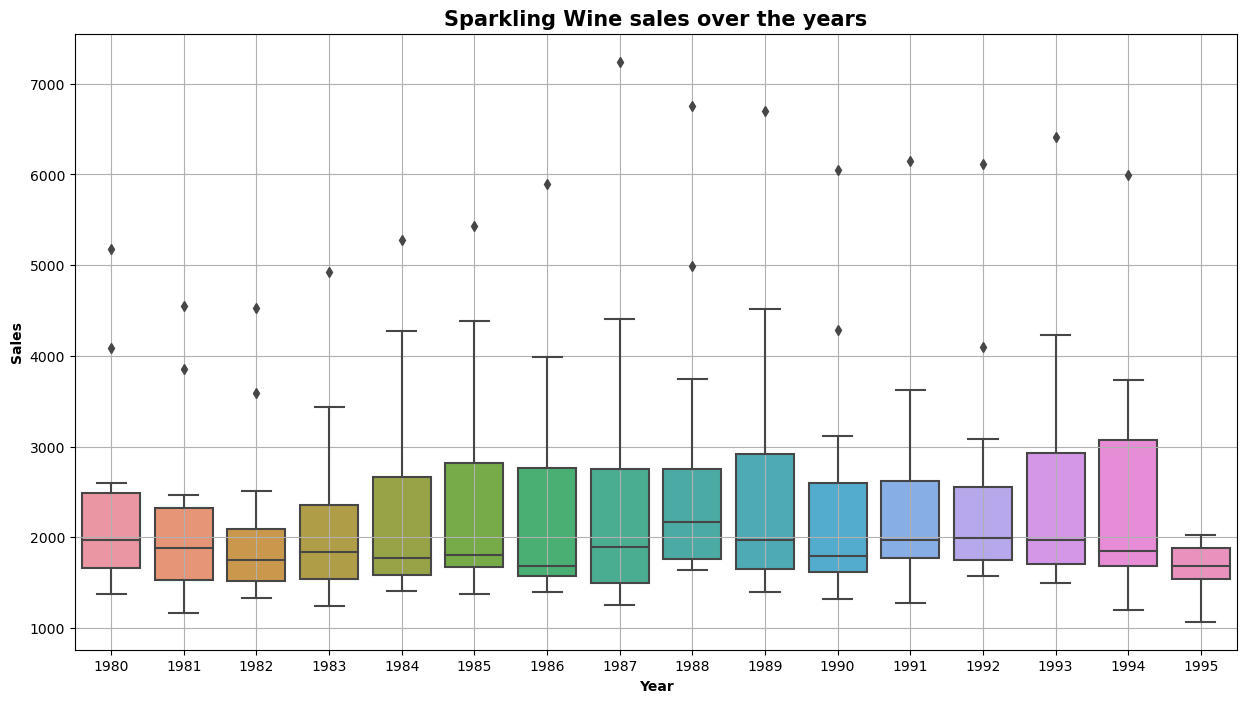

In [1746]:
plt.figure(figsize=(15,8))
sns.boxplot(x = Sparkling_wine_time_s.index.year,y = Sparkling_wine_time_s['Sparkling'])
plt.title("Sparkling Wine sales over the years",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")
plt.grid();

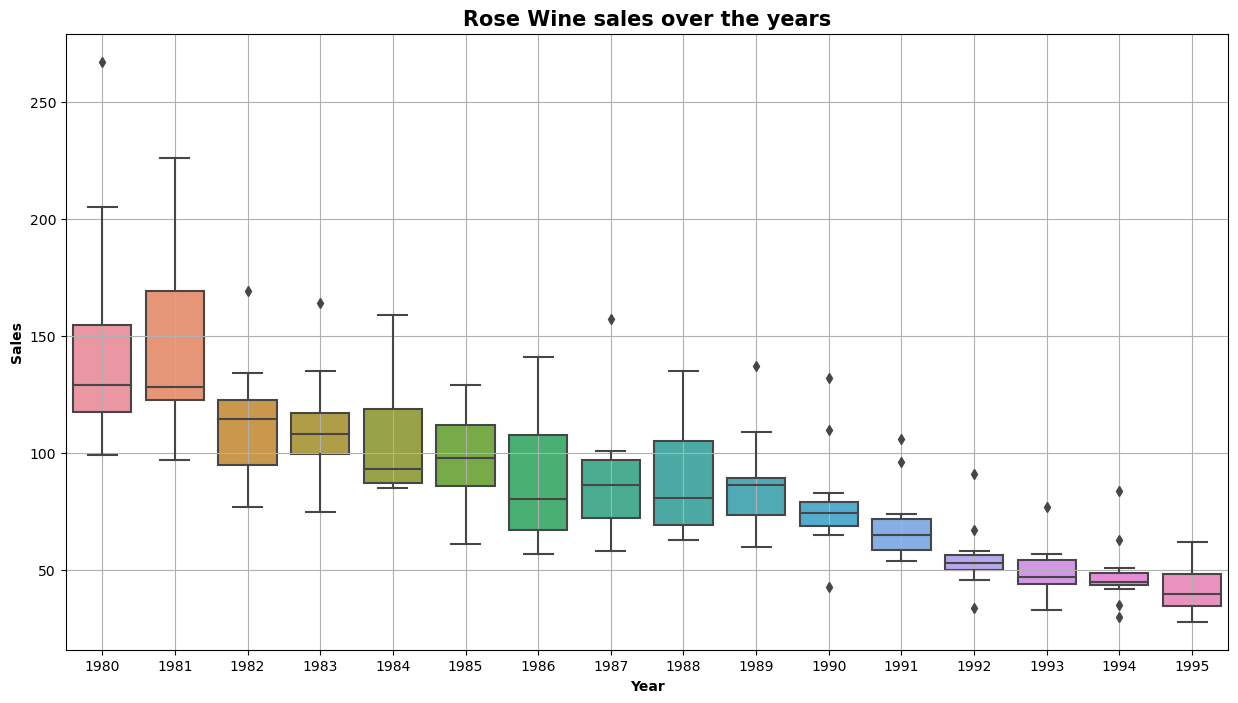

In [1747]:
plt.figure(figsize=(15,8))
sns.boxplot(x = Rose_wine_time_s.index.year,y = Rose_wine_time_s['Rose'])
plt.title("Rose Wine sales over the years",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")
plt.grid();

#### Month Plot to understand the spread of sales in a particular month across different years and within different months across years.

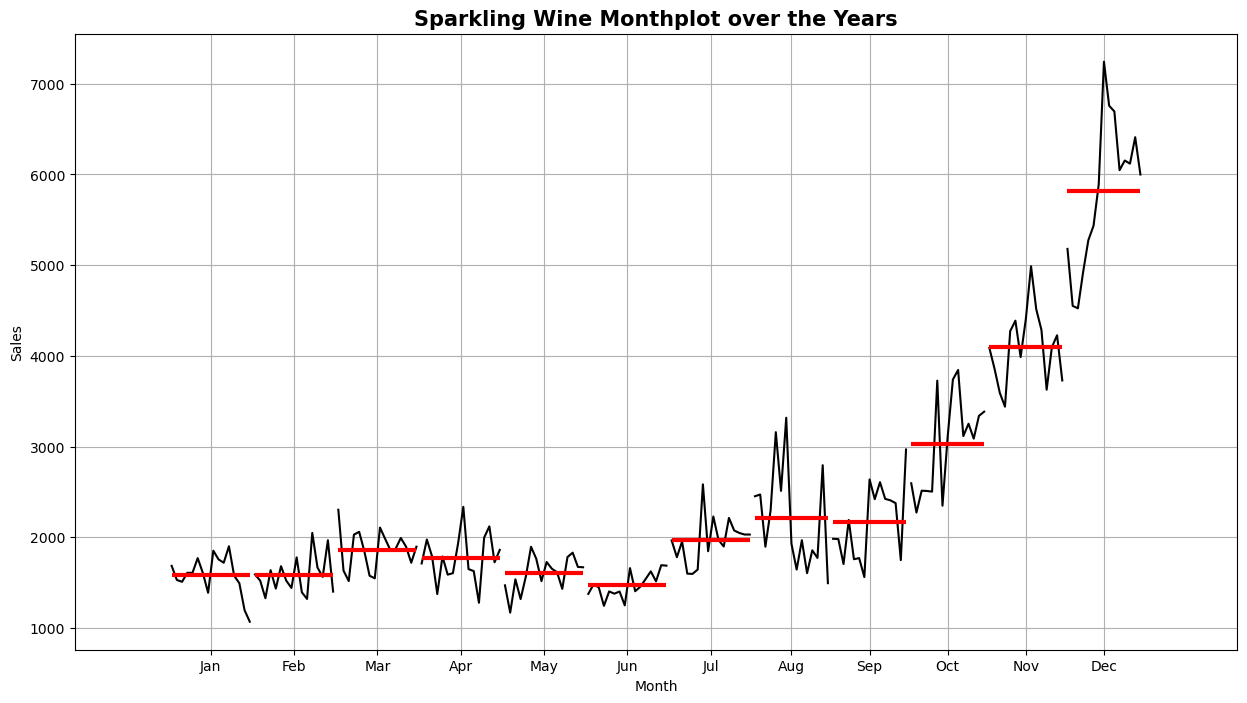

In [1748]:
rcParams['figure.figsize'] = 15,8
month_plot(Sparkling_wine_time_s['Sparkling'])

plt.title("Sparkling Wine Monthplot over the Years",fontsize=15, weight="bold")
plt.xlabel("Month",fontsize=10)
plt.ylabel("Sales",fontsize=10)
plt.grid();

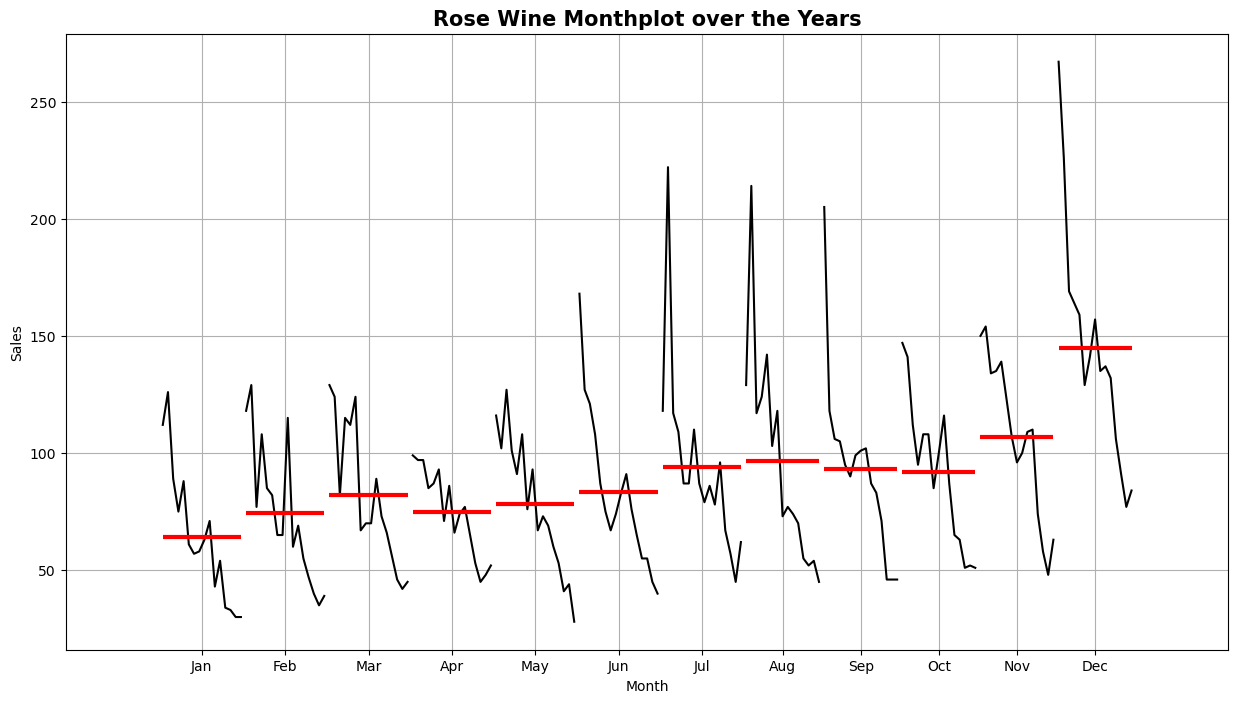

In [1749]:
rcParams['figure.figsize'] = 15,8
month_plot(Rose_wine_time_s['Rose'])

plt.title("Rose Wine Monthplot over the Years",fontsize=15, weight="bold")
plt.xlabel("Month",fontsize=10)
plt.ylabel("Sales",fontsize=10)
plt.grid();

### Time Series Decomposition

#### Sparkling Wine

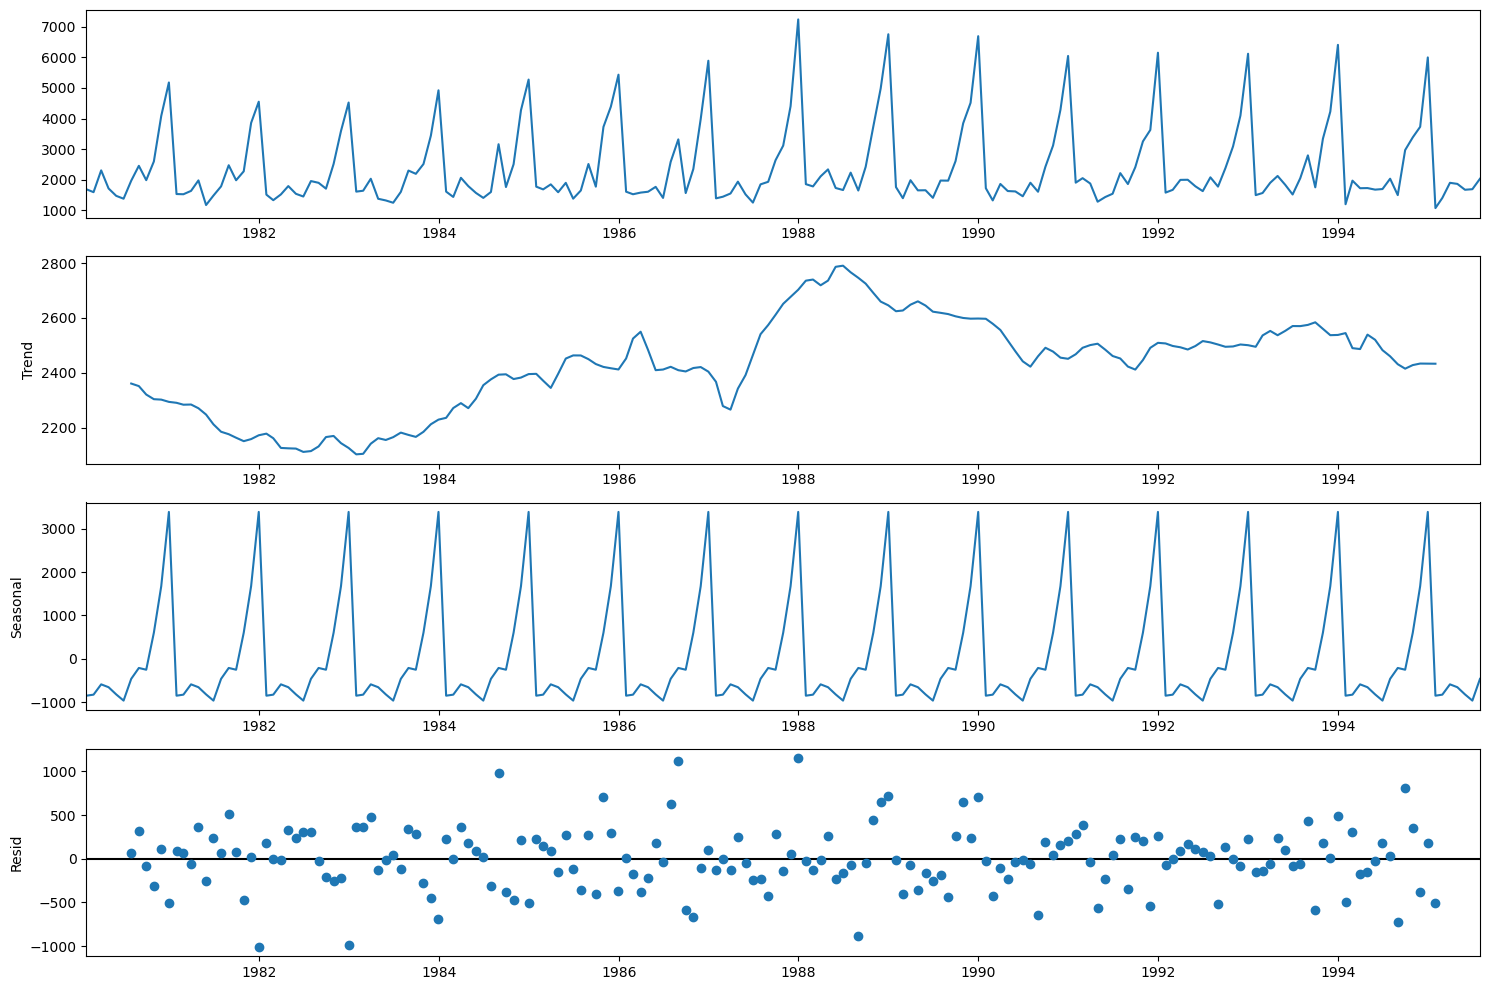

In [1750]:
rcParams['figure.figsize'] = 15,10
decomposition_add = seasonal_decompose(Sparkling_wine_time_s,model='additive', period = 12)
decomposition_add.plot();

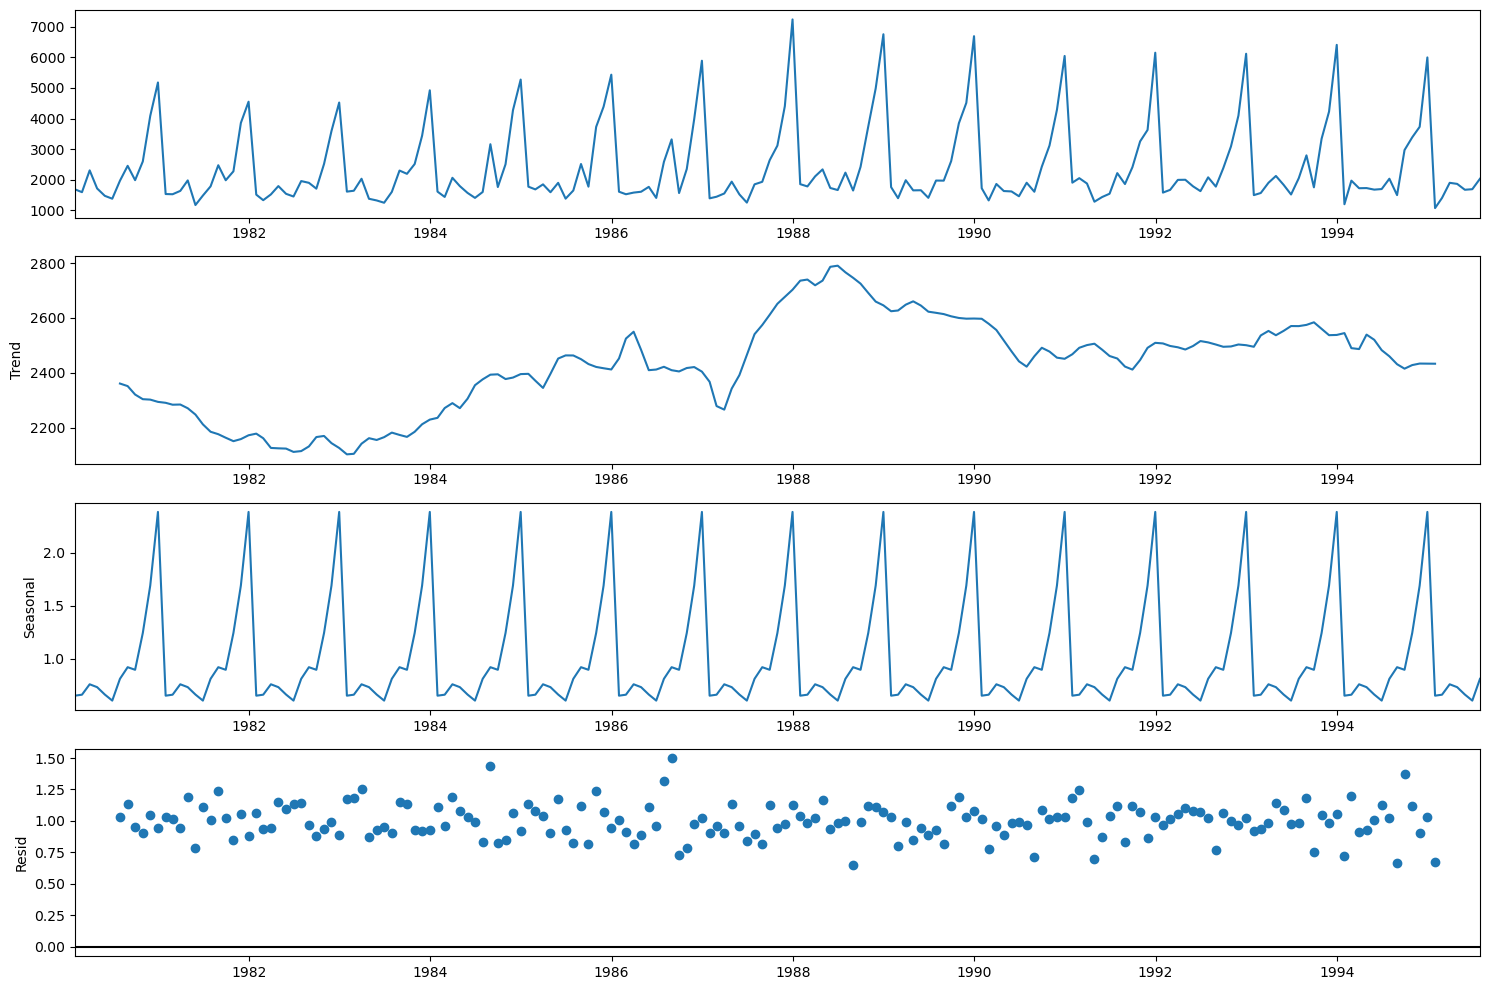

In [1751]:
rcParams['figure.figsize'] = 15,10
decomposition_add = seasonal_decompose(Sparkling_wine_time_s,model='multiplicative', period = 12)
decomposition_add.plot();

#### Rose Wine

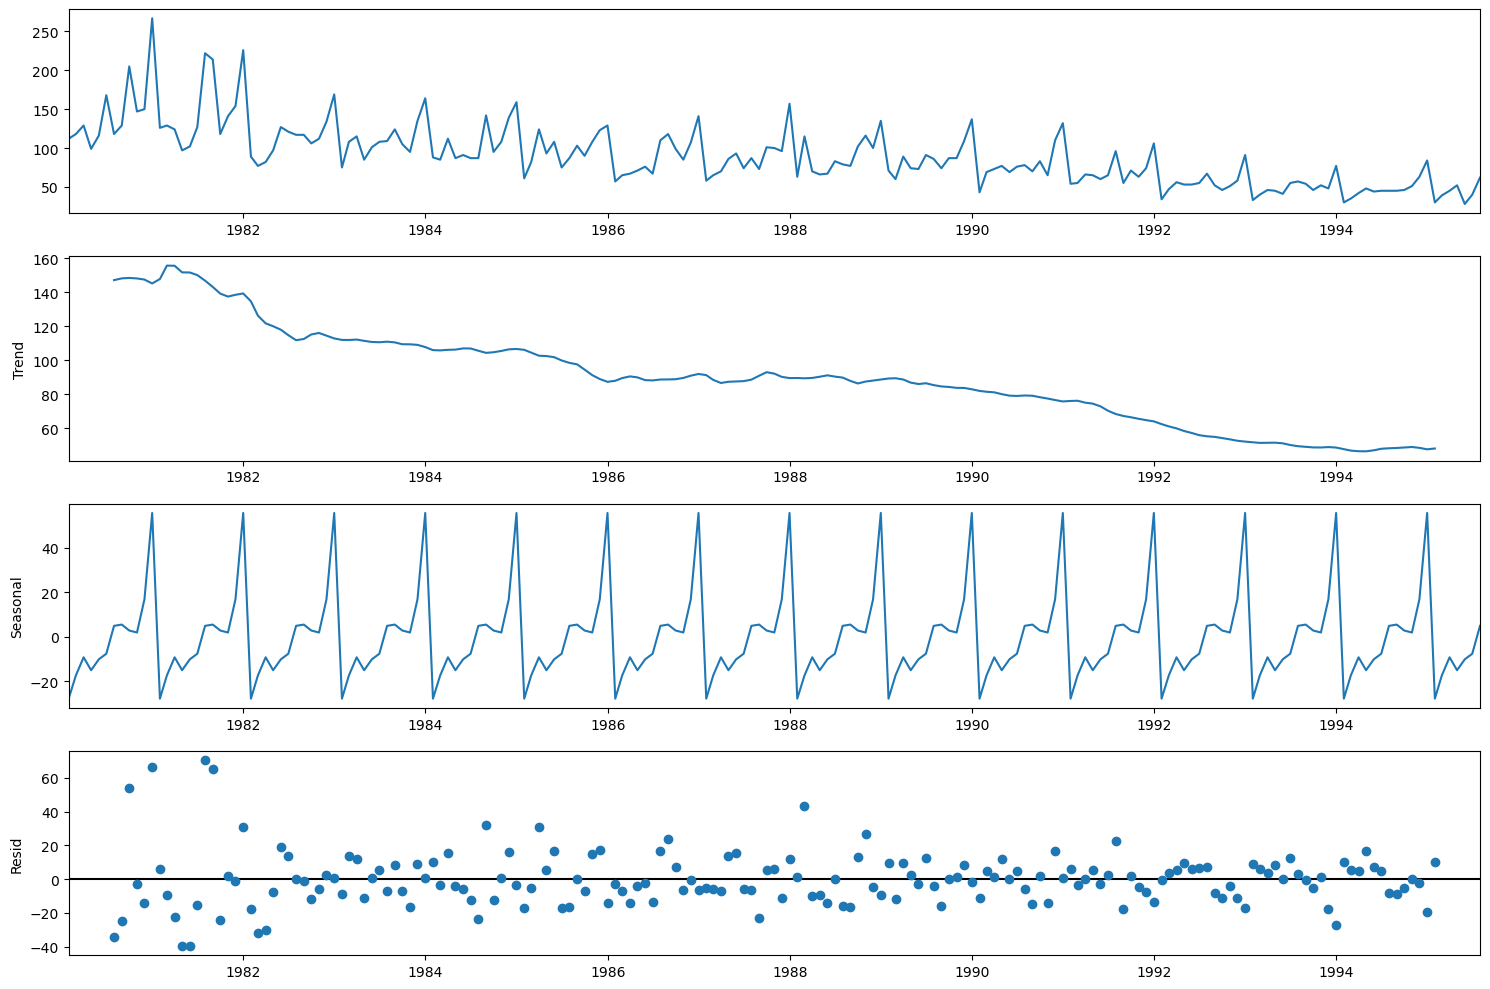

In [1752]:
rcParams['figure.figsize'] = 15,10
decomposition_add = seasonal_decompose(Rose_wine_time_s,model='additive', period = 12)
decomposition_add.plot();

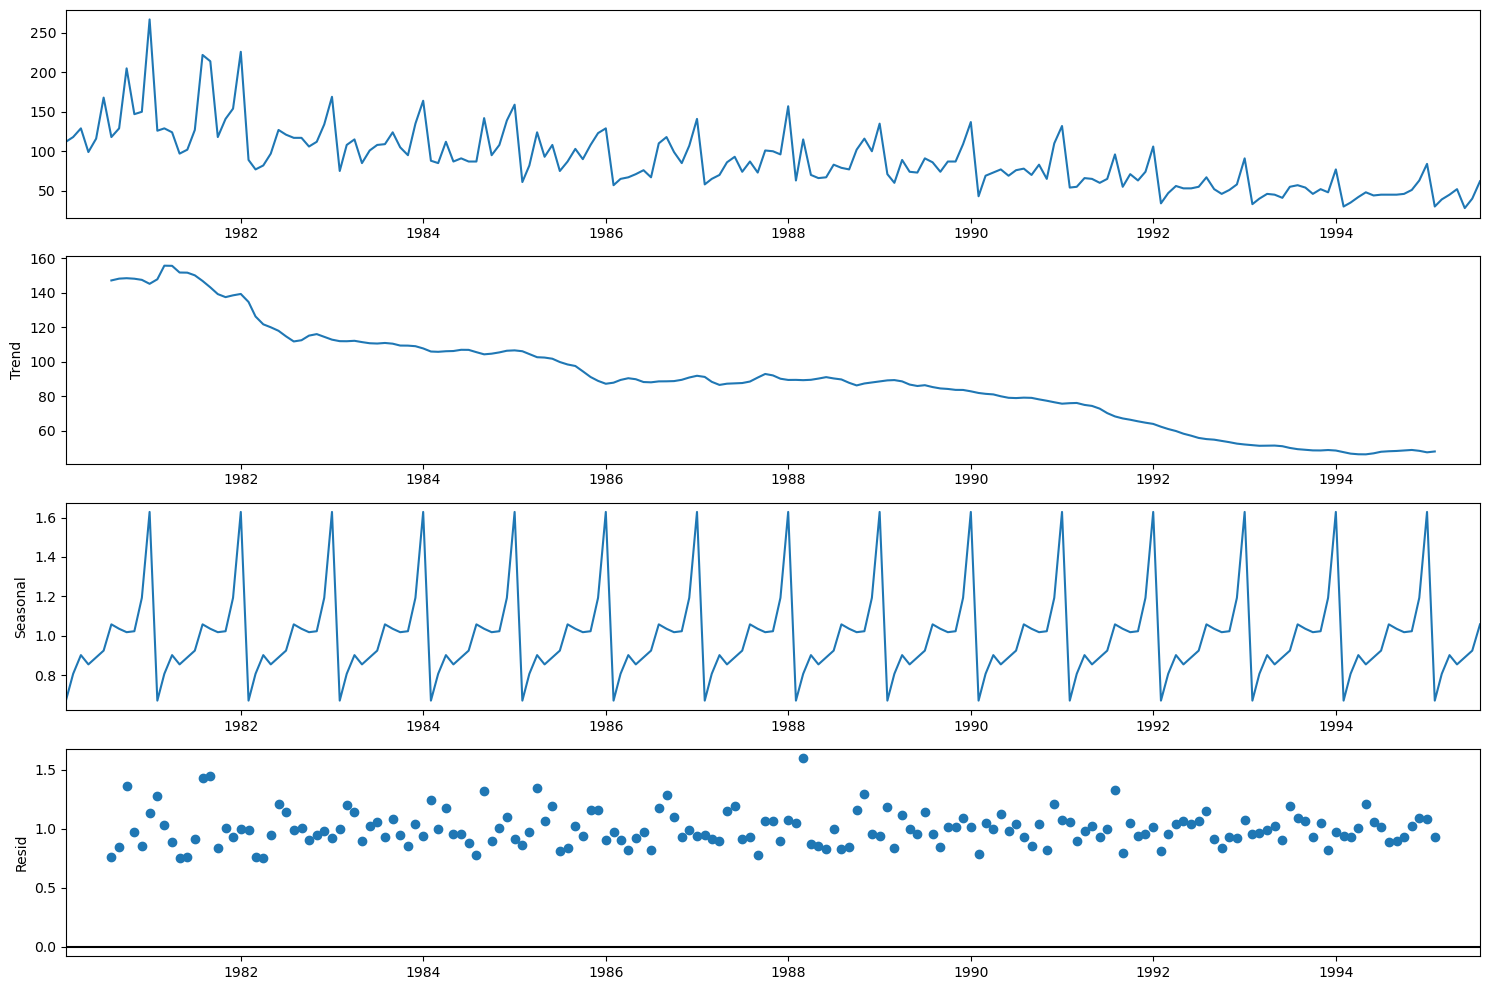

In [1753]:
rcParams['figure.figsize'] = 15,10
decomposition_add = seasonal_decompose(Rose_wine_time_s,model='multiplicative', period = 12)
decomposition_add.plot();

### Train Test Split

#### Sparkling Wine

In [1754]:
Sparkling_train = Sparkling_wine_time_s[Sparkling_wine_time_s.index.year < 1991]
Sparkling_test = Sparkling_wine_time_s[Sparkling_wine_time_s.index.year >= 1991]

In [1755]:
print('First few rows of Training Data')
display(Sparkling_train.head())
print('Last few rows of Training Data')
display(Sparkling_train.tail())
print('First few rows of Test Data')
display(Sparkling_test.head())
print('Last few rows of Test Data')
display(Sparkling_test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

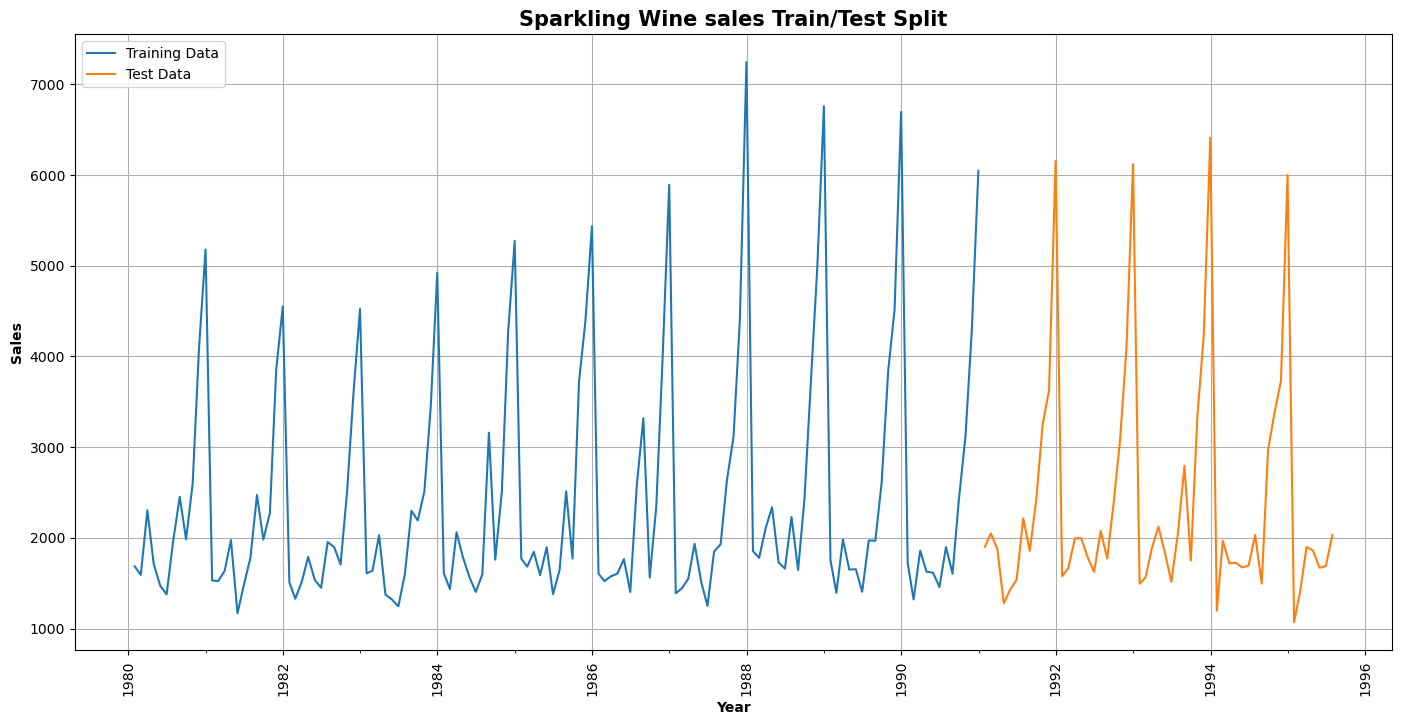

In [1756]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(17, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Sparkling_train.index.values,Sparkling_train['Sparkling'])
ax.plot(Sparkling_test.index.values,Sparkling_test['Sparkling'])

# Set title and labels for axes
plt.legend(['Training Data','Test Data'],loc="upper left")
plt.title("Sparkling Wine sales Train/Test Split",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

#### Rose Wine

In [1757]:
Rose_train = Rose_wine_time_s[Rose_wine_time_s.index.year < 1991]
Rose_test = Rose_wine_time_s[Rose_wine_time_s.index.year >= 1991]

In [1758]:
print('First few rows of Training Data')
display(Rose_train.head())
print('Last few rows of Training Data')
display(Rose_train.tail())
print('First few rows of Test Data')
display(Rose_test.head())
print('Last few rows of Test Data')
display(Rose_test.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-31 112.00
1980-02-29 118.00
1980-03-31 129.00
1980-04-30  99.00
1980-05-31 116.00

Last few rows of Training Data


Rose
YearMonth        
1990-08-31  70.00
1990-09-30  83.00
1990-10-31  65.00
1990-11-30 110.00
1990-12-31 132.00

First few rows of Test Data


Rose
YearMonth       
1991-01-31 54.00
1991-02-28 55.00
1991-03-31 66.00
1991-04-30 65.00
1991-05-31 60.00

Last few rows of Test Data


Rose
YearMonth       
1995-03-31 45.00
1995-04-30 52.00
1995-05-31 28.00
1995-06-30 40.00
1995-07-31 62.00

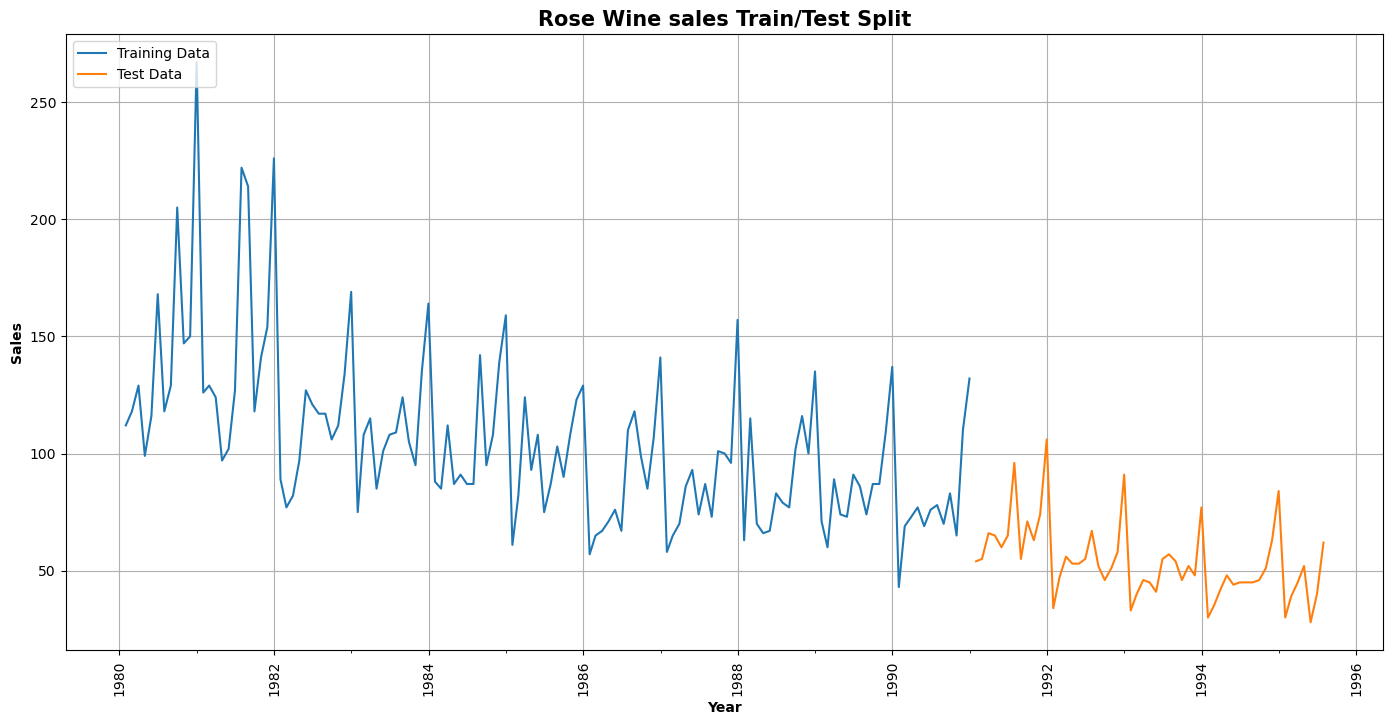

In [1759]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(17, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Rose_train.index.values,Rose_train['Rose'])
ax.plot(Rose_test.index.values,Rose_test['Rose'])

# Set title and labels for axes
plt.legend(['Training Data','Test Data'],loc="upper left")
plt.title("Rose Wine sales Train/Test Split",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

### Smoothing and Evaluation Models

#### Sparkling Wine

##### Linear Regression

In [1760]:
#Before Evaluating Models we shall standerdize time to help for Regression Application
Sparkling_train_time = [i+1 for i in range(len(Sparkling_train))]
Sparkling_test_time = [i+len(Sparkling_train)+1 for i in range(len(Sparkling_test))]

print('Training Time instance','\n',Sparkling_train_time,'\n')
print('Test Time instance','\n',Sparkling_test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132] 

Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [1761]:
Sparkling_LinearRegression_train = Sparkling_train.copy()
Sparkling_LinearRegression_test = Sparkling_test.copy()

Sparkling_LinearRegression_train['time'] = Sparkling_train_time
Sparkling_LinearRegression_test['time'] = Sparkling_test_time

In [1762]:
Sparkling_LinearRegression_train.head()

Sparkling  time
YearMonth                  
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5

In [1763]:
Sparkling_LinearRegression_test.head()

Sparkling  time
YearMonth                  
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137

In [1764]:
#declare Linear Reg Model and Fit
Sparkling_lr_model = LinearRegression()
Sparkling_lr = Sparkling_lr_model.fit(Sparkling_LinearRegression_train[['time']],Sparkling_LinearRegression_train['Sparkling'].values)

In [1765]:
#Predict Values
Sparkling_test_predictions_model = Sparkling_lr.predict(Sparkling_LinearRegression_test[['time']])
Sparkling_LinearRegression_test['RegOnTime'] = Sparkling_test_predictions_model

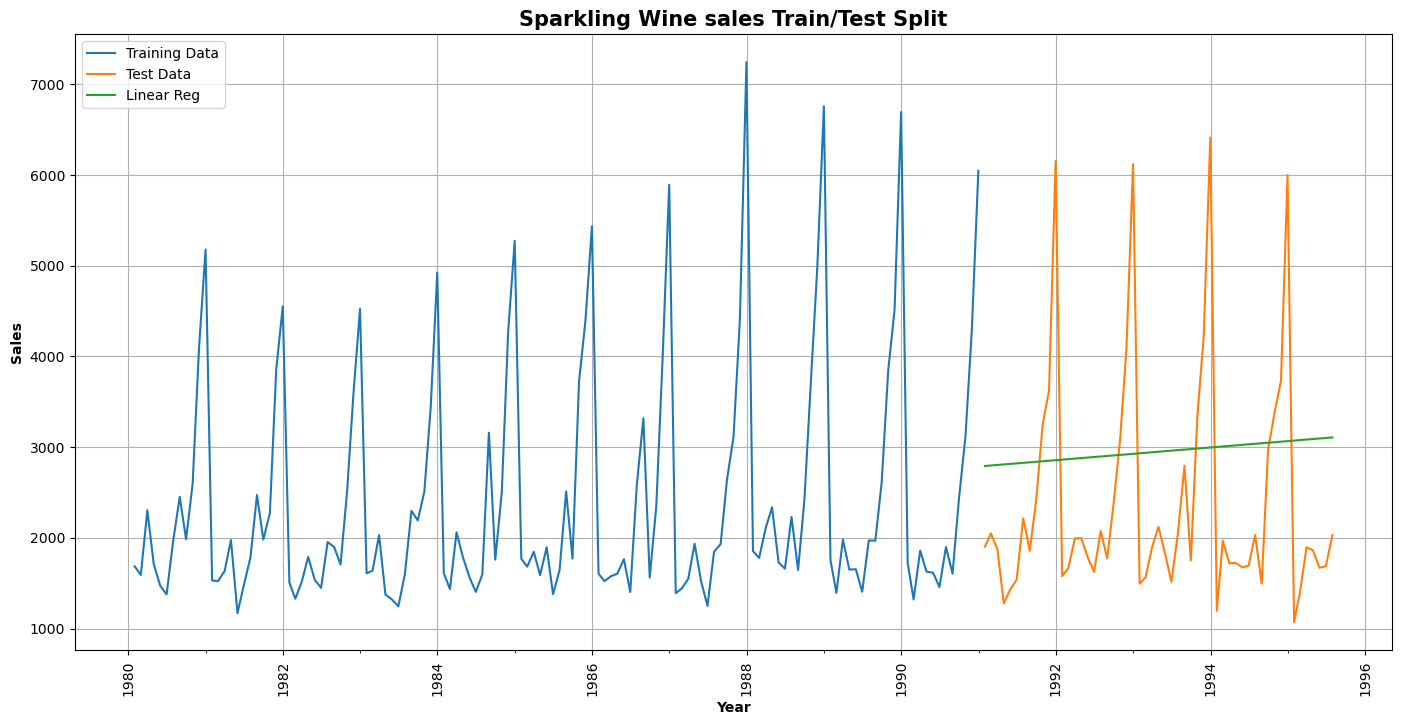

In [1766]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(17, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Sparkling_train.index.values,Sparkling_train['Sparkling'])
ax.plot(Sparkling_test.index.values,Sparkling_test['Sparkling'])
ax.plot(Sparkling_LinearRegression_test.index.values,Sparkling_LinearRegression_test['RegOnTime'])

# Set title and labels for axes
plt.legend(['Training Data','Test Data','Linear Reg'],loc="upper left")
plt.title("Sparkling Wine sales Train/Test Split",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

In [1767]:
#Evaluation Using RMSE
rmse_model1_test = metrics.mean_squared_error(Sparkling_LinearRegression_test['Sparkling'],Sparkling_test_predictions_model,squared=False)

Sparkling_resultsDf = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['Sparkling - Linear Regression'])
Sparkling_resultsDf

RMSE
Sparkling - Linear Regression 1389.14

##### Naive Model

In [1768]:
Sparkling_NaiveModel_train = Sparkling_train.copy()
Sparkling_NaiveModel_test = Sparkling_test.copy()

In [1769]:
Sparkling_NaiveModel_test['naive'] = np.asarray(Sparkling_NaiveModel_train['Sparkling'])[len(Sparkling_NaiveModel_train['Sparkling'])-1]
Sparkling_NaiveModel_test['naive'].head()

YearMonth
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

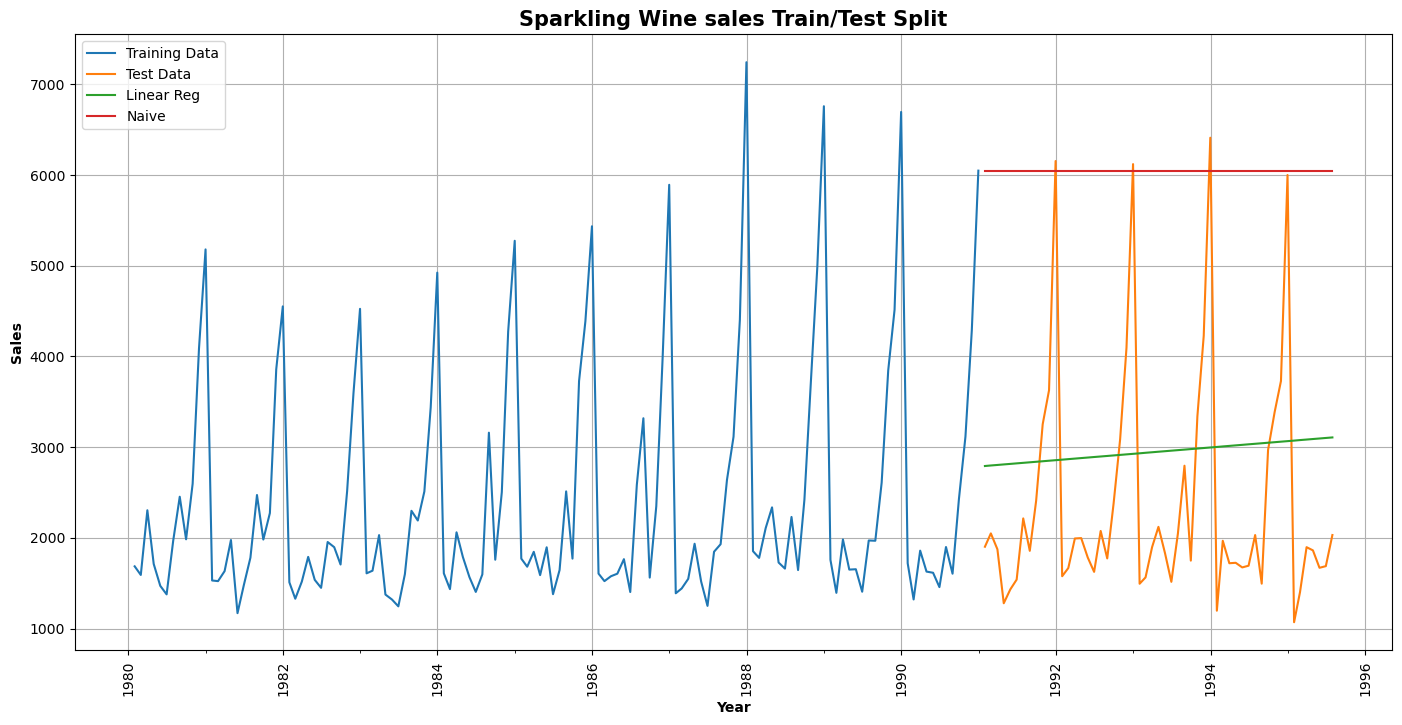

In [1770]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(17, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Sparkling_train.index.values,Sparkling_train['Sparkling'])
ax.plot(Sparkling_test.index.values,Sparkling_test['Sparkling'])
ax.plot(Sparkling_LinearRegression_test.index.values,Sparkling_LinearRegression_test['RegOnTime'])
ax.plot(Sparkling_NaiveModel_test.index.values,Sparkling_NaiveModel_test['naive'])

# Set title and labels for axes
plt.legend(['Training Data','Test Data','Linear Reg','Naive'],loc="upper left")
plt.title("Sparkling Wine sales Train/Test Split",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

In [1771]:
#Evaluation Using RMSE
rmse_model2_test = metrics.mean_squared_error(Sparkling_NaiveModel_test['Sparkling'],Sparkling_NaiveModel_test['naive'],squared=False)

Sparkling_resultsDf2 = pd.DataFrame({'RMSE': [rmse_model2_test]},index=['Sparkling - Naive Forecast'])

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_resultsDf2])
Sparkling_resultsDf

RMSE
Sparkling - Linear Regression 1389.14
Sparkling - Naive Forecast    3864.28

##### Simple Average

In [1772]:
Sparkling_SimpleAverage_train = Sparkling_train.copy()
Sparkling_SimpleAverage_test = Sparkling_test.copy()

In [1773]:
Sparkling_SimpleAverage_test['mean_forecast'] = Sparkling_SimpleAverage_train['Sparkling'].mean()
Sparkling_SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-31       1902        2403.78
1991-02-28       2049        2403.78
1991-03-31       1874        2403.78
1991-04-30       1279        2403.78
1991-05-31       1432        2403.78

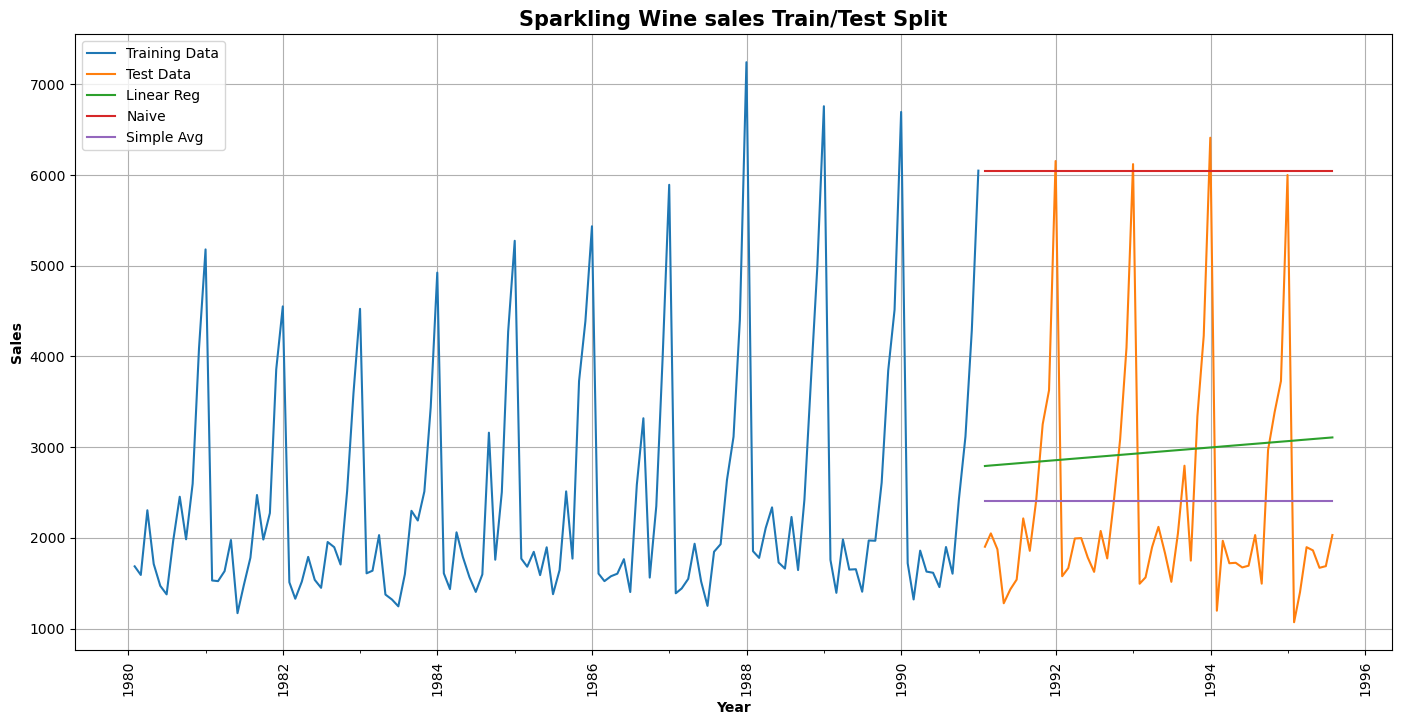

In [1774]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(17, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Sparkling_train.index.values,Sparkling_train['Sparkling'])
ax.plot(Sparkling_test.index.values,Sparkling_test['Sparkling'])
ax.plot(Sparkling_LinearRegression_test.index.values,Sparkling_LinearRegression_test['RegOnTime'])
ax.plot(Sparkling_NaiveModel_test.index.values,Sparkling_NaiveModel_test['naive'])
ax.plot(Sparkling_SimpleAverage_test.index.values,Sparkling_SimpleAverage_test['mean_forecast'])

# Set title and labels for axes
plt.legend(['Training Data','Test Data','Linear Reg','Naive','Simple Avg'],loc="upper left")
plt.title("Sparkling Wine sales Train/Test Split",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

In [1775]:
#Evaluation Using RMSE
rmse_model3_test = metrics.mean_squared_error(Sparkling_SimpleAverage_test['Sparkling'],Sparkling_SimpleAverage_test['mean_forecast'],squared=False)

Sparkling_resultsDf2 = pd.DataFrame({'RMSE': [rmse_model3_test]},index=['Sparkling - Simple Average'])

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_resultsDf2])
Sparkling_resultsDf

RMSE
Sparkling - Linear Regression 1389.14
Sparkling - Naive Forecast    3864.28
Sparkling - Simple Average    1275.08

##### Moving Average

In [1776]:
Sparkling_MovingAvg = Sparkling_wine_time_s.copy()
Sparkling_MovingAvg.head()

Sparkling
YearMonth            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [1777]:

Sparkling_MovingAvg['Trailing_2'] = Sparkling_MovingAvg['Sparkling'].rolling(2).mean()
Sparkling_MovingAvg['Trailing_4'] = Sparkling_MovingAvg['Sparkling'].rolling(4).mean()
Sparkling_MovingAvg['Trailing_6'] = Sparkling_MovingAvg['Sparkling'].rolling(6).mean()
Sparkling_MovingAvg['Trailing_9'] = Sparkling_MovingAvg['Sparkling'].rolling(9).mean()

Sparkling_MovingAvg.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591     1638.50         NaN         NaN         NaN
1980-03-31       2304     1947.50         NaN         NaN         NaN
1980-04-30       1712     2008.00     1823.25         NaN         NaN
1980-05-31       1471     1591.50     1769.50         NaN         NaN

In [1778]:
#Train Test Split
Sparkling_MovingAvg_train = Sparkling_MovingAvg[Sparkling_MovingAvg.index.year < 1991]
Sparkling_MovingAvg_test = Sparkling_MovingAvg[Sparkling_MovingAvg.index.year >= 1991]

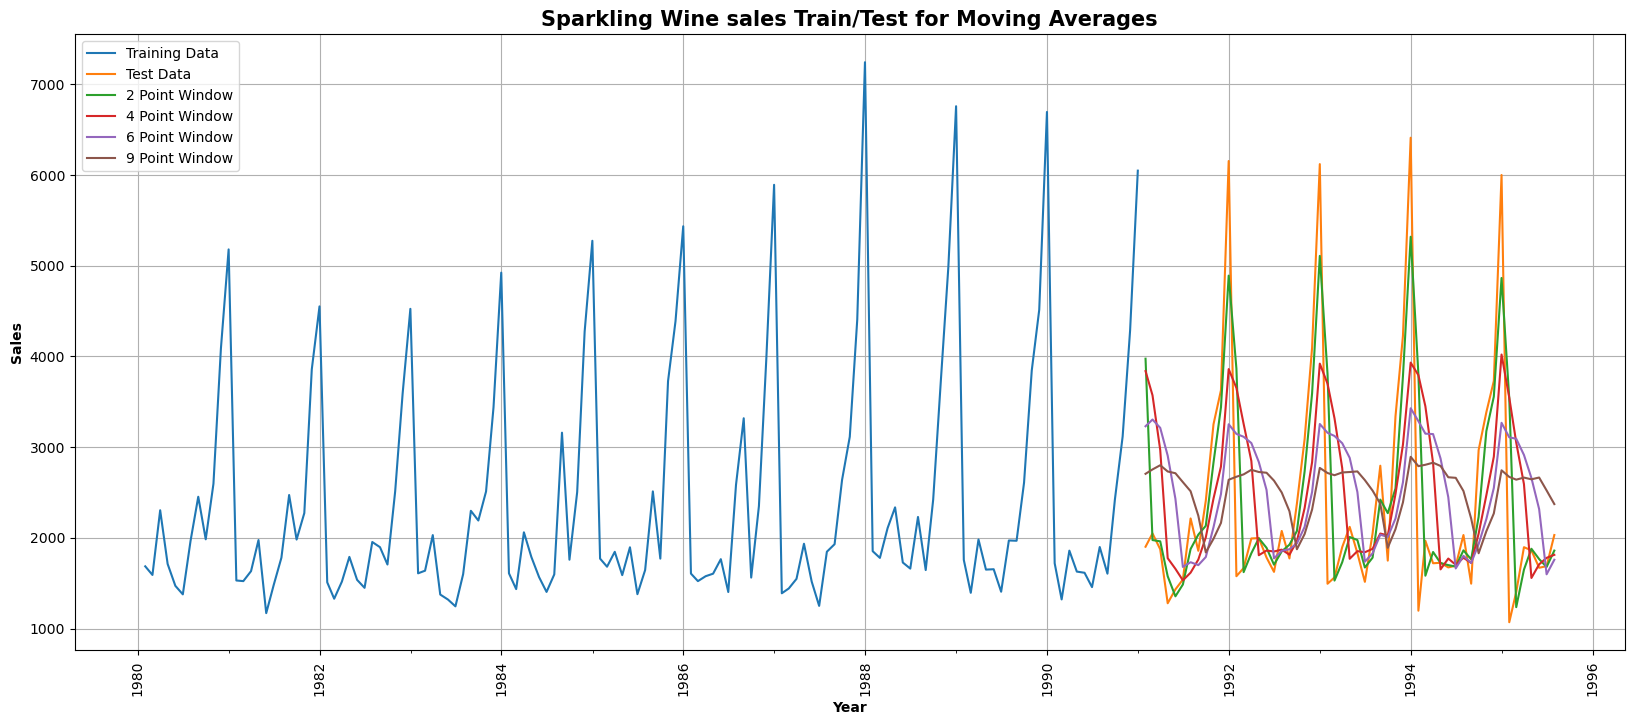

In [1779]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Sparkling_train.index.values,Sparkling_train['Sparkling'])
ax.plot(Sparkling_test.index.values,Sparkling_test['Sparkling'])
ax.plot(Sparkling_MovingAvg_test.index.values,Sparkling_MovingAvg_test['Trailing_2'])
ax.plot(Sparkling_MovingAvg_test.index.values,Sparkling_MovingAvg_test['Trailing_4'])
ax.plot(Sparkling_MovingAvg_test.index.values,Sparkling_MovingAvg_test['Trailing_6'])
ax.plot(Sparkling_MovingAvg_test.index.values,Sparkling_MovingAvg_test['Trailing_9'])

# Set title and labels for axes
plt.legend(['Training Data','Test Data','2 Point Window','4 Point Window','6 Point Window','9 Point Window'],loc="upper left")
plt.title("Sparkling Wine sales Train/Test for Moving Averages",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

In [1780]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(Sparkling_test['Sparkling'],Sparkling_MovingAvg_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(Sparkling_test['Sparkling'],Sparkling_MovingAvg_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(Sparkling_test['Sparkling'],Sparkling_MovingAvg_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(Sparkling_test['Sparkling'],Sparkling_MovingAvg_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [1781]:
#Evaluation Using RMSE
Sparkling_resultsDf4 = pd.DataFrame({'RMSE': [rmse_model4_test_2,rmse_model4_test_4,rmse_model4_test_6,rmse_model4_test_9]},index=['Sparkling - 2 pt Moving Avg','Sparkling - 4 pt Moving Avg','Sparkling - 6 pt Moving Avg','Sparkling - 9 pt Moving Avg'])

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_resultsDf4])
Sparkling_resultsDf

RMSE
Sparkling - Linear Regression 1389.14
Sparkling - Naive Forecast    3864.28
Sparkling - Simple Average    1275.08
Sparkling - 2 pt Moving Avg    813.40
Sparkling - 4 pt Moving Avg   1156.59
Sparkling - 6 pt Moving Avg   1283.93
Sparkling - 9 pt Moving Avg   1346.28

##### Single Exponential Smoothing

In [1782]:
Sparkling_SES_train = Sparkling_train.copy()
Sparkling_SES_test = Sparkling_test.copy()

In [1783]:
#Model Declaration adn fit
Sparkling_model_SES = SimpleExpSmoothing(Sparkling_SES_train['Sparkling'])

Sparkling_model_SES_autofit = Sparkling_model_SES.fit(optimized=True)

In [1784]:
#Parameters of Optimized Fit
Sparkling_model_SES_autofit.params

{'smoothing_level': 0.04960736049406556,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2151.614314422547,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1785]:
# First we will define an empty dataframe to store our values from the loop

resultsDf_exp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_exp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [1786]:
#Checking for best Aplha Value
for i in np.arange(0.01,1,0.01):
    Sparkling_model_SES_alpha_i = Sparkling_model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    Sparkling_SES_train['predict',i] = Sparkling_model_SES_alpha_i.fittedvalues
    Sparkling_SES_test['predict',i] = Sparkling_model_SES_alpha_i.forecast(steps=len(Sparkling_SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(Sparkling_SES_train['Sparkling'],Sparkling_SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(Sparkling_SES_test['Sparkling'],Sparkling_SES_test['predict',i],squared=False)
    
    resultsDf_exp = resultsDf_exp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [1787]:

resultsDf_exp.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
1           0.02     1328.41    1279.50
0           0.01     1362.00    1281.03
2           0.03     1318.85    1293.11
3           0.04     1317.14    1305.46
4           0.05     1318.43    1316.41
..           ...         ...        ...
94          0.95     1363.59    3778.43
95          0.96     1365.35    3796.05
96          0.97     1367.18    3813.44
97          0.98     1369.08    3830.60
98          0.99     1371.04    3847.55

[99 rows x 3 columns]

In [1788]:
Sparkling_SES_test['predict'] = Sparkling_model_SES_autofit.forecast(steps=len(Sparkling_SES_test))
pd.options.display.float_format = '{:.2f}'.format
Sparkling_SES_test.head()

Sparkling  (predict, 0.01)  (predict, 0.02)  (predict, 0.03)  \
YearMonth                                                                  
1991-01-31       1902          2275.72          2505.43          2614.37   
1991-02-28       2049          2275.72          2505.43          2614.37   
1991-03-31       1874          2275.72          2505.43          2614.37   
1991-04-30       1279          2275.72          2505.43          2614.37   
1991-05-31       1432          2275.72          2505.43          2614.37   

            (predict, 0.04)  (predict, 0.05)  (predict, 0.060000000000000005)  \
YearMonth                                                                       
1991-01-31          2679.18          2726.45                          2766.44   
1991-02-28          2679.18          2726.45                          2766.44   
1991-03-31          2679.18          2726.45                          2766.44   
1991-04-30          2679.18          2726.45                          2766.44   
1991-05-31          2679.18          2726.45                          2766.44   

            (predict, 0.06999999999999999)  (predict, 0.08)  (predict, 0.09)  \
YearMonth                                                                      
1991-01-31                         2803.60          2840.09          2876.97   
1991-02-28                         2803.60          2840.09          2876.97   
1991-03-31                         2803.60          2840.09          2876.97   
1991-04-30                         2803.60          2840.09          2876.97   
1991-05-31                         2803.60          2840.09          2876.97   

            ...  (predict, 0.91)  (predict, 0.92)  (predict, 0.93)  \
YearMonth   ...                                                      
1991-01-31  ...          5878.48          5898.25          5917.74   
1991-02-28  ...          5878.48          5898.25          5917.74   
1991-03-31  ...          5878.48          5898.25          5917.74   
1991-04-30  ...          5878.48          5898.25          5917.74   
1991-05-31  ...          5878.48          5898.25          5917.74   

            (predict, 0.9400000000000001)  (predict, 0.9500000000000001)  \
YearMonth                                                                  
1991-01-31                        5936.97                        5955.93   
1991-02-28                        5936.97                        5955.93   
1991-03-31                        5936.97                        5955.93   
1991-04-30                        5936.97                        5955.93   
1991-05-31                        5936.97                        5955.93   

            (predict, 0.9600000000000001)  (predict, 0.97)  (predict, 0.98)  \
YearMonth                                                                     
1991-01-31                        5974.64          5993.10          6011.31   
1991-02-28                        5974.64          5993.10          6011.31   
1991-03-31                        5974.64          5993.10          6011.31   
1991-04-30                        5974.64          5993.10          6011.31   
1991-05-31                        5974.64          5993.10          6011.31   

            (predict, 0.99)  predict  
YearMonth                             
1991-01-31          6029.27  2725.34  
1991-02-28          6029.27  2725.34  
1991-03-31          6029.27  2725.34  
1991-04-30          6029.27  2725.34  
1991-05-31          6029.27  2725.34  

[5 rows x 101 columns]

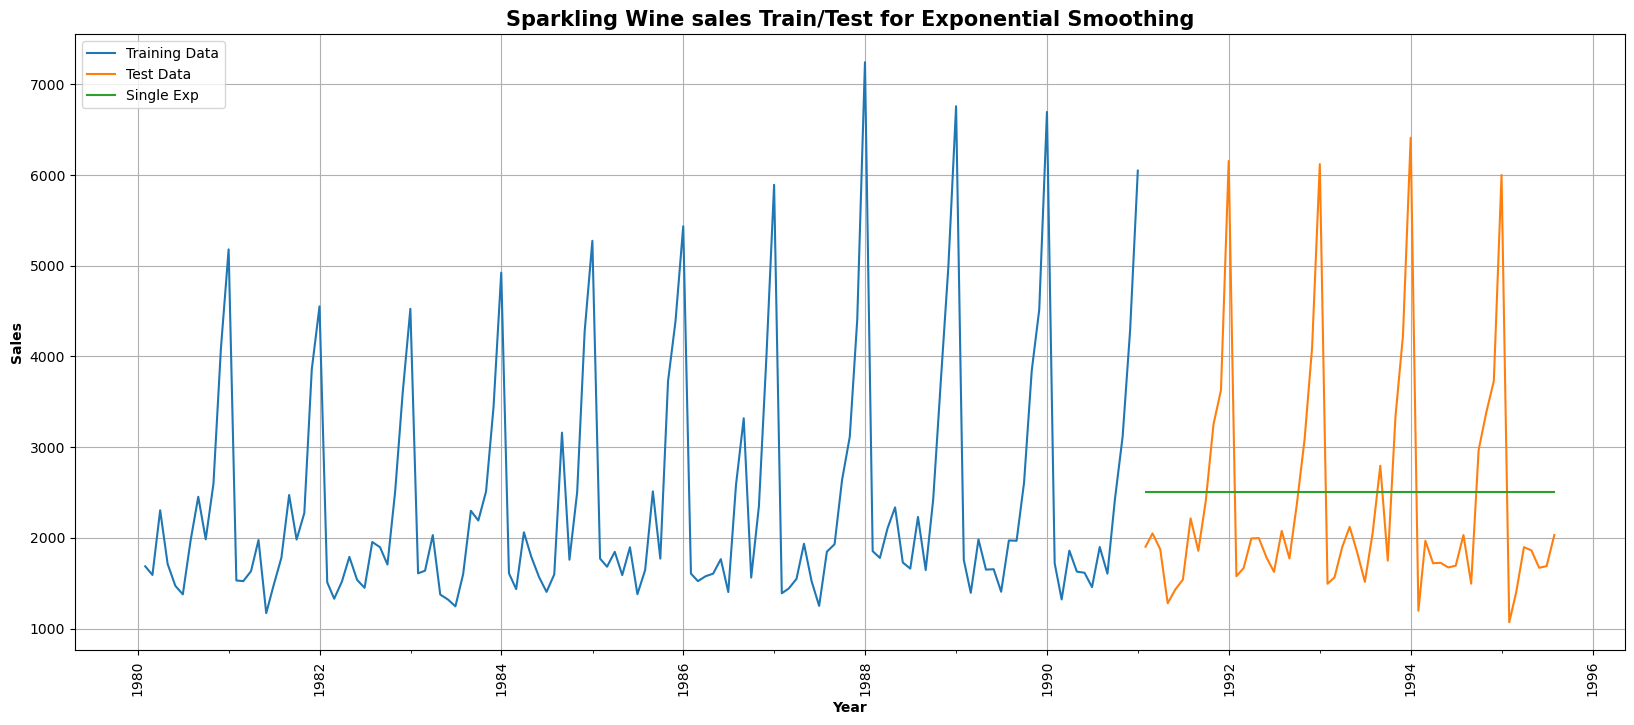

In [1789]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Sparkling_train.index.values,Sparkling_train['Sparkling'])
ax.plot(Sparkling_test.index.values,Sparkling_test['Sparkling'])
ax.plot(Sparkling_SES_test.index.values,Sparkling_SES_test[('predict', 0.02)])


# Set title and labels for axes
plt.legend(['Training Data','Test Data','Single Exp'],loc="upper left")
plt.title("Sparkling Wine sales Train/Test for Exponential Smoothing",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

In [1790]:
#Evaluation Using RMSE
rmse_model5_test_1 = metrics.mean_squared_error(Sparkling_SES_test['Sparkling'],Sparkling_SES_test[('predict', 0.02)],squared=False)

Sparkling_resultsDf5 = pd.DataFrame({'RMSE': [rmse_model5_test_1]},index=['Sparkling - SES, α = 0.02'])

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_resultsDf5])
Sparkling_resultsDf

RMSE
Sparkling - Linear Regression 1389.14
Sparkling - Naive Forecast    3864.28
Sparkling - Simple Average    1275.08
Sparkling - 2 pt Moving Avg    813.40
Sparkling - 4 pt Moving Avg   1156.59
Sparkling - 6 pt Moving Avg   1283.93
Sparkling - 9 pt Moving Avg   1346.28
Sparkling - SES, α = 0.02     1279.50

##### Double Exponential Smoothing

In [1791]:
Sparkling_DES_train = Sparkling_train.copy()
Sparkling_DES_test = Sparkling_test.copy()

In [1792]:
#Model Declaration and fit
Sparkling_model_DES = Holt(Sparkling_DES_train['Sparkling'])

Sparkling_model_DES_autofit = Sparkling_model_DES.fit(optimized=True)

In [1793]:
#Parameters of Optimized Fit
Sparkling_model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1794]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_dexp = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_dexp

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [1795]:
#Checking for best Aplha and Beta Values
for i in np.arange(0.1,1,0.05):
    for j in np.arange(0.001,0.2,0.001):
        Sparkling_model_DES_alpha_i_j = Sparkling_model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        Sparkling_DES_train['predict',i,j] = Sparkling_model_DES_alpha_i_j.fittedvalues
        Sparkling_DES_test['predict',i,j] = Sparkling_model_DES_alpha_i_j.forecast(steps=len(Sparkling_DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(Sparkling_DES_train['Sparkling'],Sparkling_DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(Sparkling_DES_test['Sparkling'],Sparkling_DES_test['predict',i,j],squared=False)
        
        resultsDf_dexp = resultsDf_dexp.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [1796]:
resultsDf_dexp.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Beta Values  Train RMSE  Test RMSE
11            0.10         0.01     1449.03    1292.44
12            0.10         0.01     1441.89    1297.40
10            0.10         0.01     1457.07    1300.01
13            0.10         0.01     1435.52    1310.67
208           0.15         0.01     1411.98    1314.98
...            ...          ...         ...        ...
3577          0.95         0.20     1482.70   24032.27
3578          0.95         0.20     1483.28   24128.44
3579          0.95         0.20     1483.87   24224.42
3580          0.95         0.20     1484.45   24320.22
3581          0.95         0.20     1485.03   24415.84

[3582 rows x 4 columns]

In [1797]:
Sparkling_DES_test['predict'] = Sparkling_model_DES_autofit.forecast(steps=len(Sparkling_DES_test))
pd.options.display.float_format = '{:.2f}'.format
Sparkling_DES_test.head()

Sparkling  (predict, 0.1, 0.001)  (predict, 0.1, 0.002)  \
YearMonth                                                             
1991-01-31       1902                2076.12                2176.48   
1991-02-28       2049                1993.36                2104.70   
1991-03-31       1874                1910.60                2032.91   
1991-04-30       1279                1827.84                1961.13   
1991-05-31       1432                1745.08                1889.34   

            (predict, 0.1, 0.003)  (predict, 0.1, 0.004)  \
YearMonth                                                  
1991-01-31                2266.83                2348.02   
1991-02-28                2204.87                2294.85   
1991-03-31                2142.91                2241.68   
1991-04-30                2080.96                2188.51   
1991-05-31                2019.00                2135.34   

            (predict, 0.1, 0.005)  (predict, 0.1, 0.006)  \
YearMonth                                                  
1991-01-31                2420.86                2486.10   
1991-02-28                2375.54                2447.77   
1991-03-31                2330.22                2409.44   
1991-04-30                2284.89                2371.11   
1991-05-31                2239.57                2332.78   

            (predict, 0.1, 0.007)  (predict, 0.1, 0.008)  \
YearMonth                                                  
1991-01-31                2544.40                2596.40   
1991-02-28                2512.30                2569.83   
1991-03-31                2480.19                2543.26   
1991-04-30                2448.09                2516.69   
1991-05-31                2415.98                2490.11   

            (predict, 0.1, 0.009000000000000001)  ...  \
YearMonth                                         ...   
1991-01-31                               2642.69  ...   
1991-02-28                               2621.02  ...   
1991-03-31                               2599.35  ...   
1991-04-30                               2577.69  ...   
1991-05-31                               2556.02  ...   

            (predict, 0.9500000000000003, 0.191)  \
YearMonth                                          
1991-01-31                               6610.54   
1991-02-28                               7245.93   
1991-03-31                               7881.32   
1991-04-30                               8516.71   
1991-05-31                               9152.10   

            (predict, 0.9500000000000003, 0.192)  \
YearMonth                                          
1991-01-31                               6613.67   
1991-02-28                               7252.07   
1991-03-31                               7890.48   
1991-04-30                               8528.89   
1991-05-31                               9167.30   

            (predict, 0.9500000000000003, 0.193)  \
YearMonth                                          
1991-01-31                               6616.79   
1991-02-28                               7258.21   
1991-03-31                               7899.63   
1991-04-30                               8541.05   
1991-05-31                               9182.48   

            (predict, 0.9500000000000003, 0.194)  \
YearMonth                                          
1991-01-31                               6619.90   
1991-02-28                               7264.33   
1991-03-31                               7908.76   
1991-04-30                               8553.19   
1991-05-31                               9197.63   

            (predict, 0.9500000000000003, 0.195)  \
YearMonth                                          
1991-01-31                               6623.01   
1991-02-28                               7270.44   
1991-03-31                               7917.88   
1991-04-30                               8565.31   
1991-05-31                               9212.75   

            (predict, 0.95

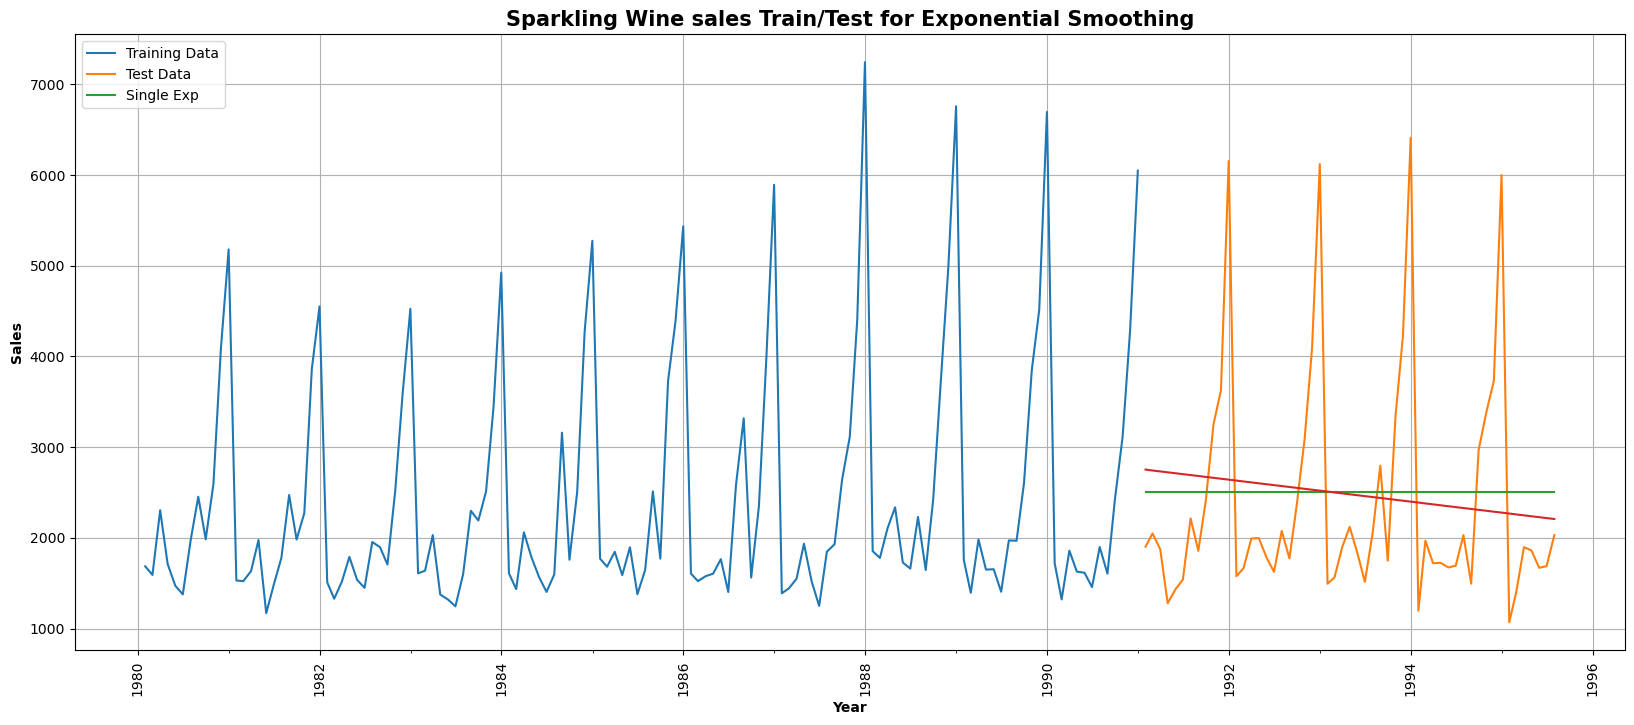

In [1798]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Sparkling_train.index.values,Sparkling_train['Sparkling'])
ax.plot(Sparkling_test.index.values,Sparkling_test['Sparkling'])
ax.plot(Sparkling_SES_test.index.values,Sparkling_SES_test[('predict', 0.02)])
ax.plot(Sparkling_DES_test.index.values,Sparkling_DES_test.iloc[:,[12]])


# Set title and labels for axes
plt.legend(['Training Data','Test Data','Single Exp'],loc="upper left")
plt.title("Sparkling Wine sales Train/Test for Exponential Smoothing",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

In [1799]:
#Evaluation Using RMSE
rmse_model5_test_2 = metrics.mean_squared_error(Sparkling_DES_test['Sparkling'],Sparkling_DES_test.iloc[:,[12]],squared=False)

Sparkling_resultsDf6 = pd.DataFrame({'RMSE': [rmse_model5_test_2]},index=['Sparkling - DES, α = 0.1, β = 0.01'])

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_resultsDf6])
Sparkling_resultsDf

RMSE
Sparkling - Linear Regression      1389.14
Sparkling - Naive Forecast         3864.28
Sparkling - Simple Average         1275.08
Sparkling - 2 pt Moving Avg         813.40
Sparkling - 4 pt Moving Avg        1156.59
Sparkling - 6 pt Moving Avg        1283.93
Sparkling - 9 pt Moving Avg        1346.28
Sparkling - SES, α = 0.02          1279.50
Sparkling - DES, α = 0.1, β = 0.01 1292.44

##### Triple Exponential Smoothing

In [1800]:
Sparkling_TES_train = Sparkling_train.copy()
Sparkling_TES_test = Sparkling_test.copy()

In [1801]:
#Model Declaration and fit
Sparkling_model_TES = ExponentialSmoothing(Sparkling_TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

Sparkling_model_TES_autofit = Sparkling_model_TES.fit()

In [1802]:
#Parameters of Optimized Fit
Sparkling_model_TES_autofit.params

{'smoothing_level': 0.11101471561088701,
 'smoothing_trend': 0.0493145907614654,
 'smoothing_seasonal': 0.36244934537370843,
 'damping_trend': nan,
 'initial_level': 2356.496908624238,
 'initial_trend': -9.809526161838415,
 'initial_seasons': array([0.713711  , 0.68278724, 0.90458411, 0.8053878 , 0.65571739,
        0.65388935, 0.88616088, 1.13350811, 0.91894498, 1.21186447,
        1.87099202, 2.37505867]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1803]:
## Prediction on the test data

Sparkling_TES_test['auto_predict'] = Sparkling_model_TES_autofit.forecast(steps=len(Sparkling_test))
Sparkling_TES_test.head()

Sparkling  auto_predict
YearMonth                          
1991-01-31       1902       1587.92
1991-02-28       2049       1356.65
1991-03-31       1874       1763.35
1991-04-30       1279       1656.52
1991-05-31       1432       1542.39

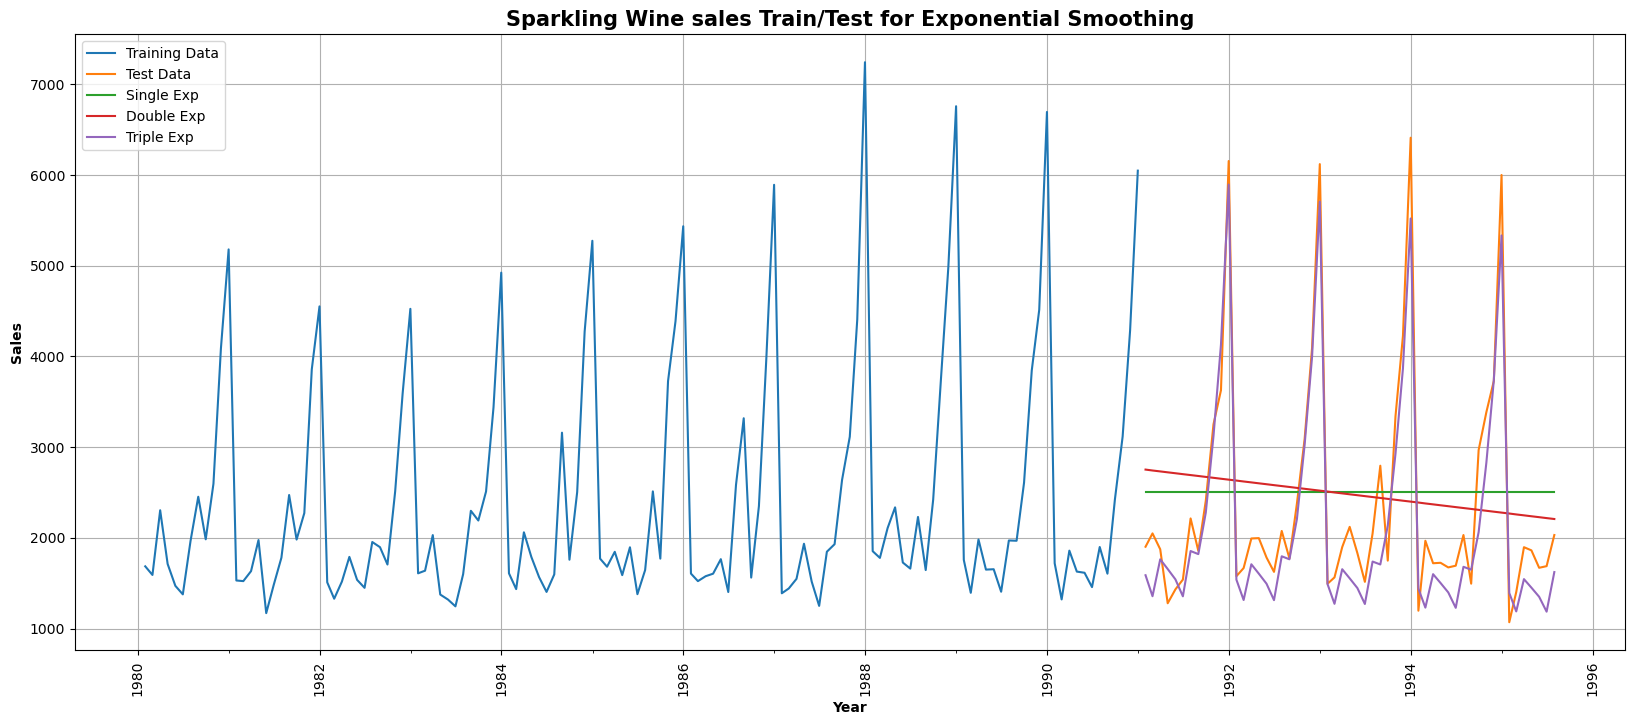

In [1804]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Sparkling_train.index.values,Sparkling_train['Sparkling'])
ax.plot(Sparkling_test.index.values,Sparkling_test['Sparkling'])
ax.plot(Sparkling_SES_test.index.values,Sparkling_SES_test[('predict', 0.02)])
ax.plot(Sparkling_DES_test.index.values,Sparkling_DES_test.iloc[:,[12]])
ax.plot(Sparkling_TES_test.index.values,Sparkling_TES_test['auto_predict'])


# Set title and labels for axes
plt.legend(['Training Data','Test Data','Single Exp', 'Double Exp', 'Triple Exp'],loc="upper left")
plt.title("Sparkling Wine sales Train/Test for Exponential Smoothing",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

In [1805]:
#Evaluation Using RMSE
rmse_model5_test_3 = metrics.mean_squared_error(Sparkling_TES_test['Sparkling'],Sparkling_TES_test['auto_predict'],squared=False)

Sparkling_resultsDf7 = pd.DataFrame({'RMSE': [rmse_model5_test_3]},index=['Sparkling - TES, α = 0.111, β = 0.049, γ = 0.362'])

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_resultsDf7])
Sparkling_resultsDf

RMSE
Sparkling - Linear Regression                    1389.14
Sparkling - Naive Forecast                       3864.28
Sparkling - Simple Average                       1275.08
Sparkling - 2 pt Moving Avg                       813.40
Sparkling - 4 pt Moving Avg                      1156.59
Sparkling - 6 pt Moving Avg                      1283.93
Sparkling - 9 pt Moving Avg                      1346.28
Sparkling - SES, α = 0.02                        1279.50
Sparkling - DES, α = 0.1, β = 0.01               1292.44
Sparkling - TES, α = 0.111, β = 0.049, γ = 0.362  402.94

In [1806]:
Sparkling_resultsDf.sort_values(by=['RMSE'],ascending=True)

RMSE
Sparkling - TES, α = 0.111, β = 0.049, γ = 0.362  402.94
Sparkling - 2 pt Moving Avg                       813.40
Sparkling - 4 pt Moving Avg                      1156.59
Sparkling - Simple Average                       1275.08
Sparkling - SES, α = 0.02                        1279.50
Sparkling - 6 pt Moving Avg                      1283.93
Sparkling - DES, α = 0.1, β = 0.01               1292.44
Sparkling - 9 pt Moving Avg                      1346.28
Sparkling - Linear Regression                    1389.14
Sparkling - Naive Forecast                       3864.28

In [1807]:
Sparkling_resultsDf.to_excel('sparkling_models.xlsx')

#### Rose Wine

##### Linear Regression

In [1808]:
#Before Evaluating Models we shall standerdize time to help for Regression Application
Rose_train_time = [i+1 for i in range(len(Rose_train))]
Rose_test_time = [i+len(Rose_train)+1 for i in range(len(Rose_test))]

print('Training Time instance','\n',Rose_train_time,'\n')
print('Test Time instance','\n',Rose_test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132] 

Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [1809]:
Rose_LinearRegression_train = Rose_train.copy()
Rose_LinearRegression_test = Rose_test.copy()

Rose_LinearRegression_train['time'] = Rose_train_time
Rose_LinearRegression_test['time'] = Rose_test_time

In [1810]:
#declare Linear Reg Model and Fit
Rose_lr_model = LinearRegression()
Rose_lr = Rose_lr_model.fit(Rose_LinearRegression_train[['time']],Rose_LinearRegression_train['Rose'].values)

In [1811]:
#Predict Values
Rose_test_predictions_model = Rose_lr.predict(Rose_LinearRegression_test[['time']])
Rose_LinearRegression_test['RegOnTime'] = Rose_test_predictions_model

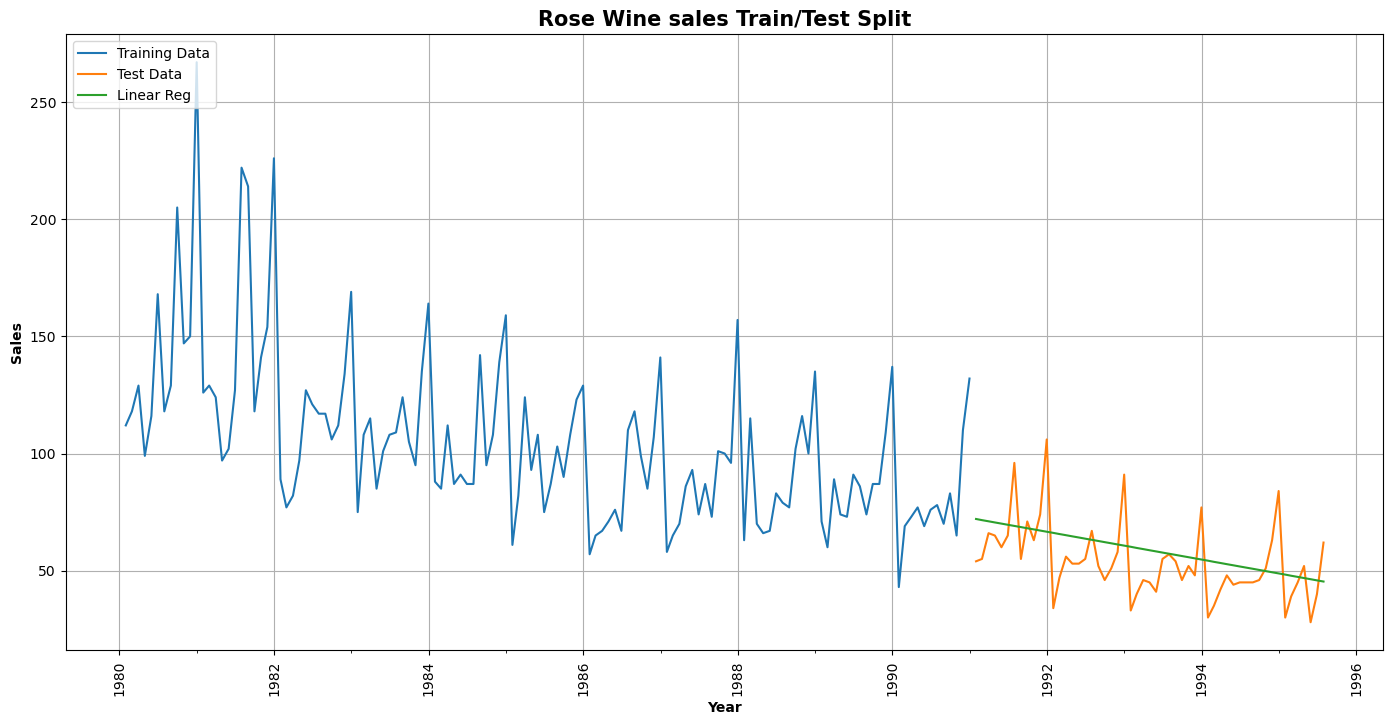

In [1812]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(17, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Rose_train.index.values,Rose_train['Rose'])
ax.plot(Rose_test.index.values,Rose_test['Rose'])
ax.plot(Rose_LinearRegression_test.index.values,Rose_LinearRegression_test['RegOnTime'])

# Set title and labels for axes
plt.legend(['Training Data','Test Data','Linear Reg'],loc="upper left")
plt.title("Rose Wine sales Train/Test Split",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

In [1813]:
#Evaluation Using RMSE
Rose_rmse_model1_test = metrics.mean_squared_error(Rose_LinearRegression_test['Rose'],Rose_test_predictions_model,squared=False)

Rose_resultsDf = pd.DataFrame({'RMSE': [Rose_rmse_model1_test]},index=['Rose - Linear Regression'])
Rose_resultsDf

RMSE
Rose - Linear Regression 15.28

##### Naive Model

In [1814]:
Rose_NaiveModel_train = Rose_train.copy()
Rose_NaiveModel_test = Rose_test.copy()

In [1815]:
Rose_NaiveModel_test['naive'] = np.asarray(Rose_NaiveModel_train['Rose'])[len(Rose_NaiveModel_train['Rose'])-1]
Rose_NaiveModel_test['naive'].head()

YearMonth
1991-01-31   132.00
1991-02-28   132.00
1991-03-31   132.00
1991-04-30   132.00
1991-05-31   132.00
Name: naive, dtype: float64

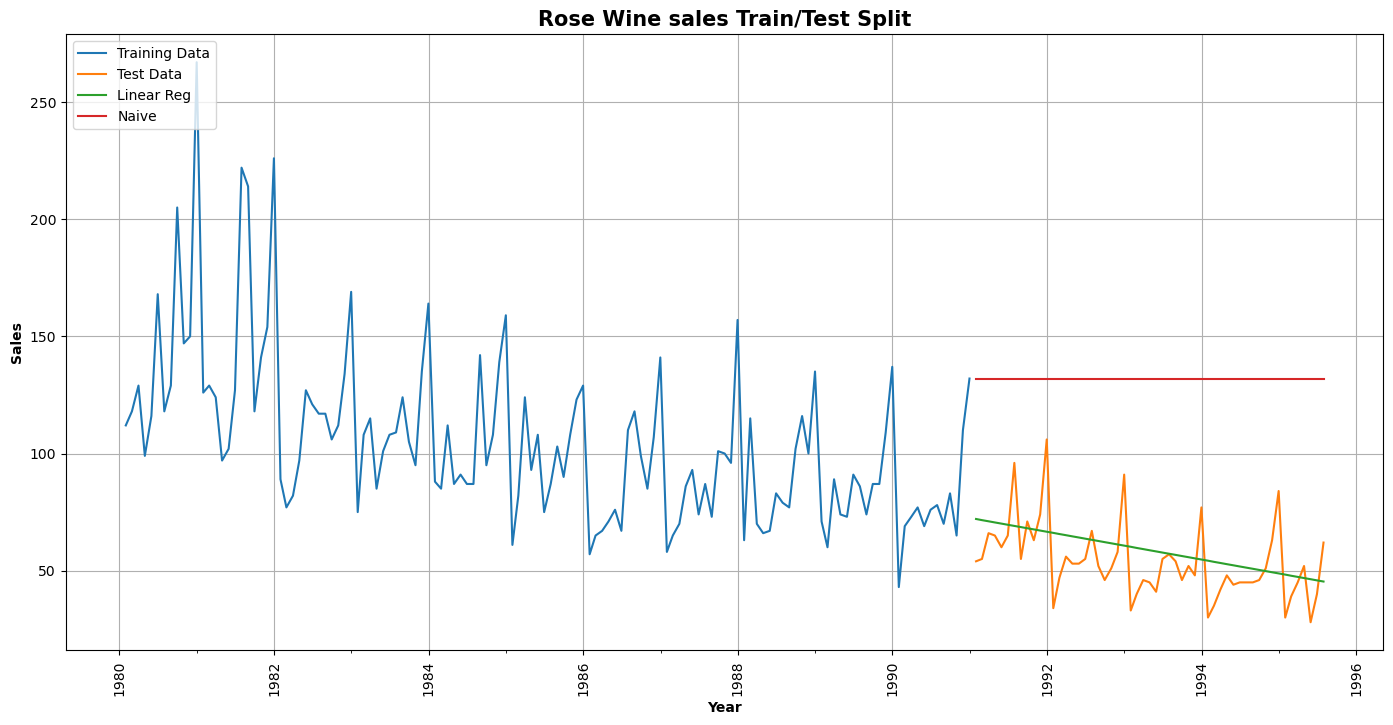

In [1816]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(17, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Rose_train.index.values,Rose_train['Rose'])
ax.plot(Rose_test.index.values,Rose_test['Rose'])
ax.plot(Rose_LinearRegression_test.index.values,Rose_LinearRegression_test['RegOnTime'])
ax.plot(Rose_NaiveModel_test.index.values,Rose_NaiveModel_test['naive'])

# Set title and labels for axes
plt.legend(['Training Data','Test Data','Linear Reg','Naive'],loc="upper left")
plt.title("Rose Wine sales Train/Test Split",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

In [1817]:
#Evaluation Using RMSE
Rose_rmse_model2_test = metrics.mean_squared_error(Rose_NaiveModel_test['Rose'],Rose_NaiveModel_test['naive'],squared=False)

Rose_resultsDf2 = pd.DataFrame({'RMSE': [Rose_rmse_model2_test]},index=['Rose - Naive Forecast'])

Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf2])
Rose_resultsDf

RMSE
Rose - Linear Regression 15.28
Rose - Naive Forecast    79.74

##### Simple Average

In [1818]:
Rose_SimpleAverage_train = Rose_train.copy()
Rose_SimpleAverage_test = Rose_test.copy()

In [1819]:
Rose_SimpleAverage_test['mean_forecast'] = Rose_SimpleAverage_train['Rose'].mean()
Rose_SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-31 54.00         104.94
1991-02-28 55.00         104.94
1991-03-31 66.00         104.94
1991-04-30 65.00         104.94
1991-05-31 60.00         104.94

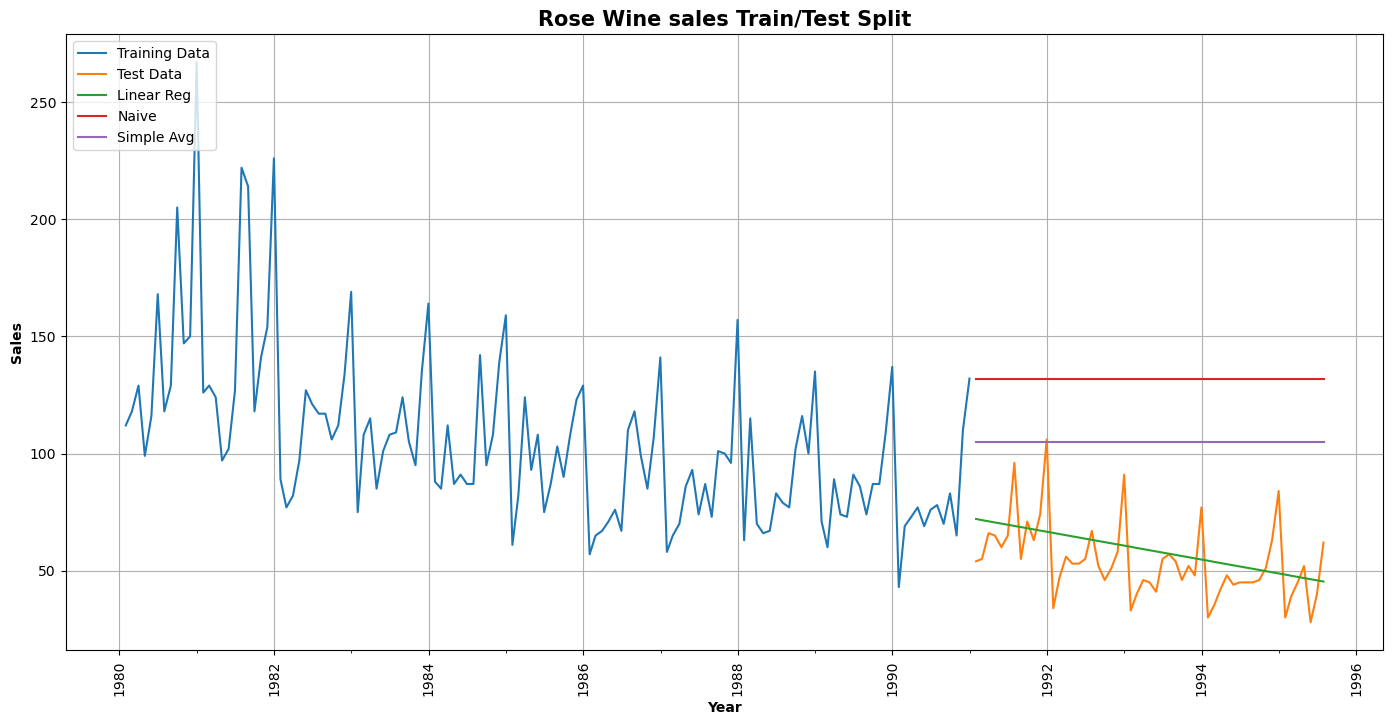

In [1820]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(17, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Rose_train.index.values,Rose_train['Rose'])
ax.plot(Rose_test.index.values,Rose_test['Rose'])
ax.plot(Rose_LinearRegression_test.index.values,Rose_LinearRegression_test['RegOnTime'])
ax.plot(Rose_NaiveModel_test.index.values,Rose_NaiveModel_test['naive'])
ax.plot(Rose_SimpleAverage_test.index.values,Rose_SimpleAverage_test['mean_forecast'])

# Set title and labels for axes
plt.legend(['Training Data','Test Data','Linear Reg','Naive','Simple Avg'],loc="upper left")
plt.title("Rose Wine sales Train/Test Split",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

In [1821]:
#Evaluation Using RMSE
Rose_rmse_model3_test = metrics.mean_squared_error(Rose_SimpleAverage_test['Rose'],Rose_SimpleAverage_test['mean_forecast'],squared=False)

Rose_resultsDf2 = pd.DataFrame({'RMSE': [Rose_rmse_model3_test]},index=['Rose - Simple Average'])

Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf2])
Rose_resultsDf

RMSE
Rose - Linear Regression 15.28
Rose - Naive Forecast    79.74
Rose - Simple Average    53.48

##### Moving Average

In [1822]:
Rose_MovingAvg = Rose_wine_time_s.copy()
Rose_MovingAvg.head()

Rose
YearMonth        
1980-01-31 112.00
1980-02-29 118.00
1980-03-31 129.00
1980-04-30  99.00
1980-05-31 116.00

In [1823]:

Rose_MovingAvg['Trailing_2'] = Rose_MovingAvg['Rose'].rolling(2).mean()
Rose_MovingAvg['Trailing_4'] = Rose_MovingAvg['Rose'].rolling(4).mean()
Rose_MovingAvg['Trailing_6'] = Rose_MovingAvg['Rose'].rolling(6).mean()
Rose_MovingAvg['Trailing_9'] = Rose_MovingAvg['Rose'].rolling(9).mean()

Rose_MovingAvg.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-31 112.00         NaN         NaN         NaN         NaN
1980-02-29 118.00      115.00         NaN         NaN         NaN
1980-03-31 129.00      123.50         NaN         NaN         NaN
1980-04-30  99.00      114.00      114.50         NaN         NaN
1980-05-31 116.00      107.50      115.50         NaN         NaN

In [1824]:
#Train Test Split
Rose_MovingAvg_train = Rose_MovingAvg[Rose_MovingAvg.index.year < 1991]
Rose_MovingAvg_test = Rose_MovingAvg[Rose_MovingAvg.index.year >= 1991]

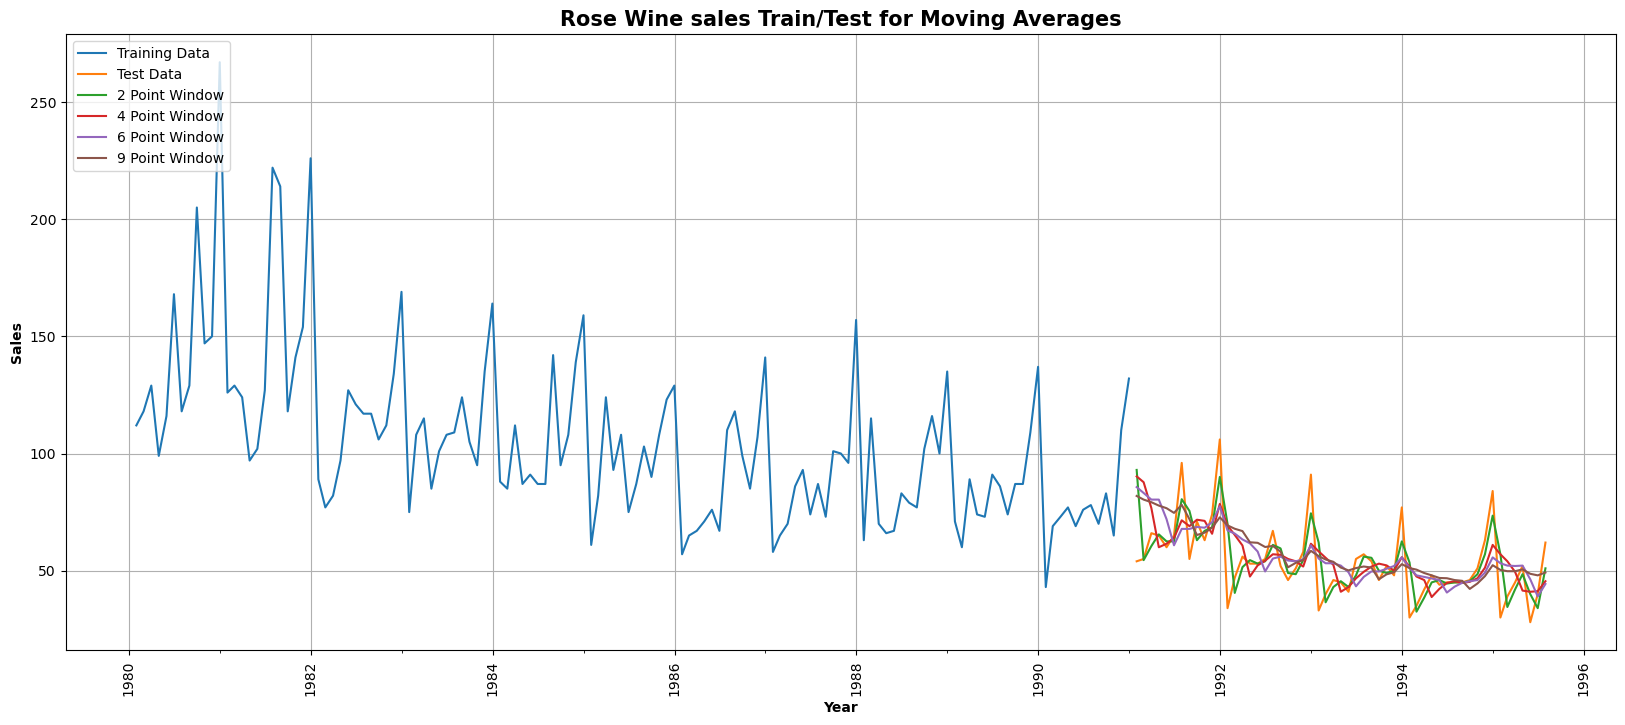

In [1825]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Rose_train.index.values,Rose_train['Rose'])
ax.plot(Rose_test.index.values,Rose_test['Rose'])
ax.plot(Rose_MovingAvg_test.index.values,Rose_MovingAvg_test['Trailing_2'])
ax.plot(Rose_MovingAvg_test.index.values,Rose_MovingAvg_test['Trailing_4'])
ax.plot(Rose_MovingAvg_test.index.values,Rose_MovingAvg_test['Trailing_6'])
ax.plot(Rose_MovingAvg_test.index.values,Rose_MovingAvg_test['Trailing_9'])

# Set title and labels for axes
plt.legend(['Training Data','Test Data','2 Point Window','4 Point Window','6 Point Window','9 Point Window'],loc="upper left")
plt.title("Rose Wine sales Train/Test for Moving Averages",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

In [1826]:
## Test Data - RMSE --> 2 point Trailing MA

Rose_rmse_model4_test_2 = metrics.mean_squared_error(Rose_test['Rose'],Rose_MovingAvg_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(Rose_rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

Rose_rmse_model4_test_4 = metrics.mean_squared_error(Rose_test['Rose'],Rose_MovingAvg_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(Rose_rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

Rose_rmse_model4_test_6 = metrics.mean_squared_error(Rose_test['Rose'],Rose_MovingAvg_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(Rose_rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

Rose_rmse_model4_test_9 = metrics.mean_squared_error(Rose_test['Rose'],Rose_MovingAvg_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(Rose_rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.455
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.572
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.731 


In [1827]:
#Evaluation Using RMSE
Rose_resultsDf4 = pd.DataFrame({'RMSE': [Rose_rmse_model4_test_2,Rose_rmse_model4_test_4,Rose_rmse_model4_test_6,Rose_rmse_model4_test_9]},index=['Rose - 2 pt Moving Avg','Rose - 4 pt Moving Avg','Rose - 6 pt Moving Avg','Rose - 9 pt Moving Avg'])

Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf4])
Rose_resultsDf

RMSE
Rose - Linear Regression 15.28
Rose - Naive Forecast    79.74
Rose - Simple Average    53.48
Rose - 2 pt Moving Avg   11.53
Rose - 4 pt Moving Avg   14.46
Rose - 6 pt Moving Avg   14.57
Rose - 9 pt Moving Avg   14.73

##### Single Exponential Smoothing

In [1828]:
Rose_SES_train = Rose_train.copy()
Rose_SES_test = Rose_test.copy()

In [1829]:
#Model Declaration adn fit
Rose_model_SES = SimpleExpSmoothing(Rose_SES_train['Rose'])

Rose_model_SES_autofit = Rose_model_SES.fit(optimized=True)

In [1830]:
#Parameters of Optimized Fit
Rose_model_SES_autofit.params

{'smoothing_level': 0.09874989825614361,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702255613862,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1831]:
# First we will define an empty dataframe to store our values from the loop

Rose_resultsDf_exp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
Rose_resultsDf_exp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [1832]:
#Checking for best Aplha Value
for i in np.arange(0.01,1,0.01):
    Rose_model_SES_alpha_i = Rose_model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    Rose_SES_train['predict',i] = Rose_model_SES_alpha_i.fittedvalues
    Rose_SES_test['predict',i] = Rose_model_SES_alpha_i.forecast(steps=len(Rose_SES_test))
    
    Rose_rmse_model5_train_i = metrics.mean_squared_error(Rose_SES_train['Rose'],Rose_SES_train['predict',i],squared=False)
    
    Rose_rmse_model5_test_i = metrics.mean_squared_error(Rose_SES_test['Rose'],Rose_SES_test['predict',i],squared=False)
    
    Rose_resultsDf_exp = Rose_resultsDf_exp.append({'Alpha Values':i,'Train RMSE':Rose_rmse_model5_train_i ,'Test RMSE':Rose_rmse_model5_test_i}, ignore_index=True)

In [1833]:
Rose_resultsDf_exp.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
6           0.07       32.05      36.46
7           0.08       31.94      36.48
5           0.06       32.21      36.60
8           0.09       31.86      36.62
9           0.10       31.82      36.85
..           ...         ...        ...
94          0.95       38.11      78.55
95          0.96       38.24      78.81
96          0.97       38.38      79.05
97          0.98       38.51      79.29
98          0.99       38.65      79.52

[99 rows x 3 columns]

In [1834]:
Rose_SES_test['predict'] = Rose_model_SES_autofit.forecast(steps=len(Rose_SES_test))
pd.options.display.float_format = '{:.2f}'.format
Rose_SES_test.head()

Rose  (predict, 0.01)  (predict, 0.02)  (predict, 0.03)  \
YearMonth                                                             
1991-01-31 54.00           101.94            94.62            90.51   
1991-02-28 55.00           101.94            94.62            90.51   
1991-03-31 66.00           101.94            94.62            90.51   
1991-04-30 65.00           101.94            94.62            90.51   
1991-05-31 60.00           101.94            94.62            90.51   

            (predict, 0.04)  (predict, 0.05)  (predict, 0.060000000000000005)  \
YearMonth                                                                       
1991-01-31            88.39            87.34                            86.87   
1991-02-28            88.39            87.34                            86.87   
1991-03-31            88.39            87.34                            86.87   
1991-04-30            88.39            87.34                            86.87   
1991-05-31            88.39            87.34                            86.87   

            (predict, 0.06999999999999999)  (predict, 0.08)  (predict, 0.09)  \
YearMonth                                                                      
1991-01-31                           86.71            86.74            86.89   
1991-02-28                           86.71            86.74            86.89   
1991-03-31                           86.71            86.74            86.89   
1991-04-30                           86.71            86.74            86.89   
1991-05-31                           86.71            86.74            86.89   

            ...  (predict, 0.91)  (predict, 0.92)  (predict, 0.93)  \
YearMonth   ...                                                      
1991-01-31  ...           129.67           129.96           130.25   
1991-02-28  ...           129.67           129.96           130.25   
1991-03-31  ...           129.67           129.96           130.25   
1991-04-30  ...           129.67           129.96           130.25   
1991-05-31  ...           129.67           129.96           130.25   

            (predict, 0.9400000000000001)  (predict, 0.9500000000000001)  \
YearMonth                                                                  
1991-01-31                         130.52                         130.79   
1991-02-28                         130.52                         130.79   
1991-03-31                         130.52                         130.79   
1991-04-30                         130.52                         130.79   
1991-05-31                         130.52                         130.79   

            (predict, 0.9600000000000001)  (predict, 0.97)  (predict, 0.98)  \
YearMonth                                                                     
1991-01-31                         131.05           131.30           131.54   
1991-02-28                         131.05           131.30           131.54   
1991-03-31                         131.05           131.30           131.54   
1991-04-30                         131.05           131.30           131.54   
1991-05-31                         131.05           131.30           131.54   

            (predict, 0.99)  predict  
YearMonth                             
1991-01-31           131.78    87.10  
1991-02-28           131.78    87.10  
1991-03-31           131.78    87.10  
1991-04-30           131.78    87.10  
1991-05-31           131.78    87.10  

[5 rows x 101 columns]

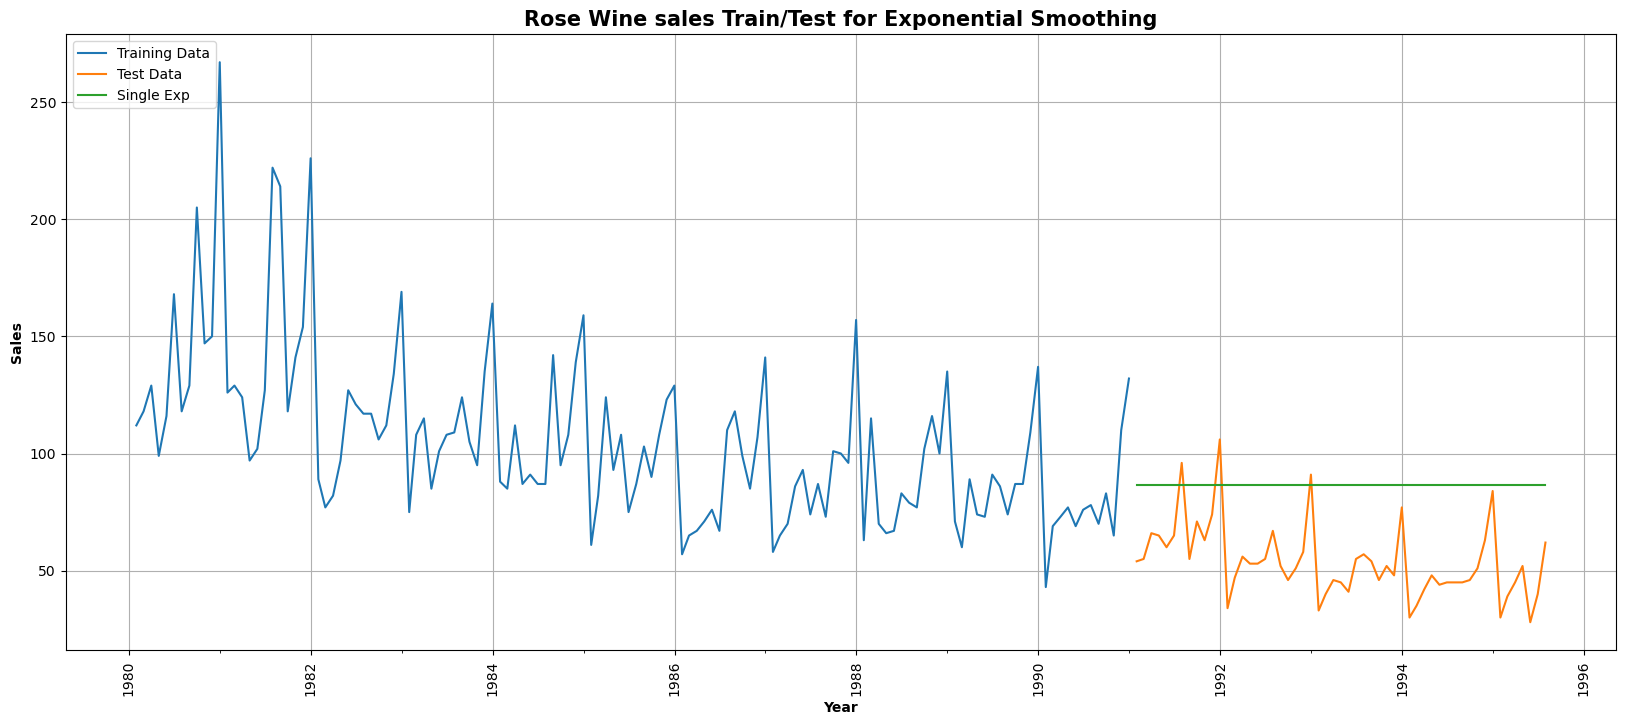

In [1835]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Rose_train.index.values,Rose_train['Rose'])
ax.plot(Rose_test.index.values,Rose_test['Rose'])
ax.plot(Rose_SES_test.index.values,Rose_SES_test.iloc[:,[7]])


# Set title and labels for axes
plt.legend(['Training Data','Test Data','Single Exp'],loc="upper left")
plt.title("Rose Wine sales Train/Test for Exponential Smoothing",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

In [1836]:
#Evaluation Using RMSE
Rose_rmse_model5_test_1 = metrics.mean_squared_error(Rose_SES_test['Rose'],Rose_SES_test.iloc[:,[7]],squared=False)

Rose_resultsDf5 = pd.DataFrame({'RMSE': [Rose_rmse_model5_test_1]},index=['Rose - SES, α = 0.07'])

Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf5])
Rose_resultsDf

RMSE
Rose - Linear Regression 15.28
Rose - Naive Forecast    79.74
Rose - Simple Average    53.48
Rose - 2 pt Moving Avg   11.53
Rose - 4 pt Moving Avg   14.46
Rose - 6 pt Moving Avg   14.57
Rose - 9 pt Moving Avg   14.73
Rose - SES, α = 0.07     36.46

##### Double Exponential Smoothing

In [1837]:
Rose_DES_train = Rose_train.copy()
Rose_DES_test = Rose_test.copy()

In [1838]:
#Model Declaration and fit
Rose_model_DES = Holt(Rose_DES_train['Rose'])

Rose_model_DES_autofit = Rose_model_DES.fit(optimized=True)

In [1839]:
#Parameters of Optimized Fit
Rose_model_DES_autofit.params

{'smoothing_level': 0.0001321339938406504,
 'smoothing_trend': 1.0513882039253742e-16,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 136.22441775313408,
 'initial_trend': -0.4786757879461521,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1840]:
## First we will define an empty dataframe to store our values from the loop
Rose_resultsDf_dexp = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
Rose_resultsDf_dexp

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [1841]:
#Checking for best Aplha and Beta Values
for i in np.arange(0.0001,0.001,0.0001):
    for j in np.arange(0.001,0.2,0.001):
        Rose_model_DES_alpha_i_j = Rose_model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        Rose_DES_train['predict',i,j] = Rose_model_DES_alpha_i_j.fittedvalues
        Rose_DES_test['predict',i,j] = Rose_model_DES_alpha_i_j.forecast(steps=len(Rose_DES_test))
        
        Rose_rmse_model6_train = metrics.mean_squared_error(Rose_DES_train['Rose'],Rose_DES_train['predict',i,j],squared=False)
        
        Rose_rmse_model6_test = metrics.mean_squared_error(Rose_DES_test['Rose'],Rose_DES_test['predict',i,j],squared=False)
        
        Rose_resultsDf_dexp = Rose_resultsDf_dexp.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':Rose_rmse_model6_train,'Test RMSE':Rose_rmse_model6_test}, ignore_index=True)

In [1842]:
Rose_resultsDf_dexp.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Beta Values  Train RMSE  Test RMSE
1790          0.00         0.20      342.00     438.30
1789          0.00         0.20      342.50     440.47
1788          0.00         0.20      343.00     442.64
1787          0.00         0.20      343.50     444.82
1786          0.00         0.20      343.99     447.01
...            ...          ...         ...        ...
4             0.00         0.01      473.88    1016.11
3             0.00         0.00      473.95    1016.49
2             0.00         0.00      474.03    1016.87
1             0.00         0.00      474.11    1017.26
0             0.00         0.00      474.19    1017.64

[1791 rows x 4 columns]

In [1843]:
Rose_DES_test['predict'] = Rose_model_DES_autofit.forecast(steps=len(Rose_DES_test))
pd.options.display.float_format = '{:.2f}'.format
Rose_DES_test.head()

Rose  (predict, 0.0001, 0.001)  (predict, 0.0001, 0.002)  \
YearMonth                                                              
1991-01-31 54.00                    904.43                    904.20   
1991-02-28 55.00                    910.43                    910.19   
1991-03-31 66.00                    916.42                    916.18   
1991-04-30 65.00                    922.42                    922.17   
1991-05-31 60.00                    928.41                    928.16   

            (predict, 0.0001, 0.003)  (predict, 0.0001, 0.004)  \
YearMonth                                                        
1991-01-31                    903.97                    903.74   
1991-02-28                    909.96                    909.72   
1991-03-31                    915.94                    915.70   
1991-04-30                    921.92                    921.68   
1991-05-31                    927.91                    927.66   

            (predict, 0.0001, 0.005)  (predict, 0.0001, 0.006)  \
YearMonth                                                        
1991-01-31                    903.51                    903.28   
1991-02-28                    909.48                    909.25   
1991-03-31                    915.46                    915.22   
1991-04-30                    921.43                    921.18   
1991-05-31                    927.40                    927.15   

            (predict, 0.0001, 0.007)  (predict, 0.0001, 0.008)  \
YearMonth                                                        
1991-01-31                    903.05                    902.82   
1991-02-28                    909.01                    908.78   
1991-03-31                    914.98                    914.73   
1991-04-30                    920.94                    920.69   
1991-05-31                    926.90                    926.65   

            (predict, 0.0001, 0.009000000000000001)  ...  \
YearMonth                                            ...   
1991-01-31                                   902.59  ...   
1991-02-28                                   908.54  ...   
1991-03-31                                   914.49  ...   
1991-04-30                                   920.45  ...   
1991-05-31                                   926.40  ...   

            (predict, 0.0009000000000000001, 0.191)  \
YearMonth                                             
1991-01-31                                   536.05   
1991-02-28                                   535.06   
1991-03-31                                   534.07   
1991-04-30                                   533.08   
1991-05-31                                   532.09   

            (predict, 0.0009000000000000001, 0.192)  \
YearMonth                                             
1991-01-31                                   534.58   
1991-02-28                                   533.56   
1991-03-31                                   532.54   
1991-04-30                                   531.52   
1991-05-31                                   530.51   

            (predict, 0.0009000000000000001, 0.193)  \
YearMonth                                             
1991-01-31                                   533.11   
1991-02-28                                   532.06   
1991-03-31                                   531.02   
1991-04-30                                   529.97   
1991-05-31                                   528.93   

            (predict, 0.0009000000000000001, 0.194)  \
YearMonth                                             
1991-01-31                                   531.64   
1991-02-28                                   530.57   
1991-03-31                                   529.50   
1991-04-30                                   528.42   
1991-05-31                                   527.35   

            (predict, 0.0009000000000000001, 0.195)  \
YearMonth                                             
1991-01-31                                 

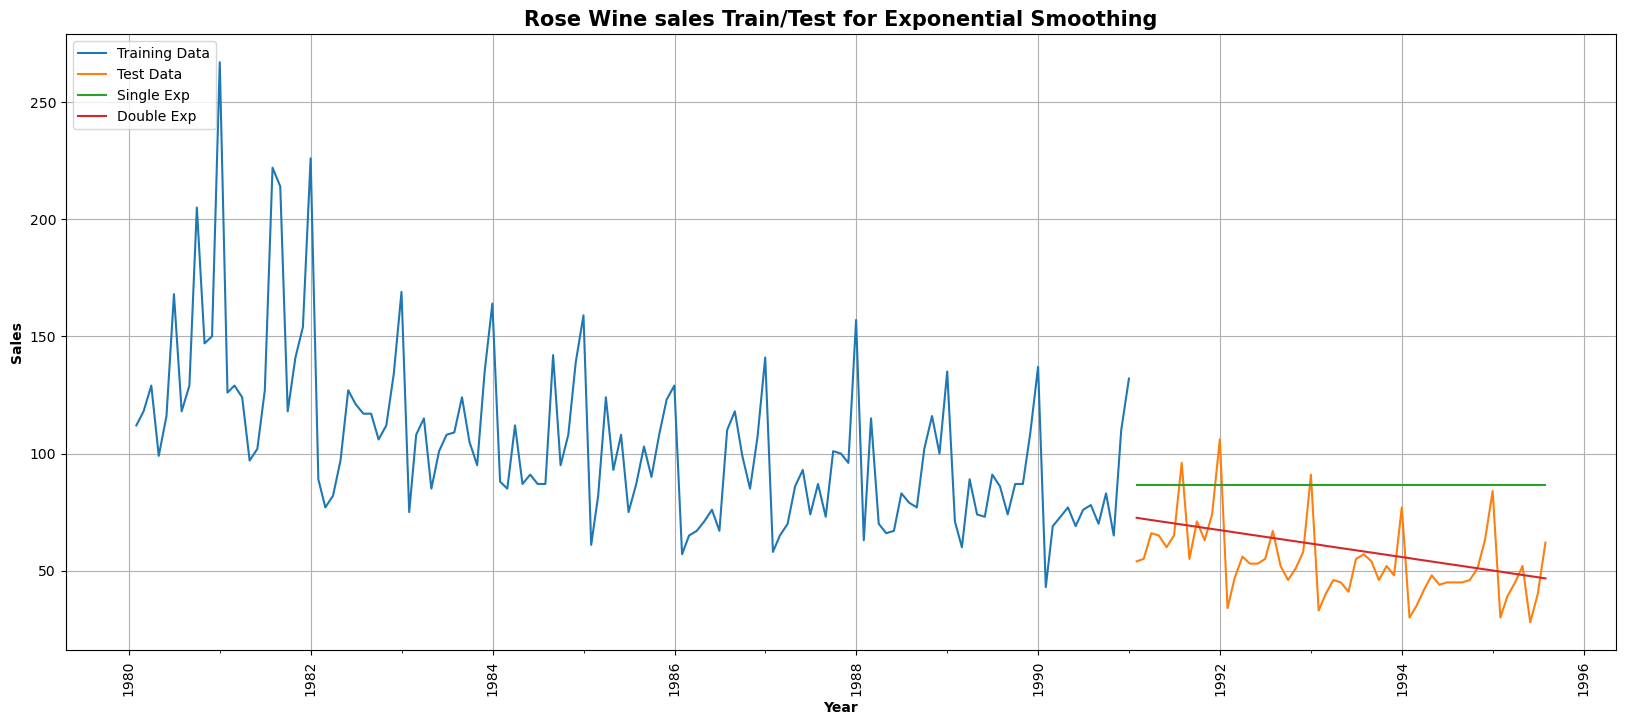

In [1844]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Rose_train.index.values,Rose_train['Rose'])
ax.plot(Rose_test.index.values,Rose_test['Rose'])
ax.plot(Rose_SES_test.index.values,Rose_SES_test.iloc[:,[7]])
ax.plot(Rose_DES_test.index.values,Rose_DES_test['predict'])

# Set title and labels for axes
plt.legend(['Training Data','Test Data','Single Exp','Double Exp'],loc="upper left")
plt.title("Rose Wine sales Train/Test for Exponential Smoothing",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

In [1845]:
#Evaluation Using RMSE
Rose_rmse_model5_test_2 = metrics.mean_squared_error(Rose_DES_test['Rose'],Rose_DES_test['predict'],squared=False)

Rose_resultsDf6 = pd.DataFrame({'RMSE': [Rose_rmse_model5_test_2]},index=['Rose - DES, α = 0.0001, β = 1.05e-16'])

Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf6])
Rose_resultsDf

RMSE
Rose - Linear Regression             15.28
Rose - Naive Forecast                79.74
Rose - Simple Average                53.48
Rose - 2 pt Moving Avg               11.53
Rose - 4 pt Moving Avg               14.46
Rose - 6 pt Moving Avg               14.57
Rose - 9 pt Moving Avg               14.73
Rose - SES, α = 0.07                 36.46
Rose - DES, α = 0.0001, β = 1.05e-16 15.58

##### Triple Exponential Smoothing

In [1846]:
Rose_TES_train = Rose_train.copy()
Rose_TES_test = Rose_test.copy()

In [1847]:
#Model Declaration and fit
Rose_model_TES = ExponentialSmoothing(Rose_TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

Rose_model_TES_autofit = Rose_model_TES.fit()

In [1848]:
#Parameters of Optimized Fit
Rose_model_TES_autofit.params

{'smoothing_level': 0.07130285749243212,
 'smoothing_trend': 0.04550837652110988,
 'smoothing_seasonal': 8.385716703273524e-05,
 'damping_trend': nan,
 'initial_level': 163.60092654560762,
 'initial_trend': -0.9804841883026134,
 'initial_seasons': array([0.68714163, 0.77936108, 0.85184662, 0.74446365, 0.8372947 ,
        0.91182237, 1.00282327, 1.06745268, 1.01025249, 0.98957378,
        1.1535151 , 1.59037115]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1849]:
## Prediction on the test data

Rose_TES_test['auto_predict'] = Rose_model_TES_autofit.forecast(steps=len(Rose_test))
Rose_TES_test.head()

Rose  auto_predict
YearMonth                     
1991-01-31 54.00         56.33
1991-02-28 55.00         63.69
1991-03-31 66.00         69.39
1991-04-30 65.00         60.45
1991-05-31 60.00         67.77

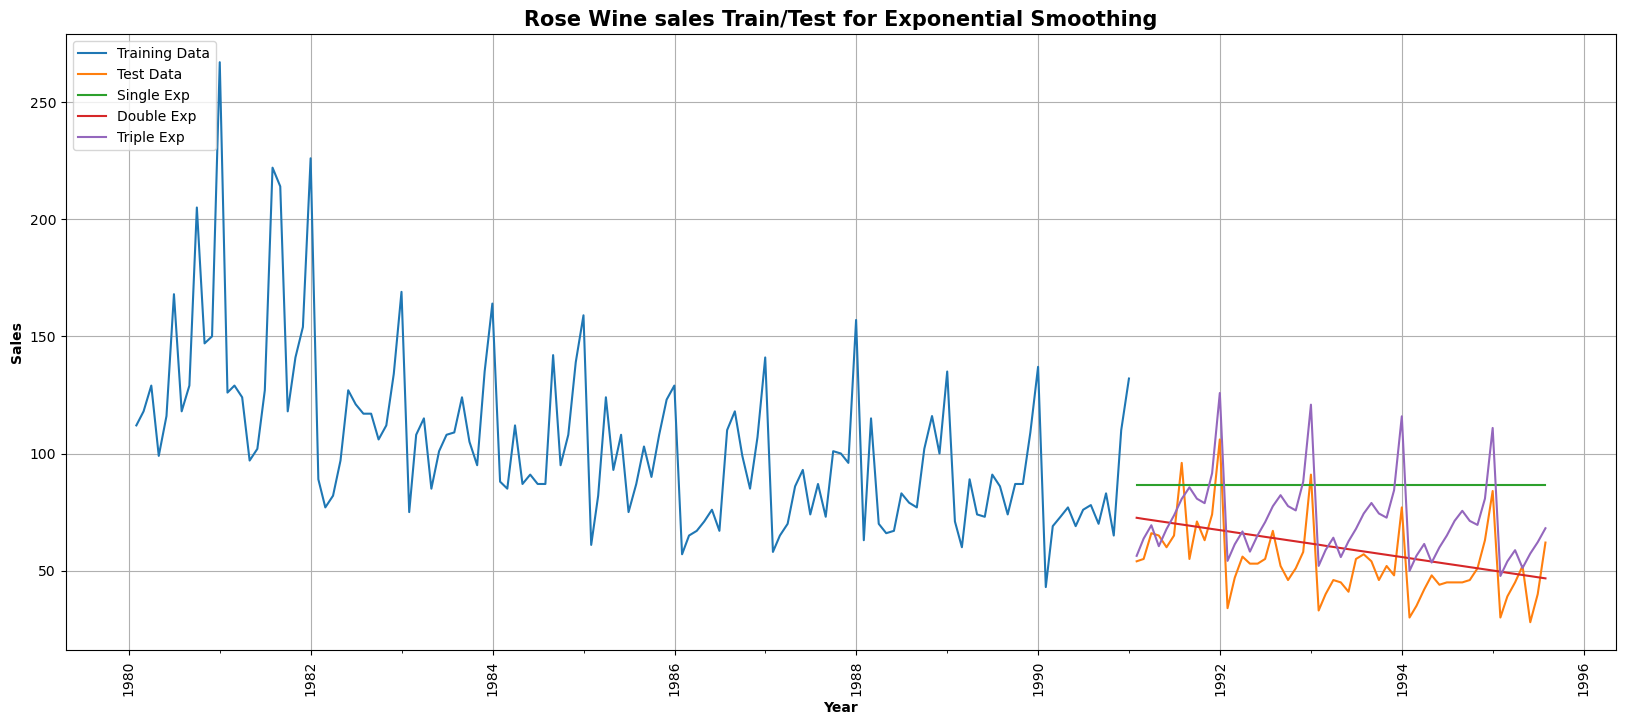

In [1850]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Rose_train.index.values,Rose_train['Rose'])
ax.plot(Rose_test.index.values,Rose_test['Rose'])
ax.plot(Rose_SES_test.index.values,Rose_SES_test.iloc[:,[7]])
ax.plot(Rose_DES_test.index.values,Rose_DES_test['predict'])
ax.plot(Rose_TES_test.index.values,Rose_TES_test['auto_predict'])


# Set title and labels for axes
plt.legend(['Training Data','Test Data','Single Exp','Double Exp','Triple Exp'],loc="upper left")
plt.title("Rose Wine sales Train/Test for Exponential Smoothing",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

In [1851]:
#Evaluation Using RMSE
Rose_rmse_model5_test_3 = metrics.mean_squared_error(Rose_TES_test['Rose'],Rose_TES_test['auto_predict'],squared=False)

Rose_resultsDf7 = pd.DataFrame({'RMSE': [Rose_rmse_model5_test_3]},index=['Rose - TES, α = 0.071, β = 0.045, γ = 8.38e-5'])

Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf7])
Rose_resultsDf

RMSE
Rose - Linear Regression                      15.28
Rose - Naive Forecast                         79.74
Rose - Simple Average                         53.48
Rose - 2 pt Moving Avg                        11.53
Rose - 4 pt Moving Avg                        14.46
Rose - 6 pt Moving Avg                        14.57
Rose - 9 pt Moving Avg                        14.73
Rose - SES, α = 0.07                          36.46
Rose - DES, α = 0.0001, β = 1.05e-16          15.58
Rose - TES, α = 0.071, β = 0.045, γ = 8.38e-5 20.22

In [1852]:
Rose_resultsDf.sort_values(by=['RMSE'],ascending=True)

RMSE
Rose - 2 pt Moving Avg                        11.53
Rose - 4 pt Moving Avg                        14.46
Rose - 6 pt Moving Avg                        14.57
Rose - 9 pt Moving Avg                        14.73
Rose - Linear Regression                      15.28
Rose - DES, α = 0.0001, β = 1.05e-16          15.58
Rose - TES, α = 0.071, β = 0.045, γ = 8.38e-5 20.22
Rose - SES, α = 0.07                          36.46
Rose - Simple Average                         53.48
Rose - Naive Forecast                         79.74

In [1853]:
Rose_resultsDf.to_excel('rose_models.xlsx')

### ARIMA / SARIMA

#### Sparkling

##### Starionarity Test

Dicky Fuller Test

Null Hypothesis:        H0 - Series is not Stationary   
Alternative Hypothesis: H1 - Series is Stationary 

In [1854]:
## Test for stationarity of the series - Dicky Fuller test
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    plt.grid()
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False) ## You plot will stay open - will be seen always
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

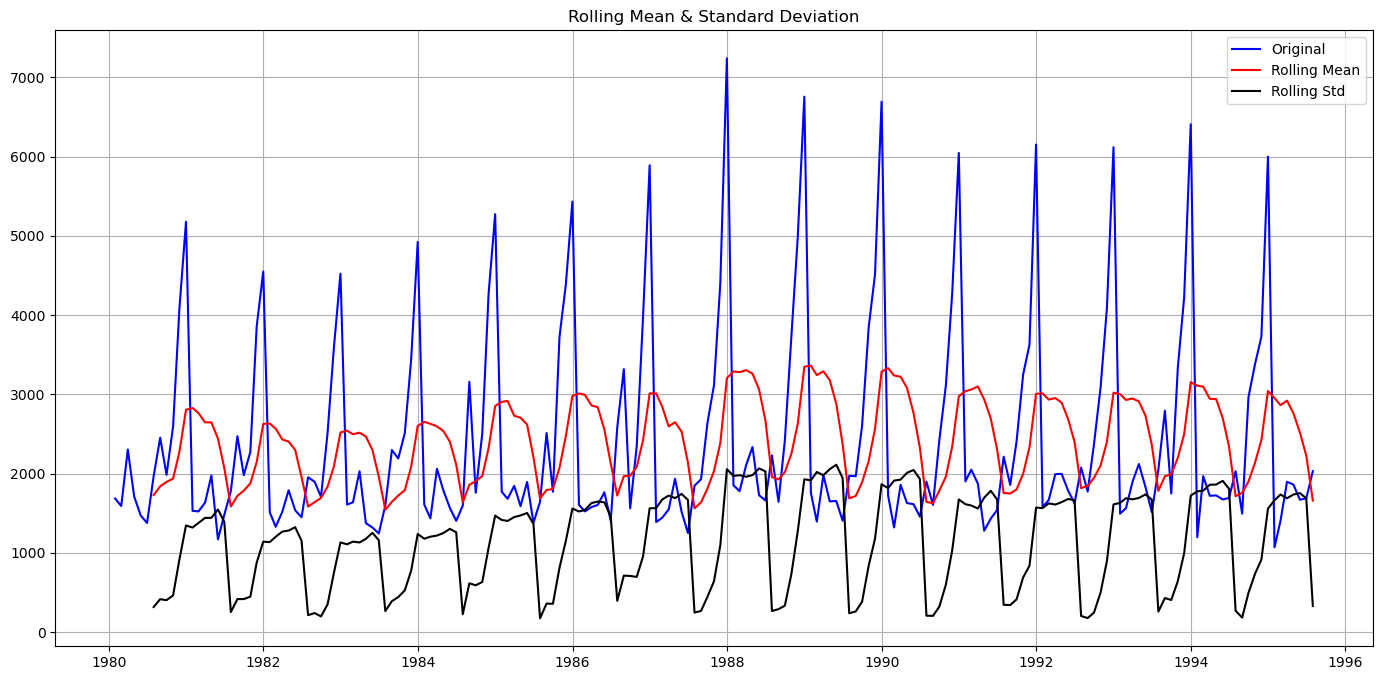

Results of Dickey-Fuller Test:
Test Statistic                 -1.36
p-value                         0.60
#Lags Used                     11.00
Number of Observations Used   175.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [1855]:
rcParams['figure.figsize'] = 17,8
test_stationarity(Sparkling_wine_time_s['Sparkling'])

p-value > 0.05 Hence Series is not Stationary

Checking Stationarity for Difference order of 1

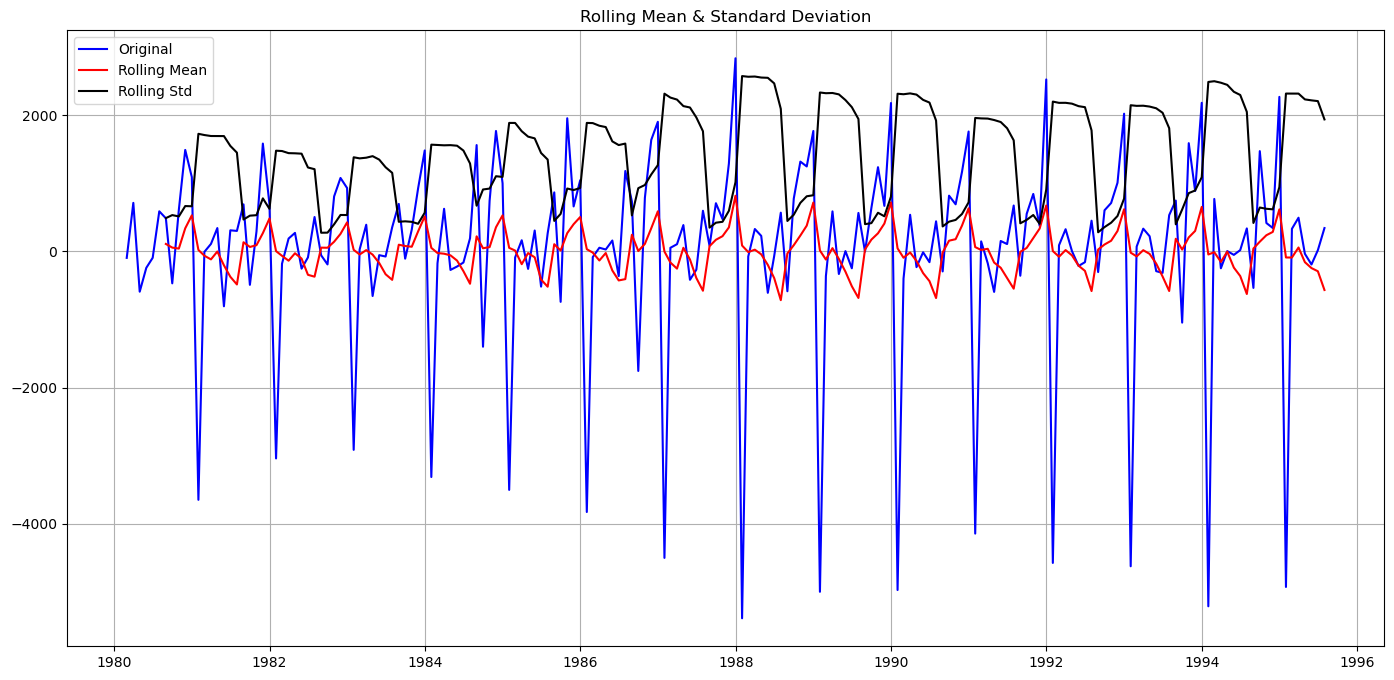

Results of Dickey-Fuller Test:
Test Statistic                -45.05
p-value                         0.00
#Lags Used                     10.00
Number of Observations Used   175.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [1856]:
test_stationarity(Sparkling_wine_time_s['Sparkling'].diff().dropna())

p-value < 0.05 Hence Series is Stationary

##### ARIMA Model

Now We try to build an Automated ARIMA/SARIMA Models

Before we do that let us try to determine the ideal p and q values

Plotting ACF - q

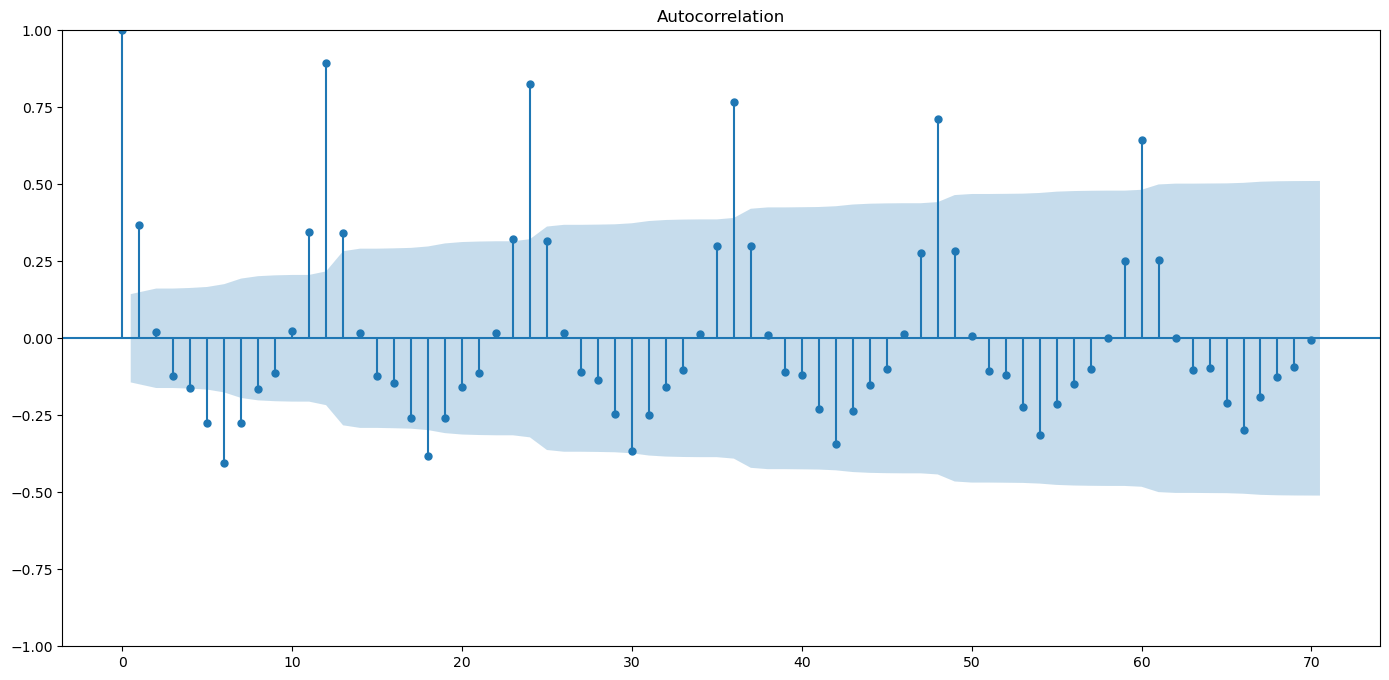

In [1857]:
plot_acf(Sparkling_wine_time_s['Sparkling'],lags=70);
plt.show();

Plotting PACF - p

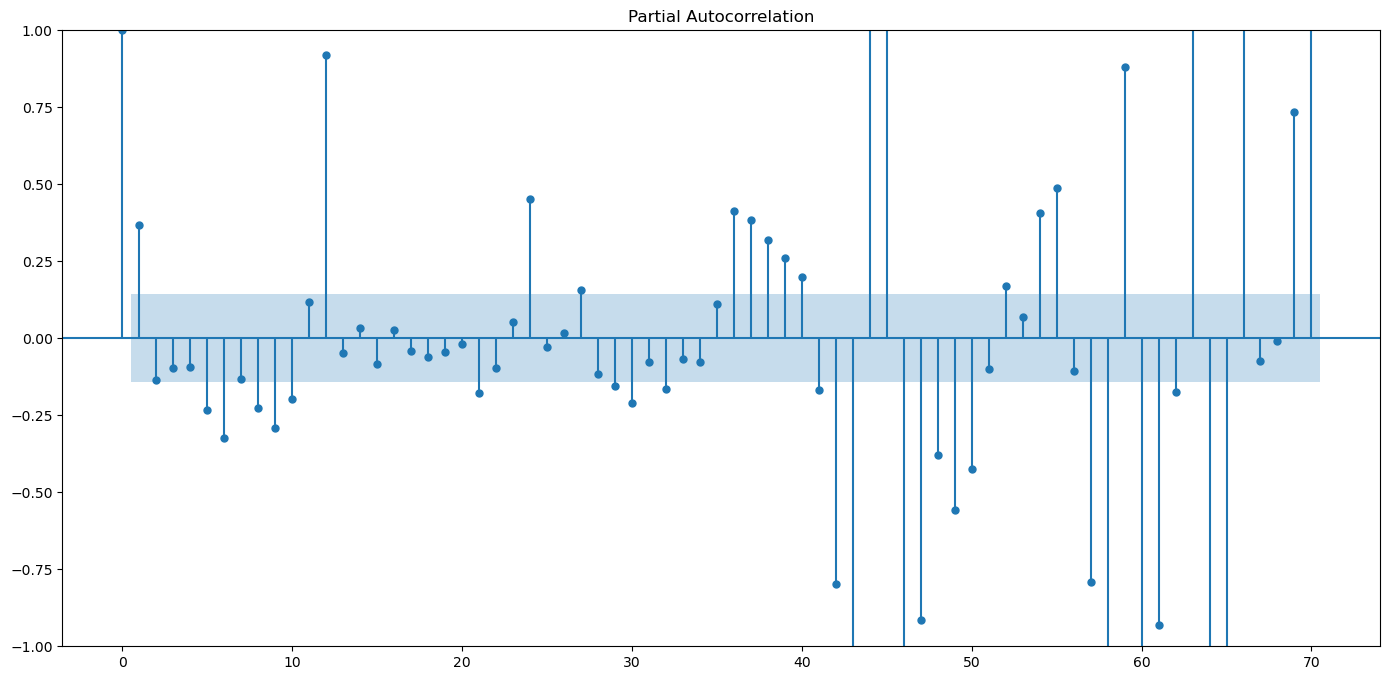

In [1858]:
plot_pacf(Sparkling_wine_time_s['Sparkling'],lags=70);
plt.show();

In [1859]:
#ARIMA
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [1860]:
# Creating an empty Dataframe with column names only
Sparkling_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
Sparkling_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [1861]:
#Find AIC for all ARIMA models from above iteration
for param in pdq:
    Sparkling_ARIMA_model = sm.tsa.arima.ARIMA(Sparkling_train['Sparkling'].values,order=param).fit()
    print('Sparkling_ARIMA{} - AIC:{}'.format(param,Sparkling_ARIMA_model.aic))
    Sparkling_ARIMA_AIC = Sparkling_ARIMA_AIC.append({'param':param, 'AIC': Sparkling_ARIMA_model.aic}, ignore_index=True)

Sparkling_ARIMA(0, 1, 0) - AIC:2267.6630357855465
Sparkling_ARIMA(0, 1, 1) - AIC:2263.0600155918555
Sparkling_ARIMA(0, 1, 2) - AIC:2234.4083231226628
Sparkling_ARIMA(0, 1, 3) - AIC:2233.9948577527166
Sparkling_ARIMA(1, 1, 0) - AIC:2266.6085393190097
Sparkling_ARIMA(1, 1, 1) - AIC:2235.7550946649694
Sparkling_ARIMA(1, 1, 2) - AIC:2234.527200452665
Sparkling_ARIMA(1, 1, 3) - AIC:2235.607808897864
Sparkling_ARIMA(2, 1, 0) - AIC:2260.36574396809
Sparkling_ARIMA(2, 1, 1) - AIC:2233.777626239882
Sparkling_ARIMA(2, 1, 2) - AIC:2213.50921229992
Sparkling_ARIMA(2, 1, 3) - AIC:2232.897841286109
Sparkling_ARIMA(3, 1, 0) - AIC:2257.7233789979387
Sparkling_ARIMA(3, 1, 1) - AIC:2235.5004751299302
Sparkling_ARIMA(3, 1, 2) - AIC:2230.78265875287
Sparkling_ARIMA(3, 1, 3) - AIC:2221.4589166380792


In [1862]:
# Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

Sparkling_ARIMA_AIC.sort_values(by='AIC',ascending=True)

param     AIC
10  (2, 1, 2) 2213.51
15  (3, 1, 3) 2221.46
14  (3, 1, 2) 2230.78
11  (2, 1, 3) 2232.90
9   (2, 1, 1) 2233.78
3   (0, 1, 3) 2233.99
2   (0, 1, 2) 2234.41
6   (1, 1, 2) 2234.53
13  (3, 1, 1) 2235.50
7   (1, 1, 3) 2235.61
5   (1, 1, 1) 2235.76
12  (3, 1, 0) 2257.72
8   (2, 1, 0) 2260.37
1   (0, 1, 1) 2263.06
4   (1, 1, 0) 2266.61
0   (0, 1, 0) 2267.66

In [1863]:
# Apply the ARIMA Model
# Top box -  Gives the overall summary
# Middle box -  Gives the coefficients and tells if the varibales are significant
# Lower box(Roots) - If the model is stable and good for forecasting.Between Imaginary & Real you draw a circle and check
# if the values/roots are inside the circle
Sparkling_auto_ARIMA = sm.tsa.arima.ARIMA(Sparkling_train['Sparkling'], order=(2,1,2),freq='M')

Sparkling_results_auto_ARIMA = Sparkling_auto_ARIMA.fit()

print(Sparkling_results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 19 Feb 2023   AIC                           2213.509
Time:                        16:36:40   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.218      0.0

In [1864]:
#Predict
Sparkling_predicted_auto_ARIMA = Sparkling_results_auto_ARIMA.forecast(steps=len(Sparkling_test))

In [1865]:
Sparkling_ARIMA_rmse = mean_squared_error(Sparkling_test['Sparkling'],Sparkling_predicted_auto_ARIMA,squared=False)
Sparkling_ARIMA_resultsDf = pd.DataFrame({'RMSE': [Sparkling_ARIMA_rmse]},index=['Sparkling - Auto - ARIMA(2,1,2)'])

Sparkling_ARIMA_resultsDf

RMSE
Sparkling - Auto - ARIMA(2,1,2) 1299.98

Comparision  of RMSE to max possible Value i.e. Mean of series

In [1866]:
Sparkling_Max_error = Sparkling_train['Sparkling'].mean()
Sparkling_Max_error

2403.780303030303

In [1867]:
Sparkling_max_error = pd.DataFrame({'RMSE': [Sparkling_Max_error]},index=['Sparkling - Max Error Possible'])
Sparkling_ARIMA_resultsDf = pd.concat([Sparkling_ARIMA_resultsDf,Sparkling_max_error])
Sparkling_ARIMA_resultsDf

RMSE
Sparkling - Auto - ARIMA(2,1,2) 1299.98
Sparkling - Max Error Possible  2403.78

Now Building a Version From Looking at the ACF and PACF Plots

In [1868]:
#Manual Selection ARIIMA
Sparkling_manual_ARIMA = sm.tsa.arima.ARIMA(Sparkling_train['Sparkling'], order=(1,1,1),freq='M')

Sparkling_results_manual_ARIMA = Sparkling_manual_ARIMA.fit()

print(Sparkling_results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1114.878
Date:                Sun, 19 Feb 2023   AIC                           2235.755
Time:                        16:36:41   BIC                           2244.381
Sample:                    01-31-1980   HQIC                          2239.260
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4494      0.043     10.366      0.000       0.364       0.534
ma.L1         -0.9996      0.102     -9.811      0.000      -1.199      -0.800
sigma2      1.401e+06   7.57e-08   1.85e+13      0.0

In [1869]:
#Predict
Sparkling_predicted_manual_ARIMA = Sparkling_results_manual_ARIMA.forecast(steps=len(Sparkling_test))

In [1870]:
#RMSE
Sparkling_ARIMA_rmse_manual = mean_squared_error(Sparkling_test['Sparkling'],Sparkling_predicted_manual_ARIMA,squared=False)
Sparkling_ARIMA_resultsDf2 = pd.DataFrame({'RMSE': [Sparkling_ARIMA_rmse_manual]},index=['Sparkling - Manual - ARIMA(1,1,1)'])


Sparkling_ARIMA_resultsDf = pd.concat([Sparkling_ARIMA_resultsDf,Sparkling_ARIMA_resultsDf2])

Sparkling_ARIMA_resultsDf

RMSE
Sparkling - Auto - ARIMA(2,1,2)   1299.98
Sparkling - Max Error Possible    2403.78
Sparkling - Manual - ARIMA(1,1,1) 1319.94

Plot Diagnostics for both Manual and Auto

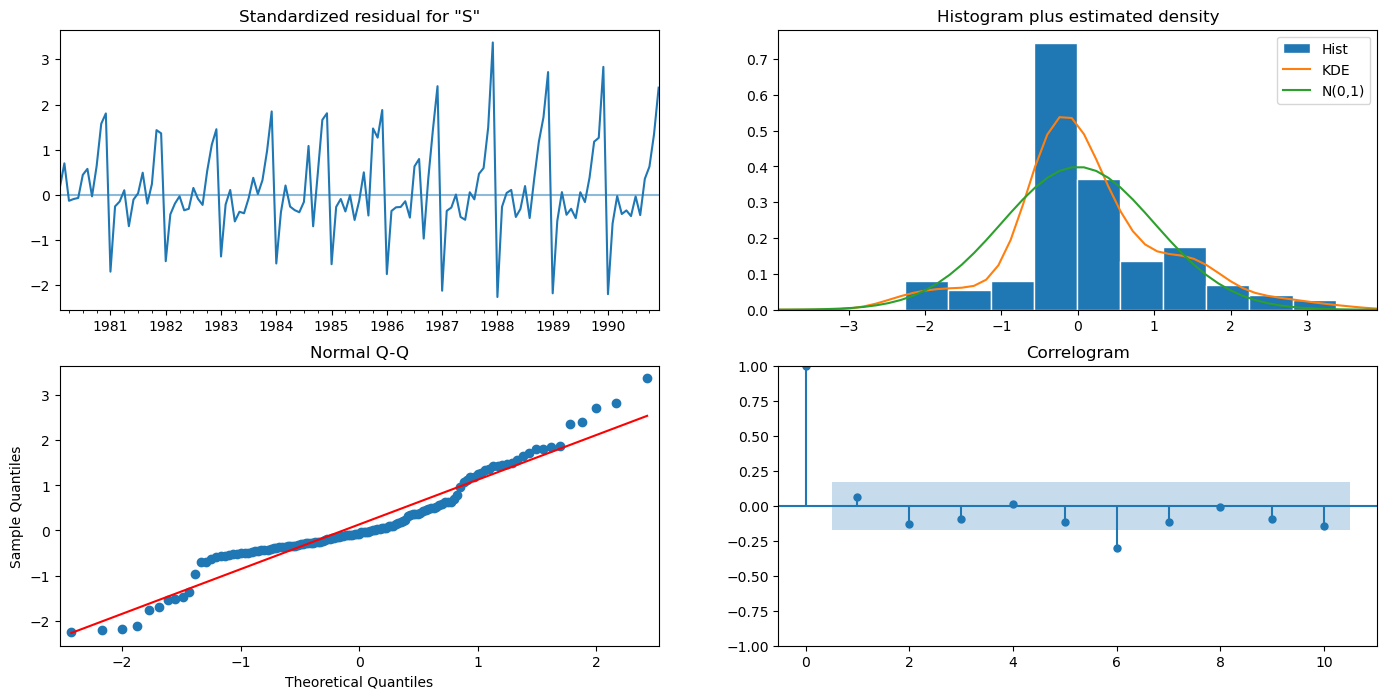

In [1871]:
Sparkling_results_manual_ARIMA.plot_diagnostics();

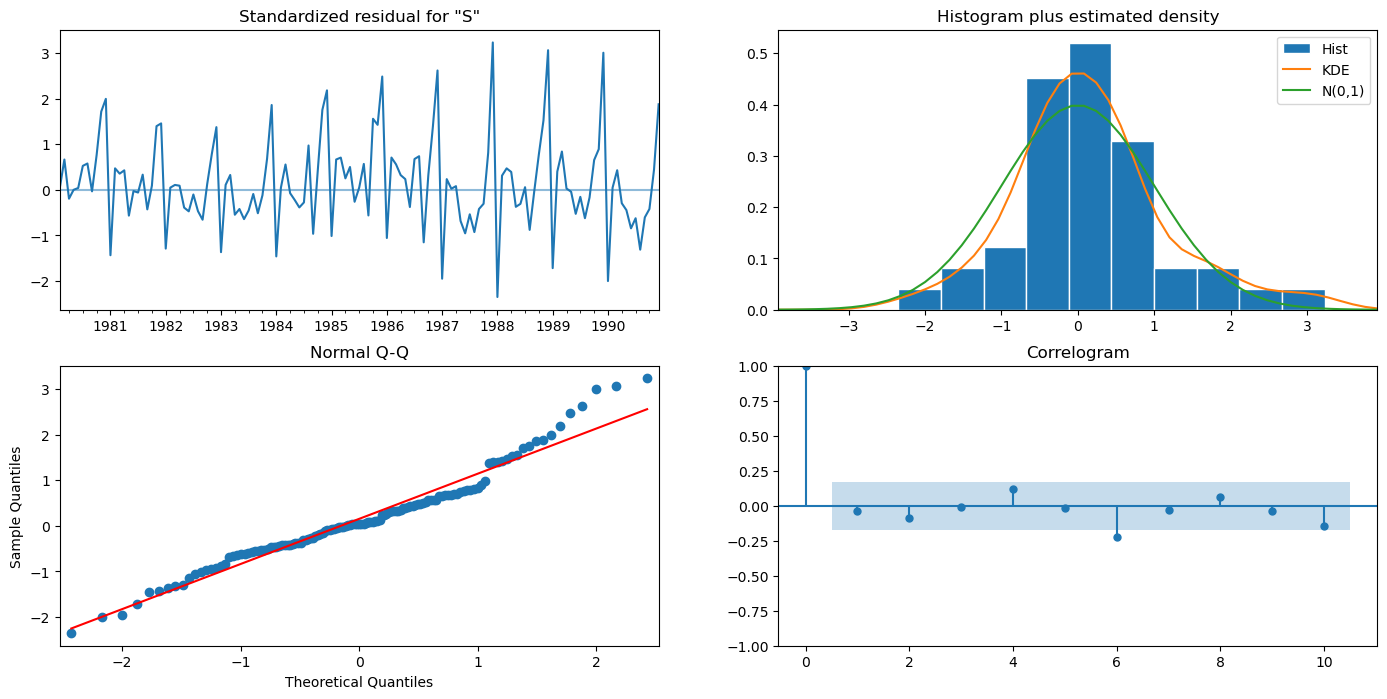

In [1872]:
Sparkling_results_auto_ARIMA.plot_diagnostics();

##### SARIMA

Based on the Differenence ACF chart the Sesonality can be 6 as well as 12

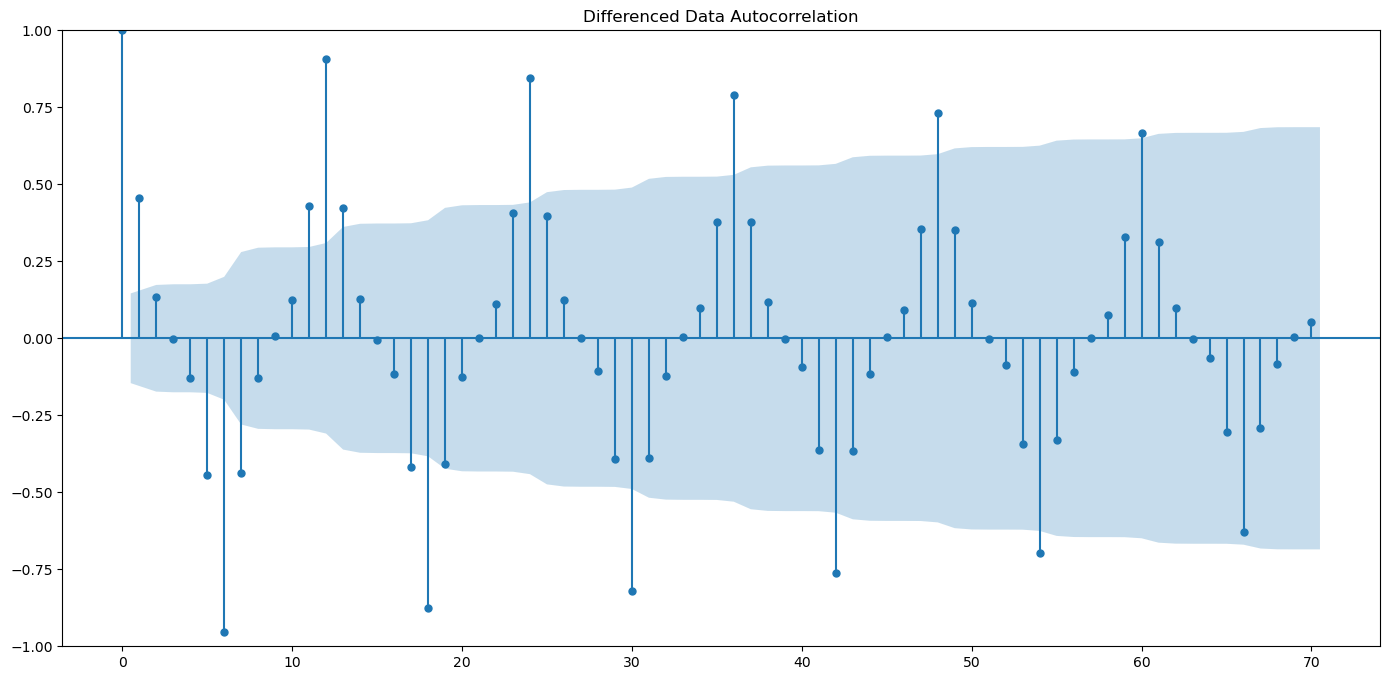

In [1873]:
plot_acf(Sparkling_wine_time_s['Sparkling'].diff(6).dropna(),lags=70,title='Differenced Data Autocorrelation')
plt.show()

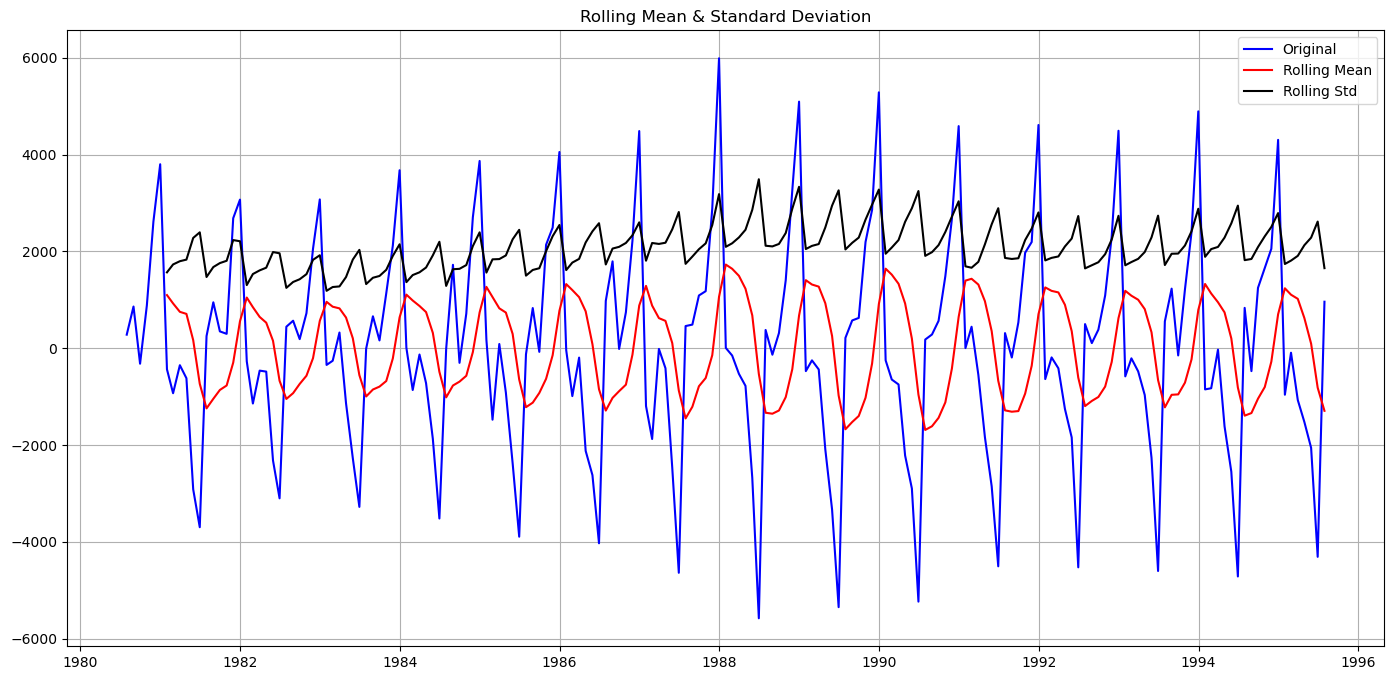

Results of Dickey-Fuller Test:
Test Statistic                -11.39
p-value                         0.00
#Lags Used                      6.00
Number of Observations Used   174.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [1874]:
rcParams['figure.figsize'] = 17,8
test_stationarity((Sparkling_wine_time_s['Sparkling'].diff(6).dropna()))

In [1875]:
p = q = range(0, 3)
d = range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(0,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 0)(0, 0, 0, 6)
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [1876]:
Sparkling_SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
Sparkling_SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [1877]:
for param in pdq:
    for param_seasonal in model_pdq:
        Sparkling_SARIMA_model = sm.tsa.statespace.SARIMAX(Sparkling_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,  ## by force you can make it TS stationary
                                            enforce_invertibility=False) ## Alpha and Beta should be unique
            
        Sparkling_results_SARIMA = Sparkling_SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, Sparkling_results_SARIMA.aic))
        Sparkling_SARIMA_AIC = Sparkling_SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': Sparkling_results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.378076171631
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536887368
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984442647
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360119425485
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.401298687227
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510407
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805655972
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082807
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339541793
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428785873
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298130592
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093277768
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.788510405005
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933263223
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6414775303256
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:

In [1878]:
Sparkling_SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

param      seasonal     AIC
53  (1, 1, 2)  (2, 0, 2, 6) 1727.68
26  (0, 1, 2)  (2, 0, 2, 6) 1727.89
80  (2, 1, 2)  (2, 0, 2, 6) 1729.36
17  (0, 1, 1)  (2, 0, 2, 6) 1741.64
44  (1, 1, 1)  (2, 0, 2, 6) 1743.38

In [1879]:
Sparkling_auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(Sparkling_train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Sparkling_results_auto_SARIMA_6 = Sparkling_auto_SARIMA_6.fit(maxiter=1000)
print(Sparkling_results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.839
Date:                           Sun, 19 Feb 2023   AIC                           1727.679
Time:                                   16:37:03   BIC                           1749.707
Sample:                                        0   HQIC                          1736.621
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6449      0.286     -2.257      0.024      -1.205      -0.085
ma.L1         -0.1068      0.250     -0.428

Predict valus from Trained model

In [1880]:
Sparkling_predicted_auto_SARIMA_6 = Sparkling_results_auto_SARIMA_6.get_forecast(steps=len(Sparkling_test))
Sparkling_predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y    mean  mean_se  mean_ci_lower  mean_ci_upper
0 1330.43   380.56         584.54        2076.33
1 1177.33   392.12         408.80        1945.86
2 1625.96   392.31         857.05        2394.87
3 1546.32   397.71         766.83        2325.82
4 1308.74   398.93         526.86        2090.63

In [1881]:
#RMSE
Sparkling_SARIMA_rmse_auto = mean_squared_error(Sparkling_test['Sparkling'],Sparkling_predicted_auto_SARIMA_6.predicted_mean,squared=False)
Sparkling_SARIMA_resultsDf3 = pd.DataFrame({'RMSE': [Sparkling_SARIMA_rmse_auto]},index=['Sparkling - Auto - SARIMA(1,1,2)(2,0,2,6)'])


Sparkling_ARIMA_resultsDf = pd.concat([Sparkling_ARIMA_resultsDf,Sparkling_SARIMA_resultsDf3])

Sparkling_ARIMA_resultsDf

RMSE
Sparkling - Auto - ARIMA(2,1,2)           1299.98
Sparkling - Max Error Possible            2403.78
Sparkling - Manual - ARIMA(1,1,1)         1319.94
Sparkling - Auto - SARIMA(1,1,2)(2,0,2,6)  626.90

Repeating the same for Seasonality 12

In [1882]:
p = q = range(0, 3)
d = range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(0,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 0)(0, 0, 0, 12)
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [1883]:
Sparkling_SARIMA_AIC_12 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
Sparkling_SARIMA_AIC_12

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [1884]:
for param in pdq:
    for param_seasonal in model_pdq:
        Sparkling_SARIMA_model_12 = sm.tsa.statespace.SARIMAX(Sparkling_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,  ## by force you can make it TS stationary
                                            enforce_invertibility=False) ## Alpha and Beta should be unique
            
        Sparkling_results_SARIMA_12 = Sparkling_SARIMA_model_12.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, Sparkling_results_SARIMA_12.aic))
        Sparkling_SARIMA_AIC_12 = Sparkling_SARIMA_AIC_12.append({'param':param,'seasonal':param_seasonal ,'AIC': Sparkling_results_SARIMA_12.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616846026
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.153364023789
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388676
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791144
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158601068
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920783
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566694
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573148467
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838225
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.09031937492
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319653552423
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954175318
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245214428656
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.3683739583455
SARIMA(0, 1, 2

In [1885]:
Sparkling_SARIMA_AIC_12.sort_values(by=['AIC'],ascending=True).head()

param       seasonal     AIC
50  (1, 1, 2)  (1, 0, 2, 12) 1555.58
53  (1, 1, 2)  (2, 0, 2, 12) 1555.93
26  (0, 1, 2)  (2, 0, 2, 12) 1557.12
23  (0, 1, 2)  (1, 0, 2, 12) 1557.16
77  (2, 1, 2)  (1, 0, 2, 12) 1557.34

In [1886]:
Sparkling_auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(Sparkling_train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Sparkling_results_auto_SARIMA_12 = Sparkling_auto_SARIMA_12.fit(maxiter=1000)
print(Sparkling_results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 19 Feb 2023   AIC                           1555.584
Time:                                    16:37:54   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

In [1887]:
Sparkling_predicted_auto_SARIMA_12 = Sparkling_results_auto_SARIMA_12.get_forecast(steps=len(Sparkling_test))
Sparkling_predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y    mean  mean_se  mean_ci_lower  mean_ci_upper
0 1327.42   388.35         566.27        2088.56
1 1315.14   402.01         527.22        2103.06
2 1621.62   402.00         833.72        2409.53
3 1598.90   407.24         800.72        2397.07
4 1392.72   407.97         593.12        2192.33

In [1888]:
#RMSE
Sparkling_SARIMA_rmse_auto_12 = mean_squared_error(Sparkling_test['Sparkling'],Sparkling_predicted_auto_SARIMA_12.predicted_mean,squared=False)
Sparkling_SARIMA_resultsDf3_12 = pd.DataFrame({'RMSE': [Sparkling_SARIMA_rmse_auto_12]},index=['Sparkling - Auto - SARIMA(1,1,2)(1,0,2,12)'])


Sparkling_ARIMA_resultsDf = pd.concat([Sparkling_ARIMA_resultsDf,Sparkling_SARIMA_resultsDf3_12])

Sparkling_ARIMA_resultsDf

RMSE
Sparkling - Auto - ARIMA(2,1,2)            1299.98
Sparkling - Max Error Possible             2403.78
Sparkling - Manual - ARIMA(1,1,1)          1319.94
Sparkling - Auto - SARIMA(1,1,2)(2,0,2,6)   626.90
Sparkling - Auto - SARIMA(1,1,2)(1,0,2,12)  528.59

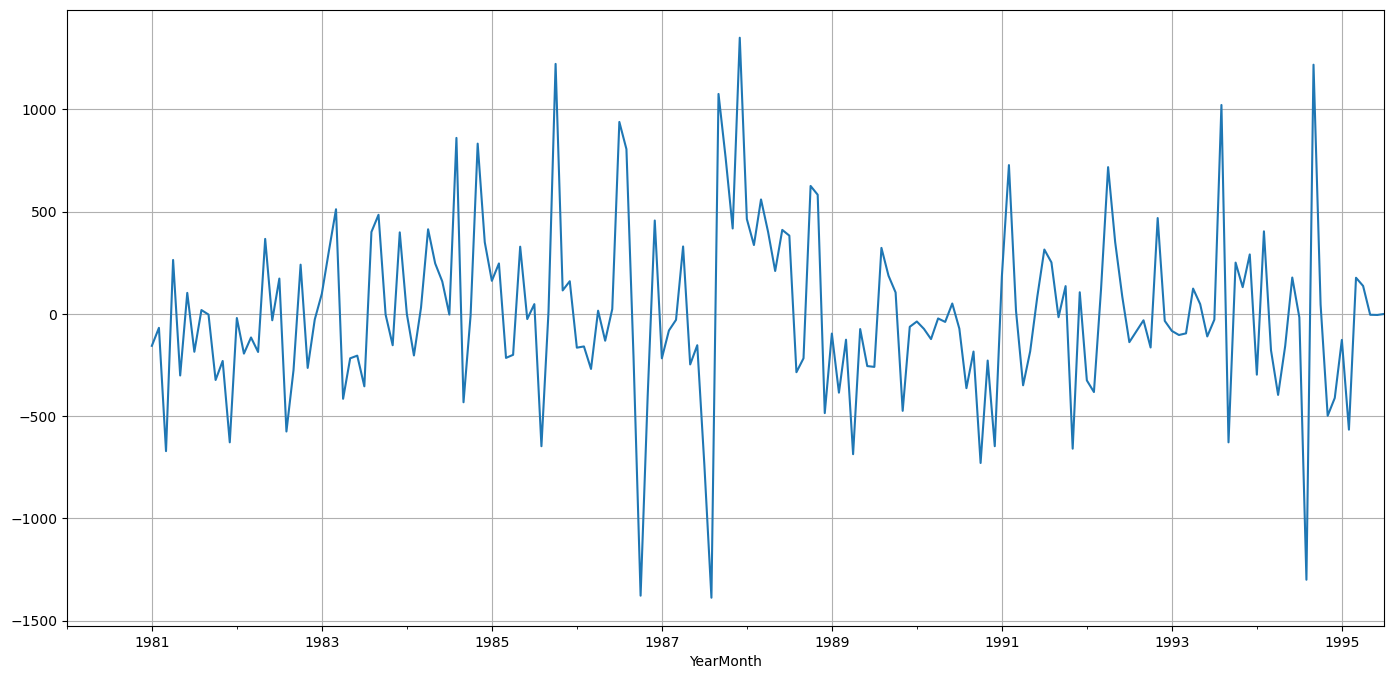

In [1889]:
(Sparkling_wine_time_s['Sparkling'].diff(12)).plot()
plt.grid();

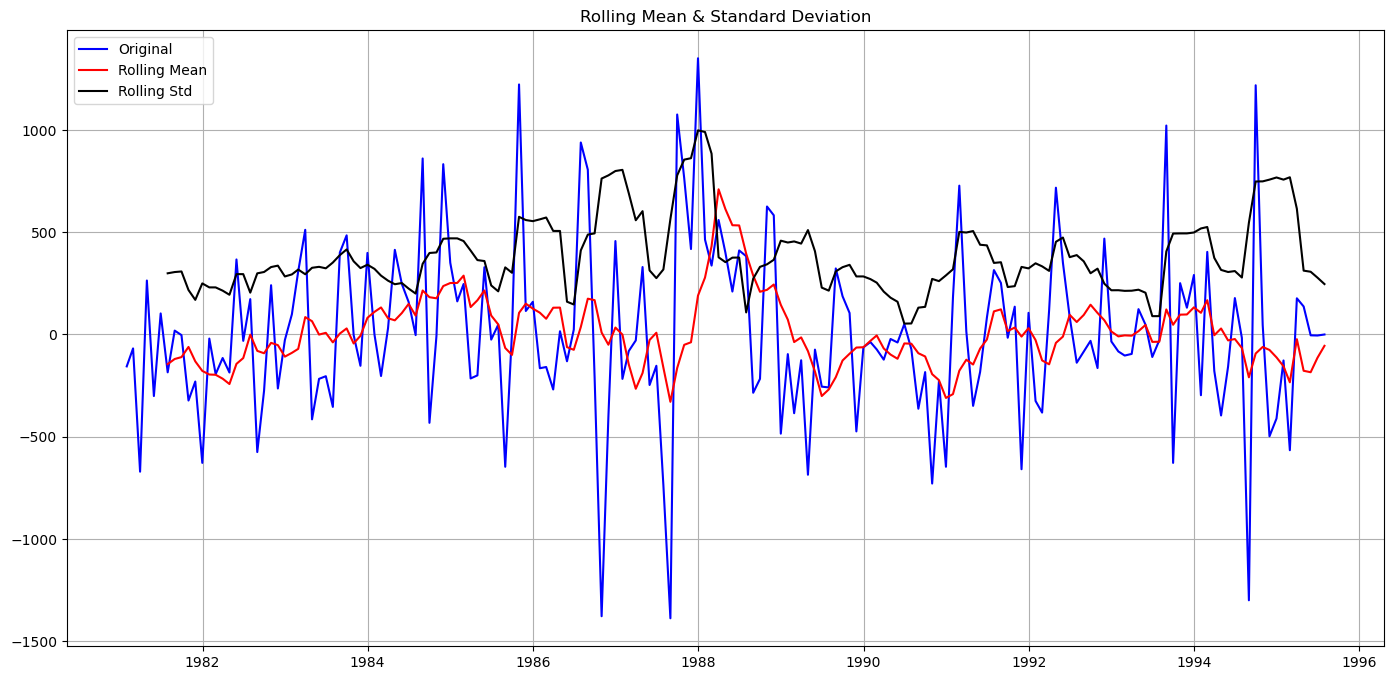

Results of Dickey-Fuller Test:
Test Statistic                 -4.46
p-value                         0.00
#Lags Used                     11.00
Number of Observations Used   163.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [1890]:
test_stationarity((Sparkling_wine_time_s['Sparkling'].diff(12).dropna()))

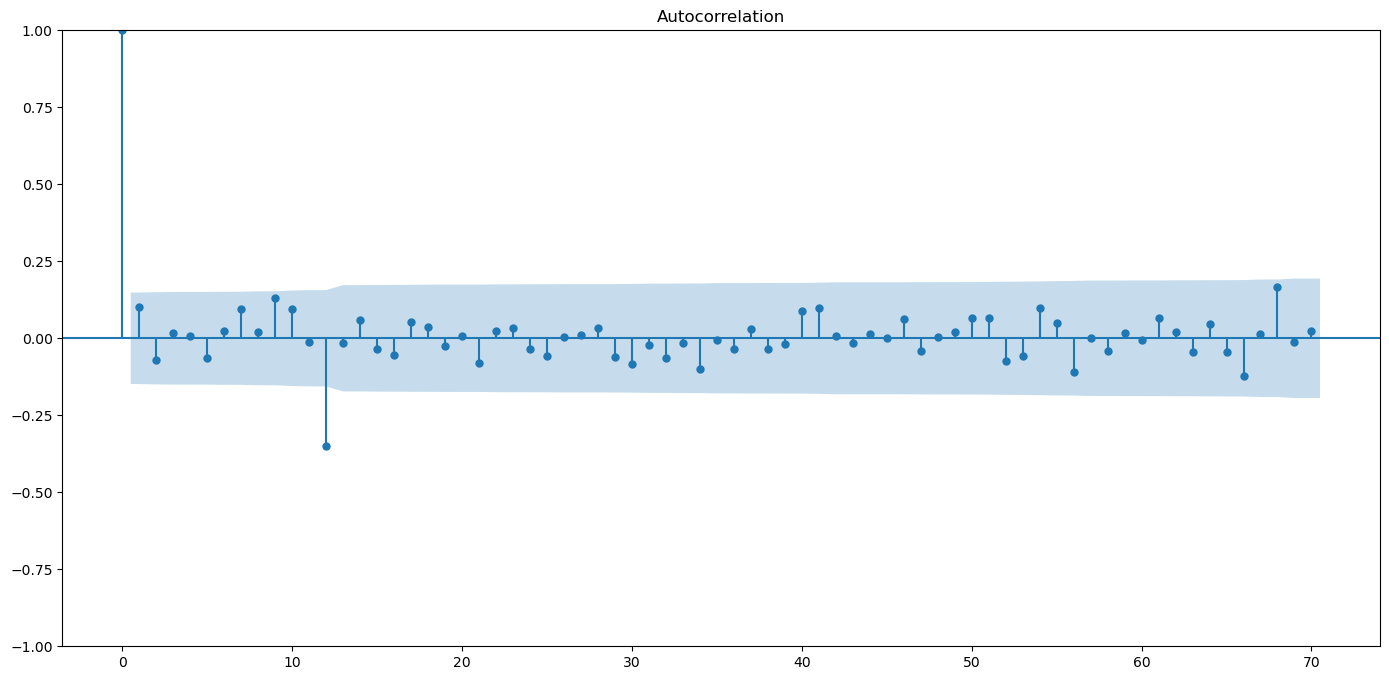

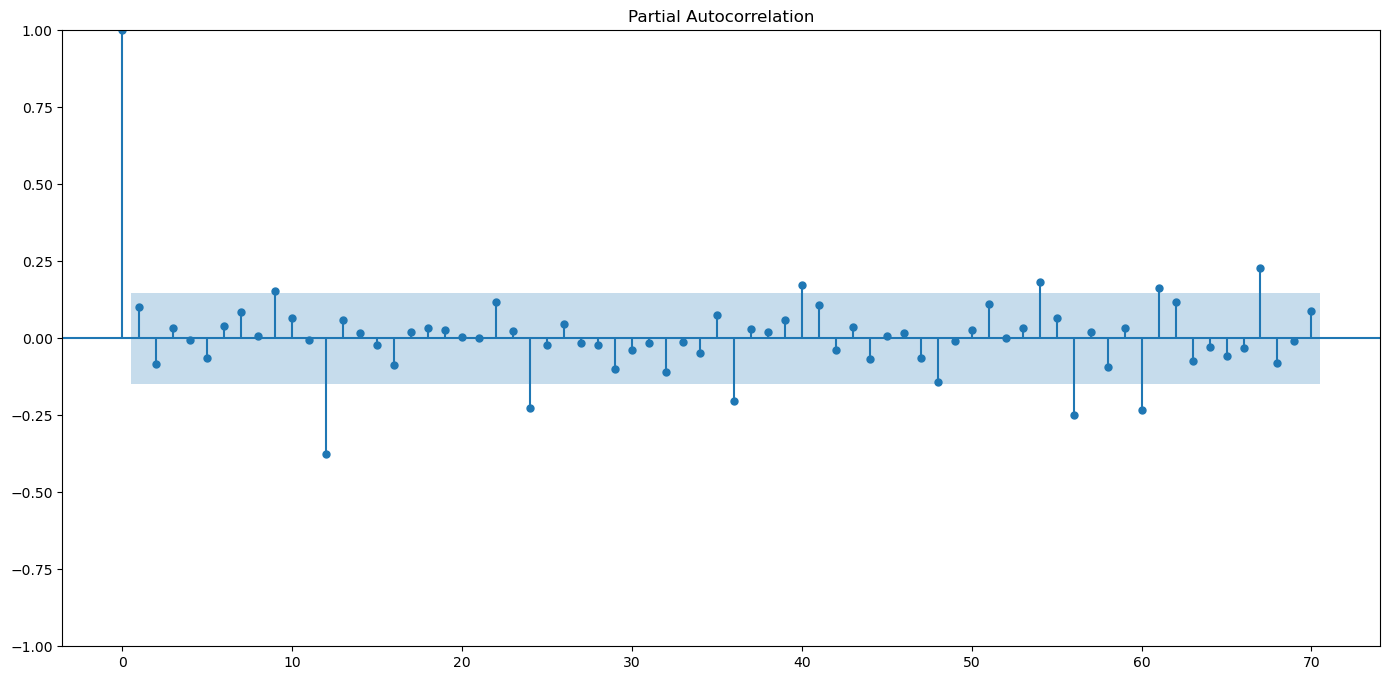

In [1891]:
plot_acf((Sparkling_wine_time_s['Sparkling']).diff(12).dropna(),lags=70);
plot_pacf((Sparkling_wine_time_s['Sparkling']).diff(12).dropna(),lags=70);

In [1892]:
Sparkling_manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(Sparkling_train['Sparkling'].values,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Sparkling_results_manual_SARIMA_12 = Sparkling_manual_SARIMA_12.fit(maxiter=1000)
print(Sparkling_results_manual_SARIMA_12.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1099.467
Date:                Sun, 19 Feb 2023   AIC                           2204.934
Time:                        16:37:55   BIC                           2213.513
Sample:                             0   HQIC                          2208.420
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4324      0.106      4.074      0.000       0.224       0.640
ma.L1         -0.9865      0.080    -12.291      0.000      -1.144      -0.829
sigma2      1.756e+06   2.14e+05      8.215      0.0

In [1893]:
Sparkling_predicted_manual_SARIMA_12 = Sparkling_results_manual_SARIMA_12.get_forecast(steps=len(Sparkling_test))
Sparkling_predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y    mean  mean_se  mean_ci_lower  mean_ci_upper
0 4050.86  1325.57        1452.79        6648.94
1 3187.83  1451.75         342.46        6033.21
2 2814.70  1477.51         -81.17        5710.57
3 2653.38  1483.88        -254.98        5561.74
4 2583.63  1485.92        -328.72        5495.98

In [1894]:
#RMSE
Sparkling_SARIMA_rmse_manual_12 = mean_squared_error(Sparkling_test['Sparkling'],Sparkling_predicted_manual_SARIMA_12.predicted_mean,squared=False)
Sparkling_SARIMA_resultsDf4_12 = pd.DataFrame({'RMSE': [Sparkling_SARIMA_rmse_manual_12]},index=['Sparkling - Manual - SARIMA(1,1,1)(0,0,0,12)'])


Sparkling_ARIMA_resultsDf = pd.concat([Sparkling_ARIMA_resultsDf,Sparkling_SARIMA_resultsDf4_12])

Sparkling_ARIMA_resultsDf

RMSE
Sparkling - Auto - ARIMA(2,1,2)              1299.98
Sparkling - Max Error Possible               2403.78
Sparkling - Manual - ARIMA(1,1,1)            1319.94
Sparkling - Auto - SARIMA(1,1,2)(2,0,2,6)     626.90
Sparkling - Auto - SARIMA(1,1,2)(1,0,2,12)    528.59
Sparkling - Manual - SARIMA(1,1,1)(0,0,0,12) 1325.34

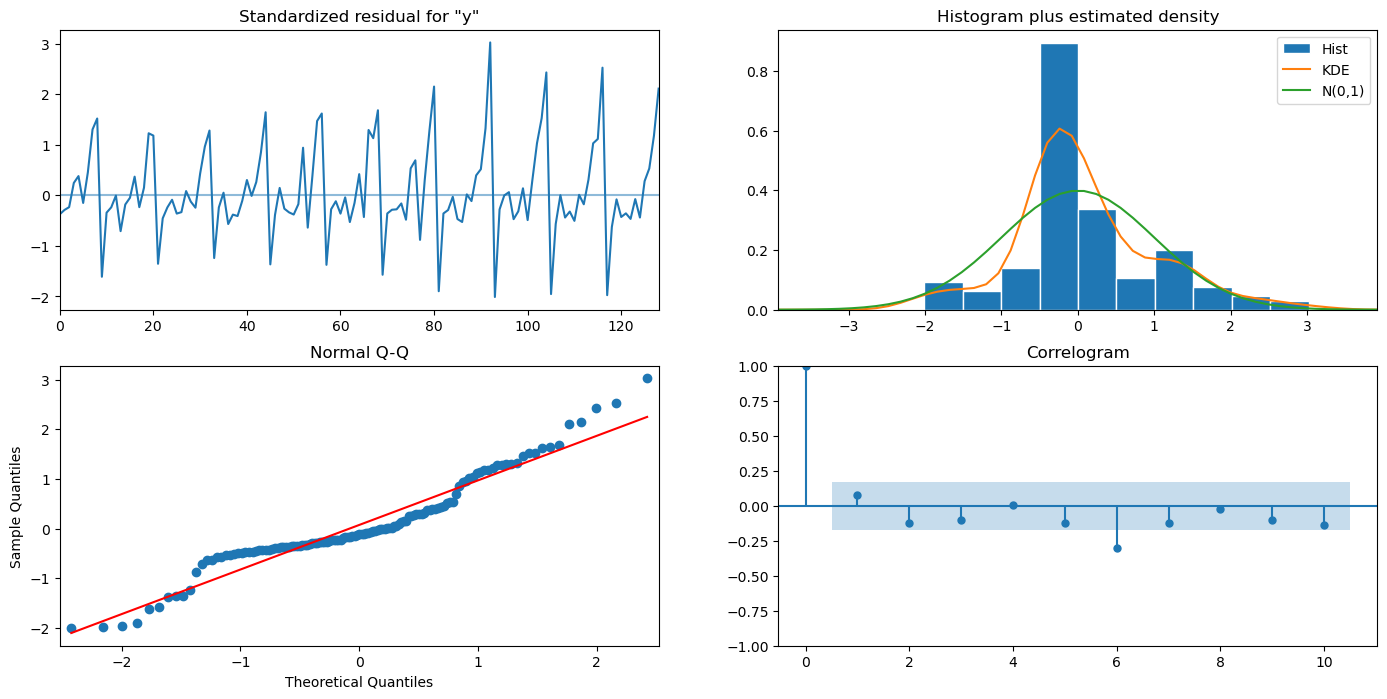

In [1895]:
Sparkling_results_manual_SARIMA_12.plot_diagnostics();

##### Prediction on Full data

Building the most optimum model on the Full Data and Prediction of 12 Months Future and plot

In [1896]:
Sparkling_manual_SARIMA_12_month_future = sm.tsa.statespace.SARIMAX(Sparkling_wine_time_s['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Sparkling_results_manual_SARIMA_12_month_future = Sparkling_manual_SARIMA_12_month_future.fit(maxiter=1000)
print(Sparkling_results_manual_SARIMA_12_month_future.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Sun, 19 Feb 2023   AIC                           2360.827
Time:                                    16:37:57   BIC                           2382.309
Sample:                                         0   HQIC                          2369.551
                                            - 187                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6608      0.242     -2.730      0.006      -1.135      -0.186
ma.L1         -0.2742      0.200   

In [1897]:
Sparkling_predicted_manual_SARIMA_12_month_future = Sparkling_results_manual_SARIMA_12_month_future.get_forecast(steps=12)
Sparkling_predicted_manual_SARIMA_12_month_future_date = Sparkling_predicted_manual_SARIMA_12_month_future.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))
Sparkling_predicted_manual_SARIMA_12_month_future.summary_frame(alpha=0.05).head()

y    mean  mean_se  mean_ci_lower  mean_ci_upper
0 1836.33   379.71        1092.11        2580.56
1 2489.49   384.48        1735.92        3243.06
2 3324.53   384.59        2570.75        4078.30
3 4020.23   386.35        3263.00        4777.45
4 6290.01   386.40        5532.68        7047.35

In [1898]:
rmse_12_month_future = mean_squared_error(Sparkling_wine_time_s['Sparkling'],Sparkling_results_manual_SARIMA_12_month_future.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse_12_month_future)

RMSE of the Full Model 539.9718176029052


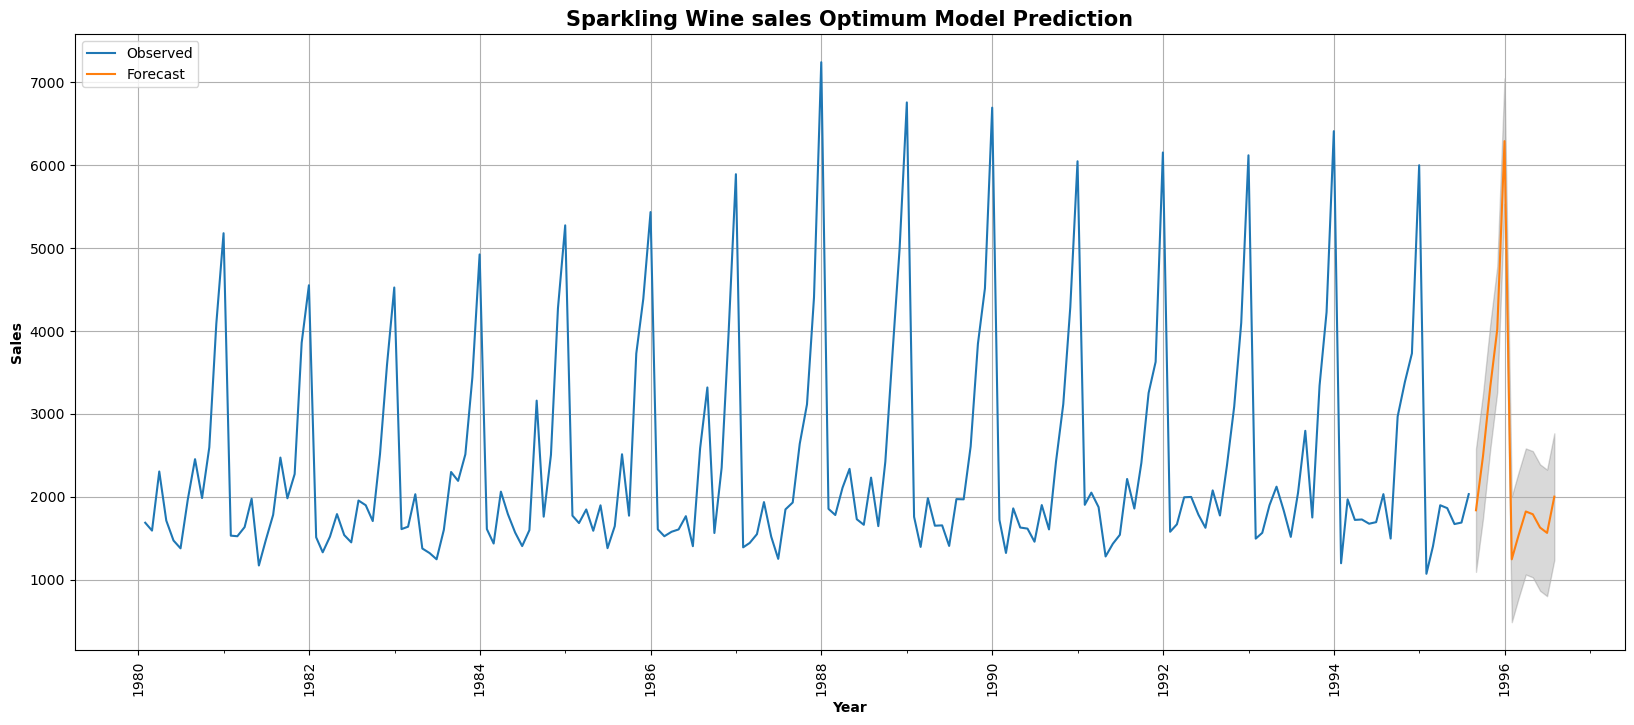

In [1899]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Sparkling_wine_time_s.index.values,Sparkling_wine_time_s['Sparkling'])
ax.plot(Sparkling_predicted_manual_SARIMA_12_month_future_date.index.values,Sparkling_predicted_manual_SARIMA_12_month_future_date['mean'])
ax.fill_between(Sparkling_predicted_manual_SARIMA_12_month_future_date.index.values,Sparkling_predicted_manual_SARIMA_12_month_future_date['mean_ci_lower'],Sparkling_predicted_manual_SARIMA_12_month_future_date['mean_ci_upper'],color='k', alpha=.15)
# Sparkling_predicted_manual_SARIMA_12_month_future_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

# Set title and labels for axes
plt.legend(['Observed','Forecast'],loc="upper left")
plt.title("Sparkling Wine sales Optimum Model Prediction",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

In [1900]:
Sparkling_SARIMA_resultsDf5_12 = pd.DataFrame({'RMSE': [rmse_12_month_future]},index=['Sparkling - Prediction - 12 Months'])


Sparkling_ARIMA_resultsDf = pd.concat([Sparkling_ARIMA_resultsDf,Sparkling_SARIMA_resultsDf5_12])

Sparkling_ARIMA_resultsDf

RMSE
Sparkling - Auto - ARIMA(2,1,2)              1299.98
Sparkling - Max Error Possible               2403.78
Sparkling - Manual - ARIMA(1,1,1)            1319.94
Sparkling - Auto - SARIMA(1,1,2)(2,0,2,6)     626.90
Sparkling - Auto - SARIMA(1,1,2)(1,0,2,12)    528.59
Sparkling - Manual - SARIMA(1,1,1)(0,0,0,12) 1325.34
Sparkling - Prediction - 12 Months            539.97

In [1901]:
Sparkling_ARIMA_resultsDf.to_excel('Sparkling_ARIMA_models.xlsx')

#### Rose

##### Stationarity

Dicky Fuller Test

Null Hypothesis:        H0 - Series is not Stationary   
Alternative Hypothesis: H1 - Series is Stationary 

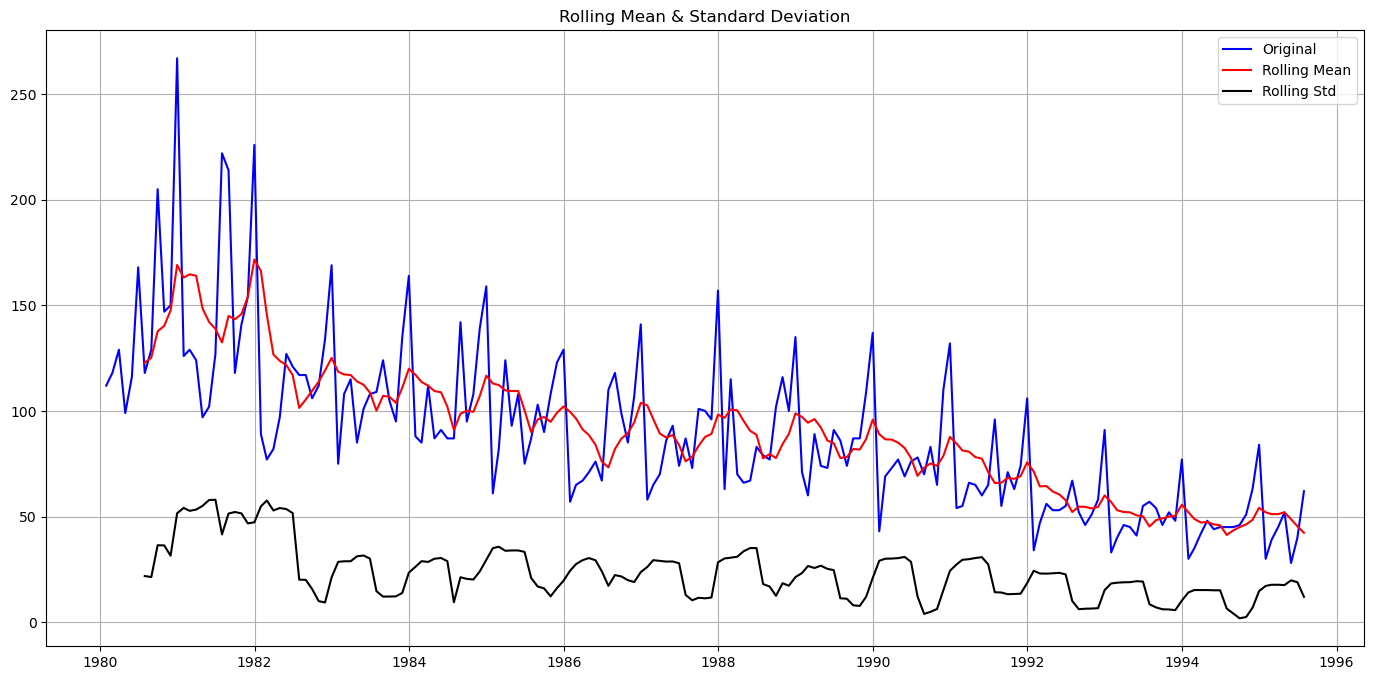

Results of Dickey-Fuller Test:
Test Statistic                 -1.87
p-value                         0.34
#Lags Used                     13.00
Number of Observations Used   173.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [1902]:
rcParams['figure.figsize'] = 17,8
test_stationarity(Rose_wine_time_s['Rose'])

p-value > 0.05 Hence Series is not Stationary

Checking Stationarity for Difference order of 1

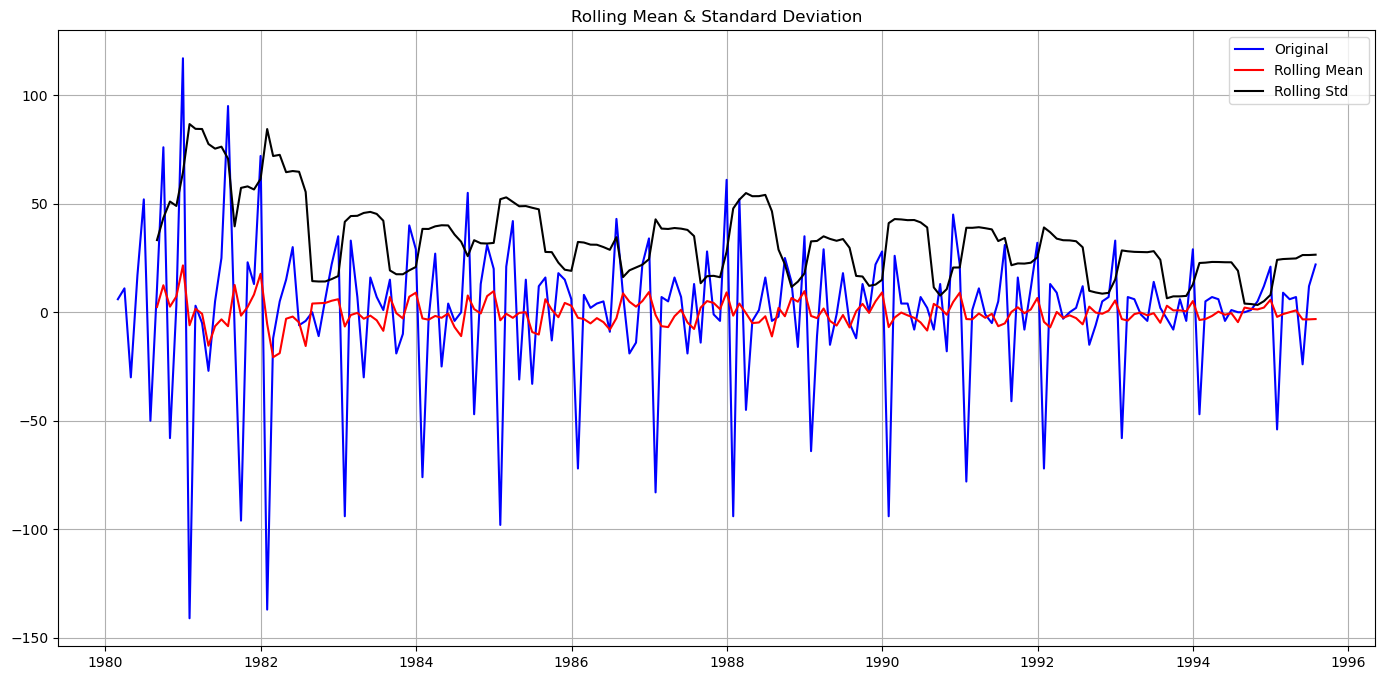

Results of Dickey-Fuller Test:
Test Statistic                 -8.04
p-value                         0.00
#Lags Used                     12.00
Number of Observations Used   173.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [1903]:
test_stationarity(Rose_wine_time_s['Rose'].diff().dropna())

p-value < 0.05 Hence Series is Stationary

##### ARIMA Model

Now We try to build an Automated ARIMA/SARIMA Models

Before we do that let us try to determine the ideal p and q values

Plotting ACF - q

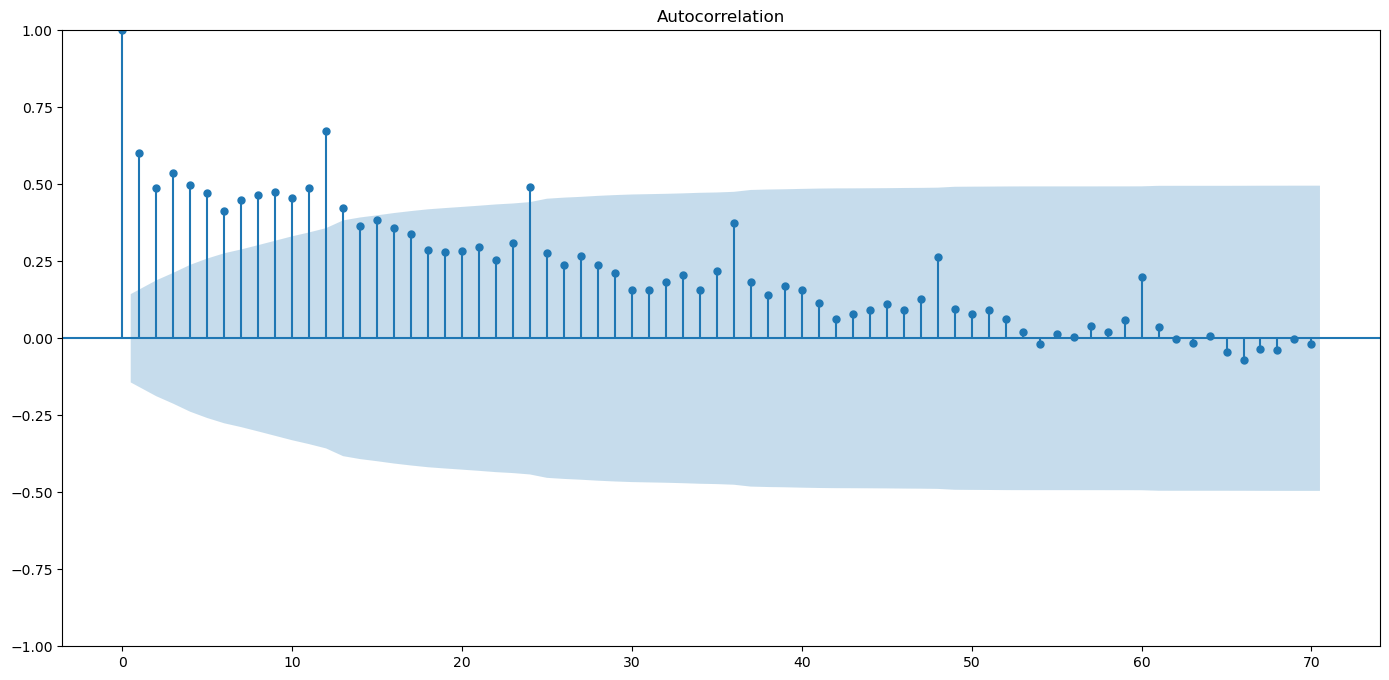

In [1904]:
plot_acf(Rose_wine_time_s['Rose'],lags=70);
plt.show();

Plotting PACF - p

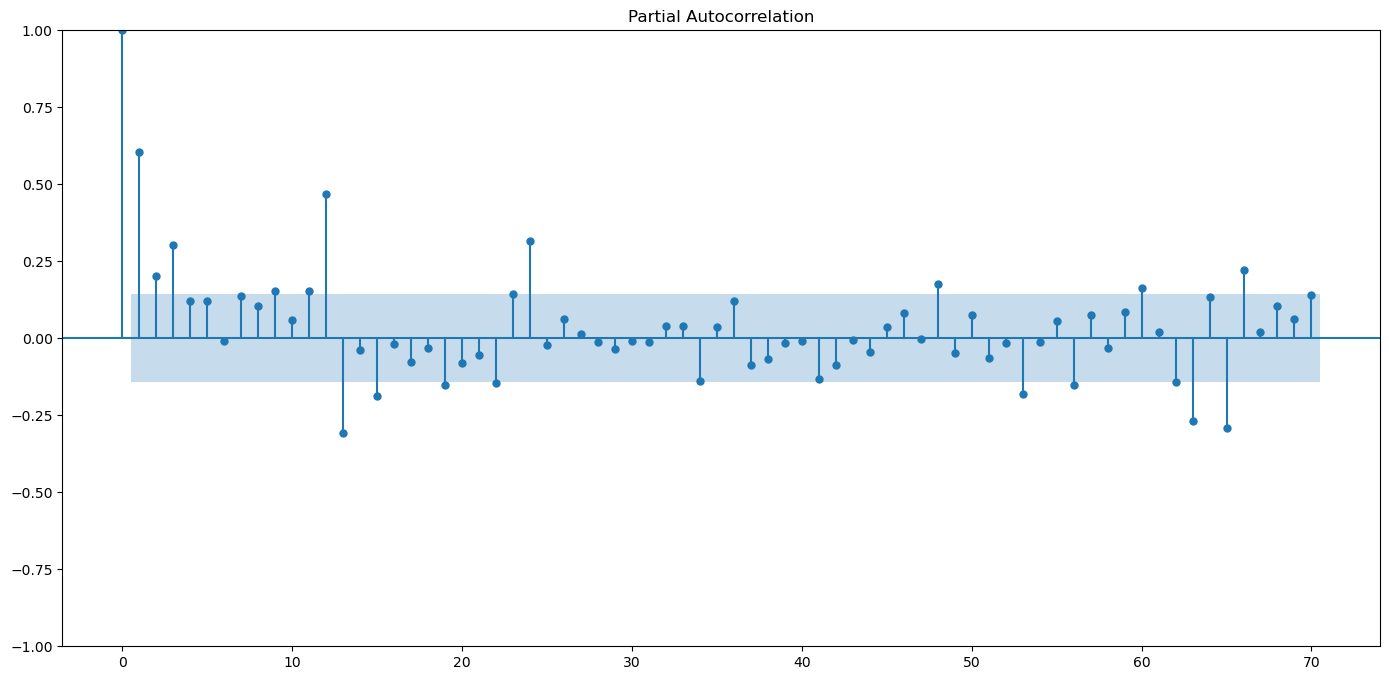

In [1905]:
plot_pacf(Rose_wine_time_s['Rose'],lags=70);
plt.show();

In [1906]:
#ARIMA
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [1907]:
# Creating an empty Dataframe with column names only
Rose_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
Rose_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [1908]:
#Find AIC for all ARIMA models from above iteration
for param in pdq:
    Rose_ARIMA_model = sm.tsa.arima.ARIMA(Rose_train['Rose'].values,order=param).fit()
    print('Rose_ARIMA{} - AIC:{}'.format(param,Rose_ARIMA_model.aic))
    Rose_ARIMA_AIC = Rose_ARIMA_AIC.append({'param':param, 'AIC': Rose_ARIMA_model.aic}, ignore_index=True)

Rose_ARIMA(0, 1, 0) - AIC:1333.1546729124348
Rose_ARIMA(0, 1, 1) - AIC:1282.3098319748299
Rose_ARIMA(0, 1, 2) - AIC:1279.671528853576
Rose_ARIMA(0, 1, 3) - AIC:1280.5453761734661
Rose_ARIMA(1, 1, 0) - AIC:1317.3503105381546
Rose_ARIMA(1, 1, 1) - AIC:1280.5742295380066
Rose_ARIMA(1, 1, 2) - AIC:1279.8707234231906
Rose_ARIMA(1, 1, 3) - AIC:1281.8707223310012
Rose_ARIMA(2, 1, 0) - AIC:1298.6110341604983
Rose_ARIMA(2, 1, 1) - AIC:1281.5078621868486
Rose_ARIMA(2, 1, 2) - AIC:1281.8707222264402
Rose_ARIMA(2, 1, 3) - AIC:1274.6955808922999
Rose_ARIMA(3, 1, 0) - AIC:1297.4810917271711
Rose_ARIMA(3, 1, 1) - AIC:1282.4192776271886
Rose_ARIMA(3, 1, 2) - AIC:1283.720740597711
Rose_ARIMA(3, 1, 3) - AIC:1278.656698872491


In [1909]:
# Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
Rose_ARIMA_AIC.sort_values(by='AIC',ascending=True)

param     AIC
11  (2, 1, 3) 1274.70
15  (3, 1, 3) 1278.66
2   (0, 1, 2) 1279.67
6   (1, 1, 2) 1279.87
3   (0, 1, 3) 1280.55
5   (1, 1, 1) 1280.57
9   (2, 1, 1) 1281.51
10  (2, 1, 2) 1281.87
7   (1, 1, 3) 1281.87
1   (0, 1, 1) 1282.31
13  (3, 1, 1) 1282.42
14  (3, 1, 2) 1283.72
12  (3, 1, 0) 1297.48
8   (2, 1, 0) 1298.61
4   (1, 1, 0) 1317.35
0   (0, 1, 0) 1333.15

In [1910]:
# Apply the ARIMA Model
# Top box -  Gives the overall summary
# Middle box -  Gives the coefficients and tells if the varibales are significant
# Lower box(Roots) - If the model is stable and good for forecasting.Between Imaginary & Real you draw a circle and check
# if the values/roots are inside the circle
Rose_auto_ARIMA = sm.tsa.arima.ARIMA(Rose_train['Rose'], order=(2,1,3),freq='M')

Rose_results_auto_ARIMA = Rose_auto_ARIMA.fit()

print(Rose_results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 19 Feb 2023   AIC                           1274.696
Time:                        16:38:00   BIC                           1291.947
Sample:                    01-31-1980   HQIC                          1281.706
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6774      0.084    -20.019      0.000      -1.842      -1.513
ar.L2         -0.7283      0.084     -8.691      0.000      -0.893      -0.564
ma.L1          1.0446      0.593      1.762      0.0

In [1911]:
#Predict
Rose_predicted_auto_ARIMA = Rose_results_auto_ARIMA.forecast(steps=len(Rose_test))

In [1912]:
Rose_ARIMA_rmse = mean_squared_error(Rose_test['Rose'],Rose_predicted_auto_ARIMA,squared=False)
Rose_ARIMA_resultsDf = pd.DataFrame({'RMSE': [Rose_ARIMA_rmse]},index=['Rose - Auto - ARIMA(2,1,3)'])

Rose_ARIMA_resultsDf

RMSE
Rose - Auto - ARIMA(2,1,3) 36.84

In [1913]:
Rose_Max_error =  Rose_train['Rose'].mean()
Rose_Max_error

104.93939393939394

In [1914]:
Rose_max_error = pd.DataFrame({'RMSE': [Rose_Max_error]},index=['Rose - Max Error Possible'])
Rose_ARIMA_resultsDf = pd.concat([Rose_ARIMA_resultsDf,Rose_max_error])
Rose_ARIMA_resultsDf

RMSE
Rose - Auto - ARIMA(2,1,3)  36.84
Rose - Max Error Possible  104.94

Now Building a Version From Looking at the ACF and PACF Plots

In [1915]:
#Manual Selection ARIIMA
Rose_manual_ARIMA = sm.tsa.arima.ARIMA(Rose_train['Rose'], order=(3,1,13),freq='M')

Rose_results_manual_ARIMA = Rose_manual_ARIMA.fit()

print(Rose_results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                ARIMA(3, 1, 13)   Log Likelihood                -616.154
Date:                Sun, 19 Feb 2023   AIC                           1266.309
Time:                        16:38:01   BIC                           1315.187
Sample:                    01-31-1980   HQIC                          1286.170
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0376      0.181     -0.207      0.836      -0.393       0.318
ar.L2         -0.2489      0.188     -1.326      0.185      -0.617       0.119
ar.L3          0.0163      0.156      0.104      0.9

In [1916]:
#Predict
Rose_predicted_manual_ARIMA = Rose_results_manual_ARIMA.forecast(steps=len(Rose_test))

In [1917]:
#RMSE
Rose_ARIMA_rmse_manual = mean_squared_error(Rose_test['Rose'],Rose_predicted_manual_ARIMA,squared=False)
Rose_ARIMA_resultsDf2 = pd.DataFrame({'RMSE': [Rose_ARIMA_rmse_manual]},index=['Rose - Manual - ARIMA(3,1,13)'])


Rose_ARIMA_resultsDf = pd.concat([Rose_ARIMA_resultsDf,Rose_ARIMA_resultsDf2])

Rose_ARIMA_resultsDf

RMSE
Rose - Auto - ARIMA(2,1,3)     36.84
Rose - Max Error Possible     104.94
Rose - Manual - ARIMA(3,1,13)  35.00

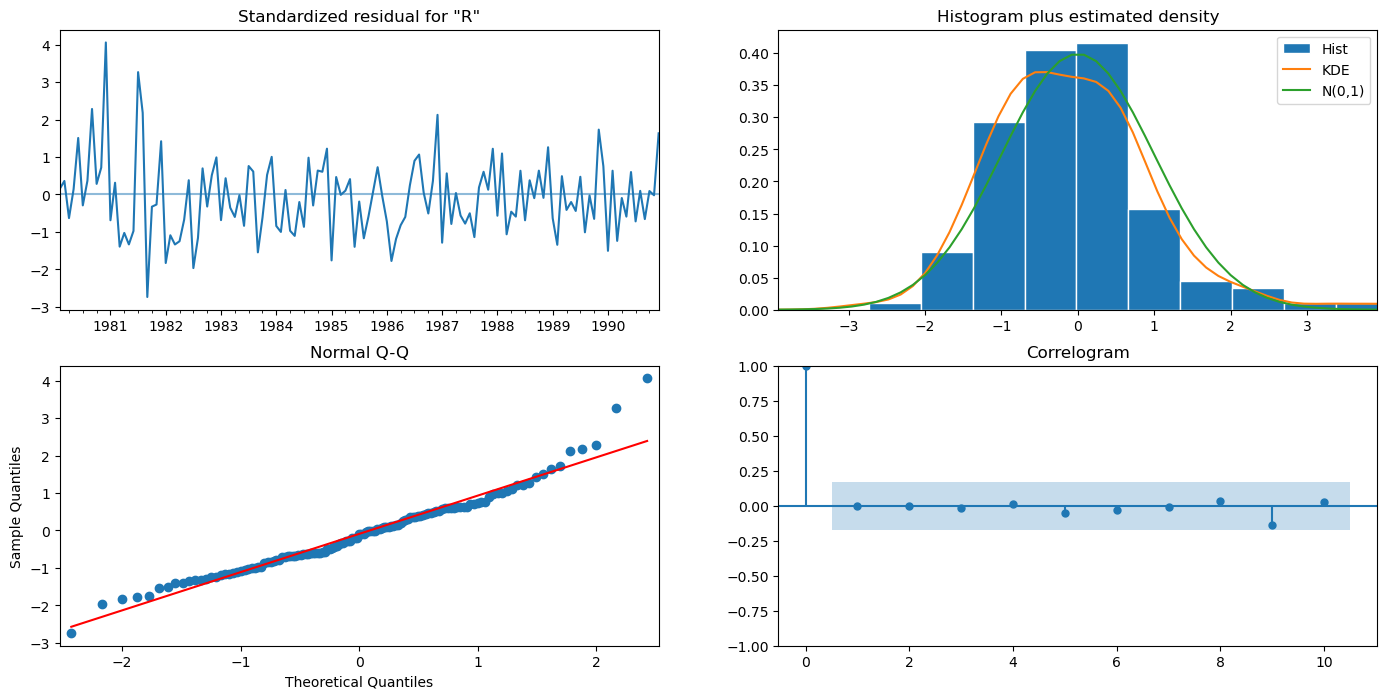

In [1918]:
Rose_results_manual_ARIMA.plot_diagnostics();

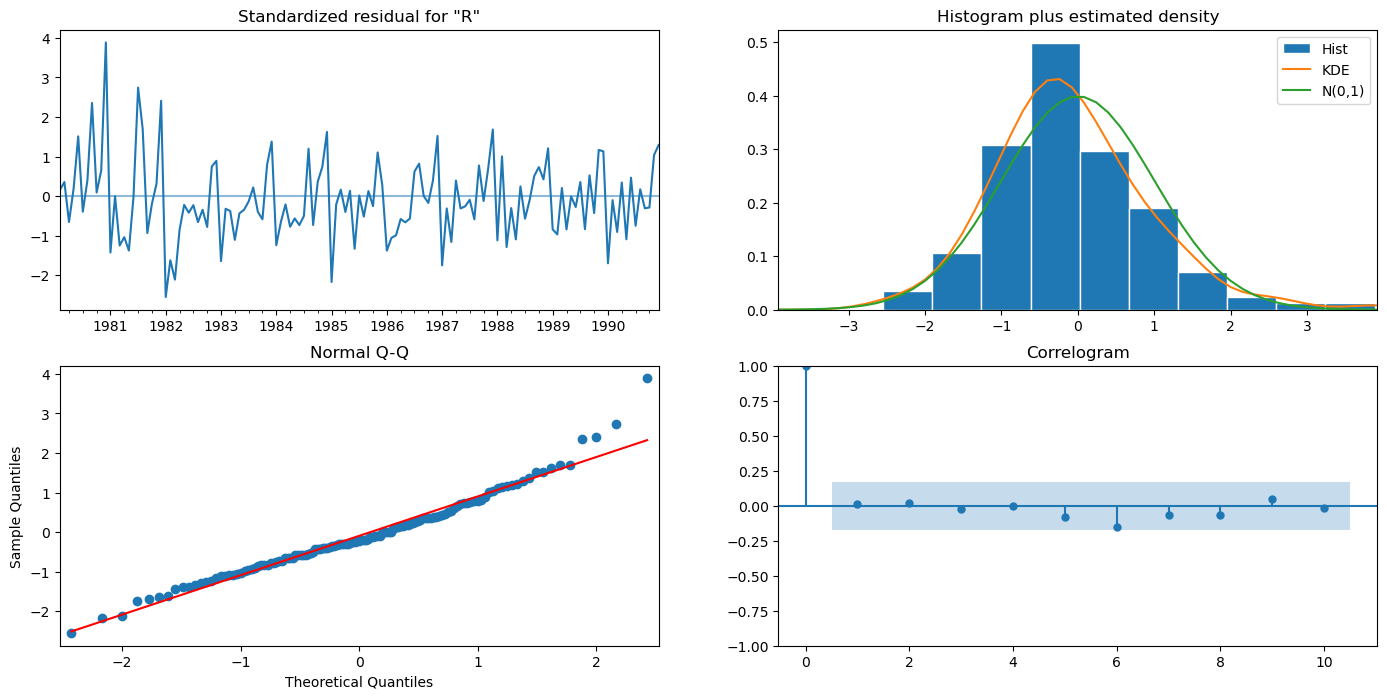

In [1919]:
Rose_results_auto_ARIMA.plot_diagnostics();

##### SARIMA

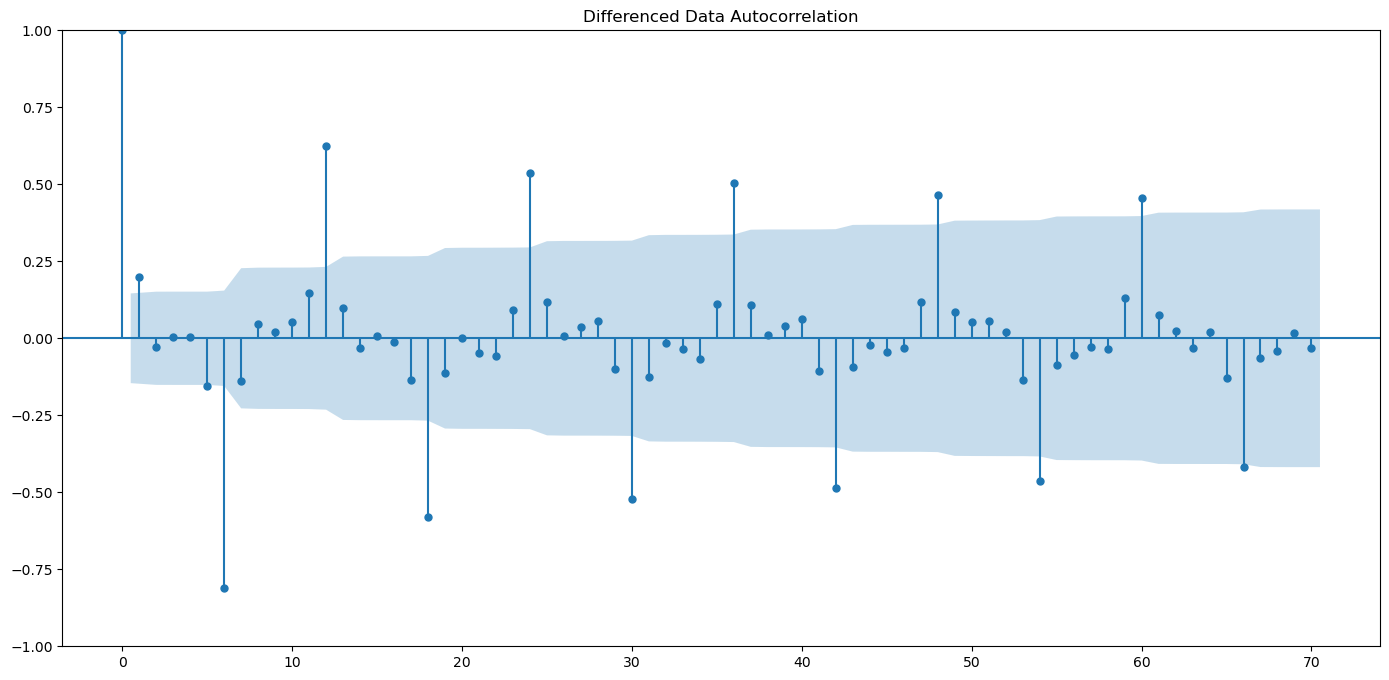

In [1920]:
plot_acf(Rose_wine_time_s['Rose'].diff(6).dropna(),lags=70,title='Differenced Data Autocorrelation')
plt.show()

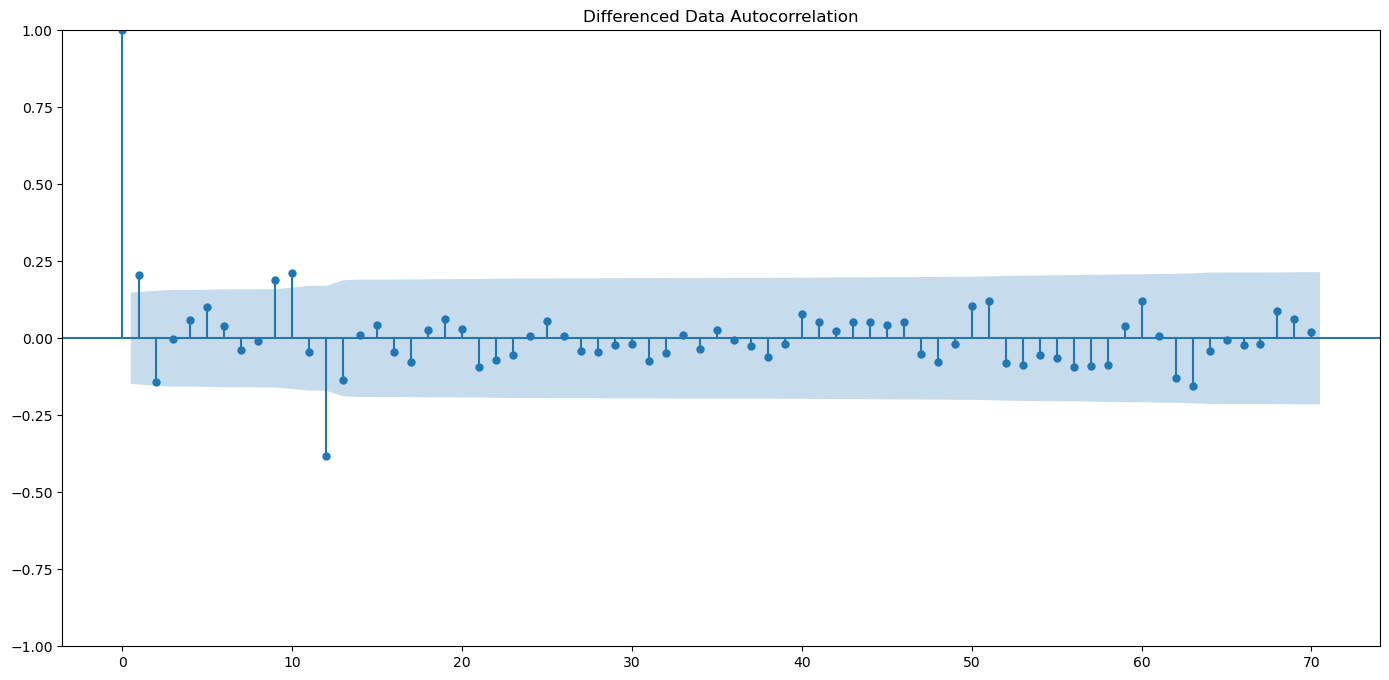

In [1921]:
plot_acf(Rose_wine_time_s['Rose'].diff(12).dropna(),lags=70,title='Differenced Data Autocorrelation')
plt.show()

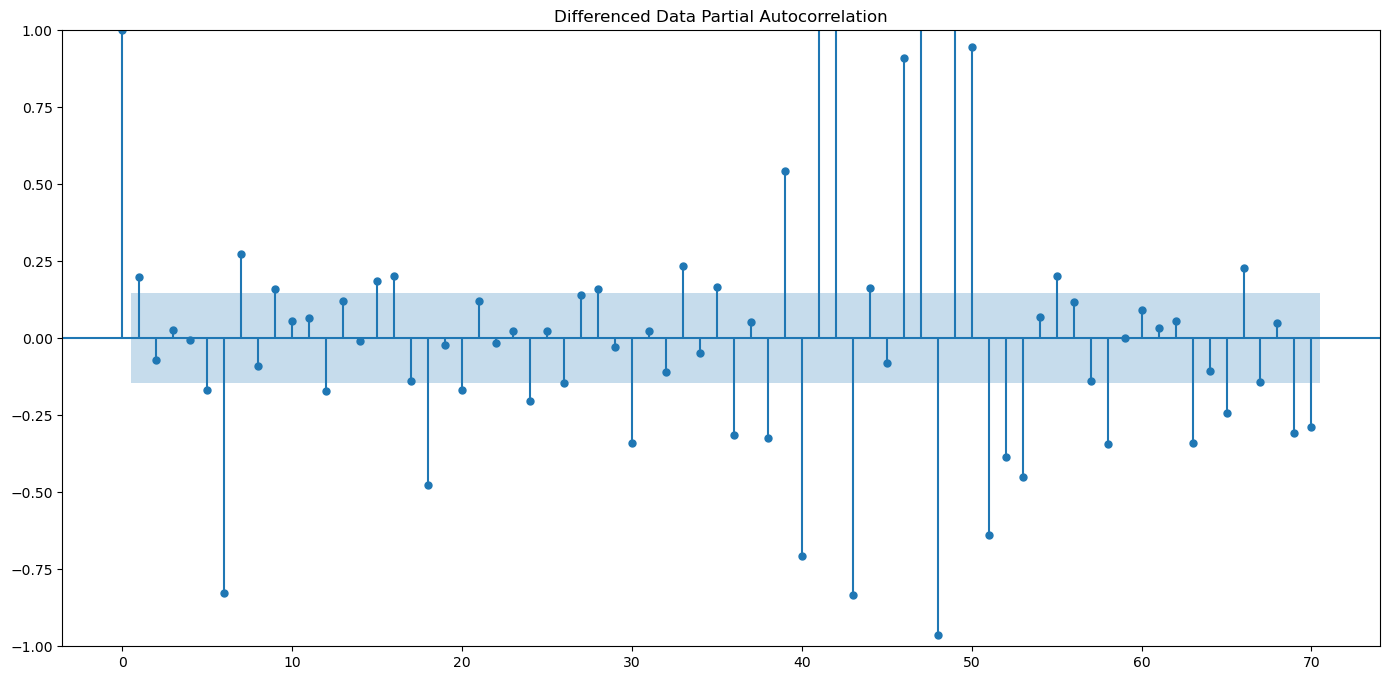

In [1922]:
plot_pacf(Rose_wine_time_s['Rose'].diff(6).dropna(),lags=70,title='Differenced Data Partial Autocorrelation')
plt.show()

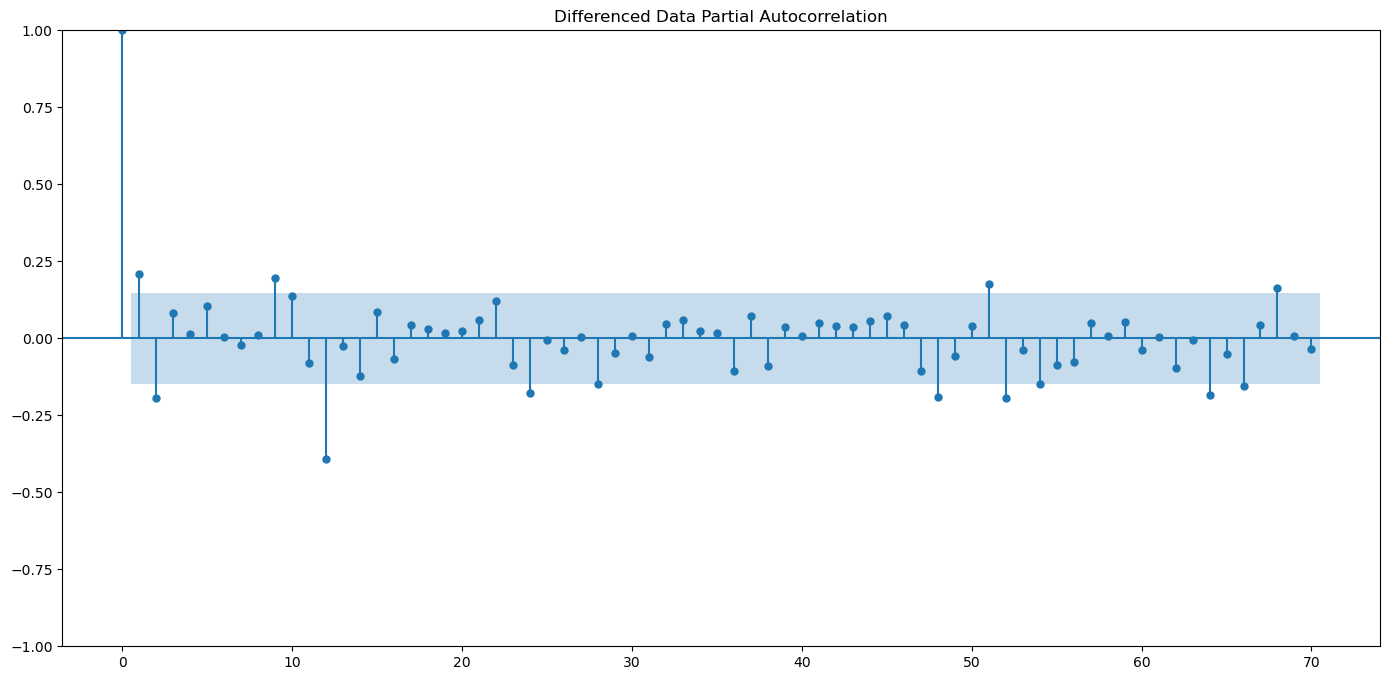

In [1923]:
plot_pacf(Rose_wine_time_s['Rose'].diff(12).dropna(),lags=70,title='Differenced Data Partial Autocorrelation')
plt.show()

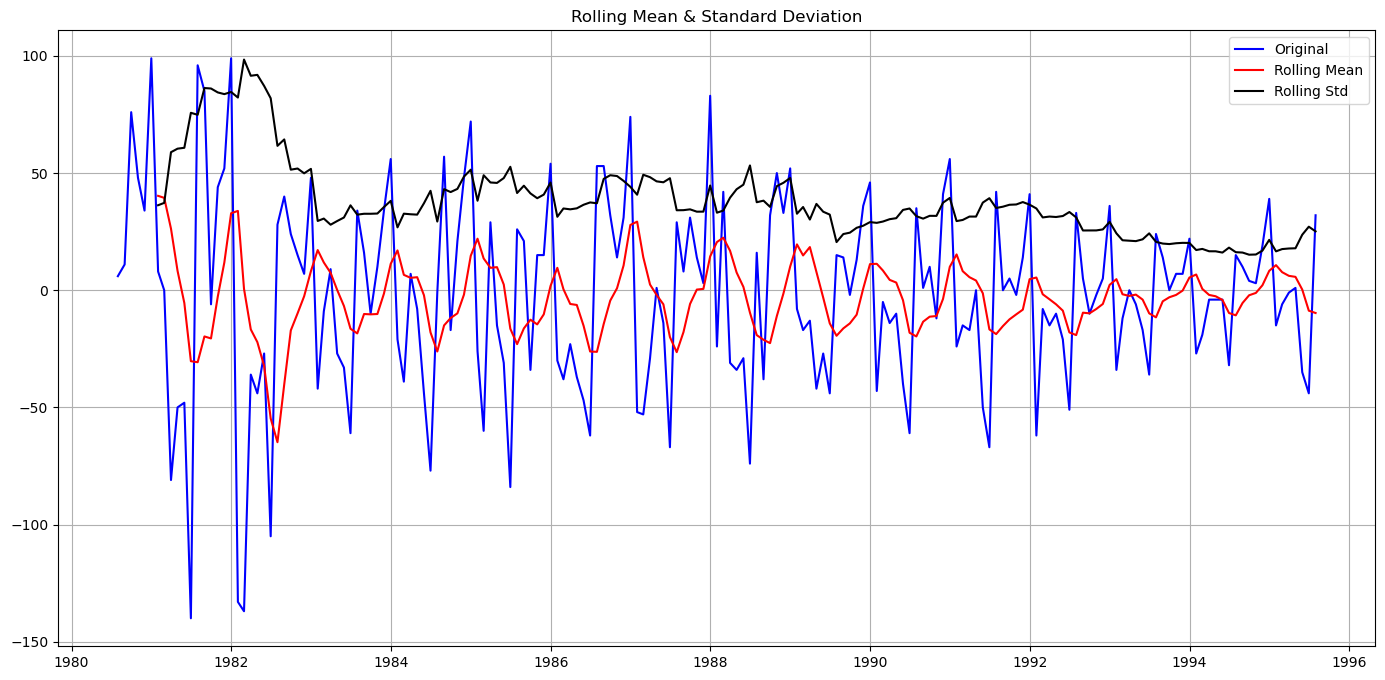

Results of Dickey-Fuller Test:
Test Statistic                 -9.19
p-value                         0.00
#Lags Used                      6.00
Number of Observations Used   174.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [1924]:
test_stationarity(Rose_wine_time_s['Rose'].diff(6).dropna())

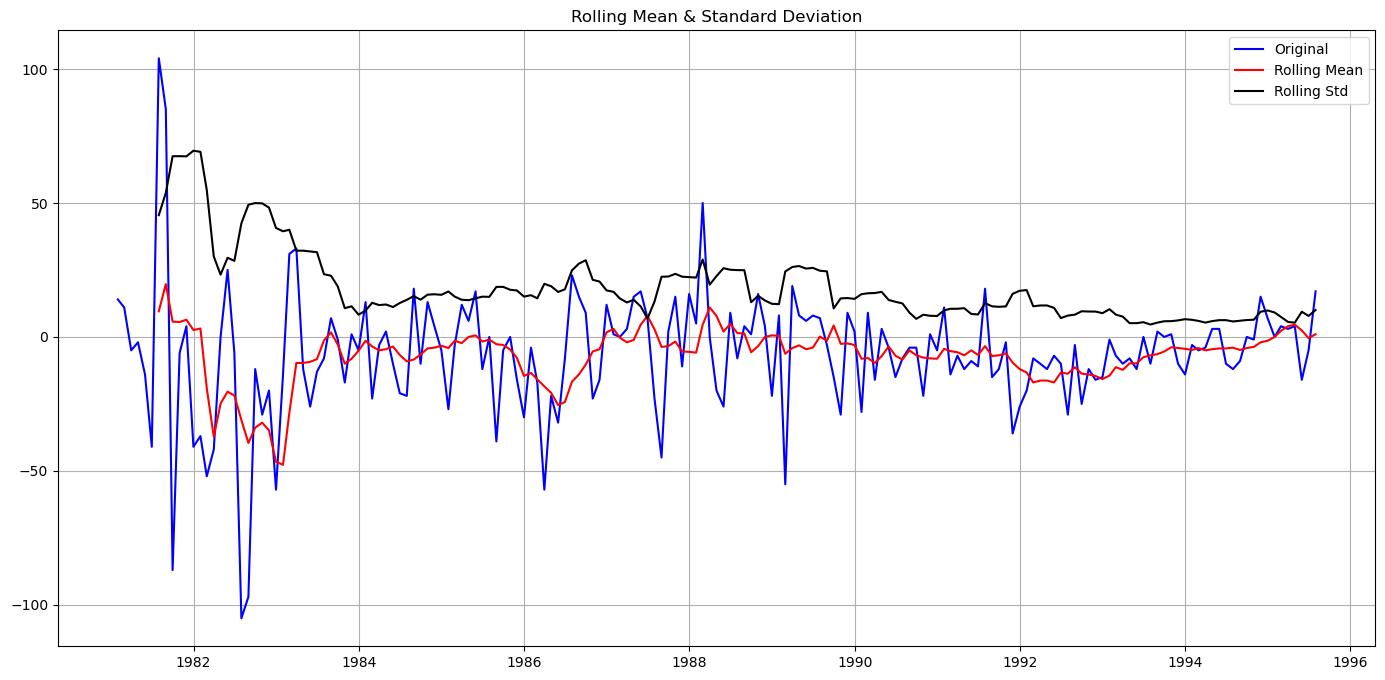

Results of Dickey-Fuller Test:
Test Statistic                 -4.25
p-value                         0.00
#Lags Used                     11.00
Number of Observations Used   163.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [1925]:
test_stationarity(Rose_wine_time_s['Rose'].diff(12).dropna())

Based on the Differenence ACF chart the Sesonality is 6 and 12

In [1926]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(0,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 0)(0, 0, 0, 6)
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [1927]:
Rose_SARIMA_AIC_6 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
Rose_SARIMA_AIC_6

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [1928]:
for param in pdq:
    for param_seasonal in model_pdq:
        Rose_SARIMA_model_6 = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,  ## by force you can make it TS stationary
                                            enforce_invertibility=False) ## Alpha and Beta should be unique
            
        Rose_results_SARIMA_6 = Rose_SARIMA_model_6.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, Rose_results_SARIMA_6.aic))
        Rose_SARIMA_AIC_6 = Rose_SARIMA_AIC_6.append({'param':param,'seasonal':param_seasonal ,'AIC': Rose_results_SARIMA_6.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.499626111385
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827024
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149077
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266722137
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515045
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426299517
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029548
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752773
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.435473574505
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.438625374632
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.856412352757
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.749037998307
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.6455189098942
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.004408262503
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC

In [1929]:
Rose_SARIMA_AIC_6.sort_values(by=['AIC'],ascending=True).head()

param      seasonal     AIC
53  (1, 1, 2)  (2, 0, 2, 6) 1041.66
26  (0, 1, 2)  (2, 0, 2, 6) 1043.60
80  (2, 1, 2)  (2, 0, 2, 6) 1045.22
71  (2, 1, 1)  (2, 0, 2, 6) 1051.67
44  (1, 1, 1)  (2, 0, 2, 6) 1052.78

In [1930]:
Rose_auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Rose_results_auto_SARIMA_6 = Rose_auto_SARIMA_6.fit(maxiter=1000)
print(Rose_results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Sun, 19 Feb 2023   AIC                           1041.656
Time:                                   16:38:16   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5939      0.151     -3.922      0.000      -0.891      -0.297
ma.L1         -0.1954    723.411     -0.000

In [1931]:
Rose_predicted_auto_SARIMA_6 = Rose_results_auto_SARIMA_6.get_forecast(steps=len(Rose_test))
Rose_predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y  mean  mean_se  mean_ci_lower  mean_ci_upper
0 62.84    18.85          25.90          99.78
1 67.63    19.30          29.80         105.46
2 74.75    19.41          36.70         112.79
3 71.33    19.48          33.15         109.50
4 76.02    19.48          37.83         114.21

In [1932]:
#RMSE
Rose_SARIMA_rmse_auto_6 = mean_squared_error(Rose_test['Rose'],Rose_predicted_auto_SARIMA_6.predicted_mean,squared=False)
Rose_SARIMA_resultsDf3_6 = pd.DataFrame({'RMSE': [Rose_SARIMA_rmse_auto_6]},index=['Rose - Auto - SARIMA(1,1,2)(2,0,2,6)'])


Rose_ARIMA_resultsDf = pd.concat([Rose_ARIMA_resultsDf,Rose_SARIMA_resultsDf3_6])

Rose_ARIMA_resultsDf

RMSE
Rose - Auto - ARIMA(2,1,3)            36.84
Rose - Max Error Possible            104.94
Rose - Manual - ARIMA(3,1,13)         35.00
Rose - Auto - SARIMA(1,1,2)(2,0,2,6)  26.16

In [1933]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(0,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 0)(0, 0, 0, 12)
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [1934]:
Rose_SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
Rose_SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [1935]:
for param in pdq:
    for param_seasonal in model_pdq:
        Rose_SARIMA_model = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,  ## by force you can make it TS stationary
                                            enforce_invertibility=False) ## Alpha and Beta should be unique
            
        Rose_results_SARIMA = Rose_SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, Rose_results_SARIMA.aic))
        Rose_SARIMA_AIC = Rose_SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': Rose_results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207386
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.437529638089
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385622
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635755603
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.879454069761
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945507
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383893
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918728
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094765
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483298031
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535938
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461674
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.198827793253
SARIMA(0, 1, 2)x(0, 0, 0,

In [1936]:
Rose_SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

param       seasonal    AIC
26  (0, 1, 2)  (2, 0, 2, 12) 887.94
80  (2, 1, 2)  (2, 0, 2, 12) 890.67
69  (2, 1, 1)  (2, 0, 0, 12) 896.52
53  (1, 1, 2)  (2, 0, 2, 12) 896.69
78  (2, 1, 2)  (2, 0, 0, 12) 897.35

In [1937]:
Rose_auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Rose_results_auto_SARIMA_12 = Rose_auto_SARIMA_12.fit(maxiter=1000)
print(Rose_results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 19 Feb 2023   AIC                            887.938
Time:                                    16:38:39   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.766     -0.004      0.996    -372.778     371.092
ma.L2         -0.1573     29.813   

In [1938]:
Rose_predicted_auto_SARIMA_12 = Rose_results_auto_SARIMA_12.get_forecast(steps=len(Rose_test))
Rose_predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y  mean  mean_se  mean_ci_lower  mean_ci_upper
0 62.87    15.93          31.65          94.09
1 70.54    16.15          38.89         102.19
2 77.36    16.15          45.71         109.01
3 76.21    16.15          44.56         107.86
4 72.75    16.15          41.10         104.40

In [1939]:
#RMSE
Rose_SARIMA_rmse_auto = mean_squared_error(Rose_test['Rose'],Rose_predicted_auto_SARIMA_12.predicted_mean,squared=False)
Rose_SARIMA_resultsDf3 = pd.DataFrame({'RMSE': [Rose_SARIMA_rmse_auto]},index=['Rose - Auto - SARIMA(0,1,2)(2,0,2,12)'])


Rose_ARIMA_resultsDf = pd.concat([Rose_ARIMA_resultsDf,Rose_SARIMA_resultsDf3])

Rose_ARIMA_resultsDf

RMSE
Rose - Auto - ARIMA(2,1,3)             36.84
Rose - Max Error Possible             104.94
Rose - Manual - ARIMA(3,1,13)          35.00
Rose - Auto - SARIMA(1,1,2)(2,0,2,6)   26.16
Rose - Auto - SARIMA(0,1,2)(2,0,2,12)  26.95

Manual SARIMA

In [1940]:
Rose_manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                order=(3, 1, 5),
                                seasonal_order=(1, 0, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Rose_results_manual_SARIMA_6 = Rose_manual_SARIMA_6.fit(maxiter=1000)
print(Rose_results_manual_SARIMA_6.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 5)x(1, 0, [1], 6)   Log Likelihood                -536.371
Date:                             Sun, 19 Feb 2023   AIC                           1094.741
Time:                                     16:38:41   BIC                           1125.312
Sample:                                          0   HQIC                          1107.155
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0183      0.018     -0.992      0.321      -0.054       0.018
ar.L2         -0.0292      

In [1941]:
Rose_predicted_manual_SARIMA_6 = Rose_results_manual_SARIMA_6.get_forecast(steps=len(Rose_test))
Rose_predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y  mean  mean_se  mean_ci_lower  mean_ci_upper
0 69.38    20.62          28.96         109.80
1 67.92    21.25          26.26         109.58
2 78.16    21.36          36.30         120.02
3 84.28    21.59          41.97         126.59
4 81.38    21.86          38.54         124.23

In [1942]:
#RMSE
Rose_SARIMA_rmse_manual_6 = mean_squared_error(Rose_test['Rose'],Rose_predicted_manual_SARIMA_6.predicted_mean,squared=False)
Rose_SARIMA_resultsDf4_6 = pd.DataFrame({'RMSE': [Rose_SARIMA_rmse_manual_6]},index=['Rose - Manual - SARIMA(3,1,5)(1,0,1,6)'])


Rose_ARIMA_resultsDf = pd.concat([Rose_ARIMA_resultsDf,Rose_SARIMA_resultsDf4_6])

Rose_ARIMA_resultsDf

RMSE
Rose - Auto - ARIMA(2,1,3)              36.84
Rose - Max Error Possible              104.94
Rose - Manual - ARIMA(3,1,13)           35.00
Rose - Auto - SARIMA(1,1,2)(2,0,2,6)    26.16
Rose - Auto - SARIMA(0,1,2)(2,0,2,12)   26.95
Rose - Manual - SARIMA(3,1,5)(1,0,1,6)  31.81

In [1943]:
Rose_manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                order=(3, 1, 11),
                                seasonal_order=(2, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Rose_results_manual_SARIMA_12 = Rose_manual_SARIMA_12.fit(maxiter=1000)
print(Rose_results_manual_SARIMA_12.summary())

                                       SARIMAX Results                                       
Dep. Variable:                                     y   No. Observations:                  132
Model:             SARIMAX(3, 1, 11)x(2, 0, [1], 12)   Log Likelihood                -429.571
Date:                               Sun, 19 Feb 2023   AIC                            895.141
Time:                                       16:38:44   BIC                            942.741
Sample:                                            0   HQIC                           914.425
                                               - 132                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1701      1.197      0.142      0.887      -2.175       2.515
ar.L2      

In [1944]:
Rose_predicted_manual_SARIMA_12 = Rose_results_manual_SARIMA_12.get_forecast(steps=len(Rose_test))
Rose_predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y  mean  mean_se  mean_ci_lower  mean_ci_upper
0 64.82    14.73          35.96          93.69
1 68.98    14.87          39.83          98.13
2 72.51    14.88          43.35         101.66
3 75.18    14.88          46.01         104.35
4 70.57    14.90          41.37          99.77

In [1945]:
#RMSE
Rose_SARIMA_rmse_manual_12 = mean_squared_error(Rose_test['Rose'],Rose_predicted_manual_SARIMA_12.predicted_mean,squared=False)
Rose_SARIMA_resultsDf4_12 = pd.DataFrame({'RMSE': [Rose_SARIMA_rmse_manual_12]},index=['Rose - Manual - SARIMA(3,1,11)(2,0,1,12)'])


Rose_ARIMA_resultsDf = pd.concat([Rose_ARIMA_resultsDf,Rose_SARIMA_resultsDf4_12])

Rose_ARIMA_resultsDf

RMSE
Rose - Auto - ARIMA(2,1,3)                36.84
Rose - Max Error Possible                104.94
Rose - Manual - ARIMA(3,1,13)             35.00
Rose - Auto - SARIMA(1,1,2)(2,0,2,6)      26.16
Rose - Auto - SARIMA(0,1,2)(2,0,2,12)     26.95
Rose - Manual - SARIMA(3,1,5)(1,0,1,6)    31.81
Rose - Manual - SARIMA(3,1,11)(2,0,1,12)  27.18

##### Prediction on Full Data

In [1946]:
Rose_manual_SARIMA_12_month_future = sm.tsa.statespace.SARIMAX(Rose_wine_time_s['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Rose_results_manual_SARIMA_12_month_future = Rose_manual_SARIMA_12_month_future.fit(maxiter=1000)
print(Rose_results_manual_SARIMA_12_month_future.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -647.372
Date:                            Sun, 19 Feb 2023   AIC                           1308.744
Time:                                    16:38:45   BIC                           1330.226
Sample:                                         0   HQIC                          1317.468
                                            - 187                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7656      0.088     -8.739      0.000      -0.937      -0.594
ma.L2         -0.1389      0.081   

In [1947]:
Rose_predicted_manual_SARIMA_12_month_future = Rose_results_manual_SARIMA_12_month_future.get_forecast(steps=12)
Rose_predicted_manual_SARIMA_12_month_future_date = Rose_predicted_manual_SARIMA_12_month_future.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))
Rose_predicted_manual_SARIMA_12_month_future.summary_frame(alpha=0.05).head()

y  mean  mean_se  mean_ci_lower  mean_ci_upper
0 47.14    14.12          19.48          74.81
1 44.08    14.50          15.66          72.50
2 47.18    14.56          18.64          75.72
3 52.50    14.62          23.84          81.16
4 69.60    14.69          40.82          98.38

In [1948]:
Rose_rmse_12_month_future = mean_squared_error(Rose_wine_time_s['Rose'],Rose_results_manual_SARIMA_12_month_future.fittedvalues,squared=False)
print('RMSE of the Full Model',Rose_rmse_12_month_future)

RMSE of the Full Model 27.67694763425783


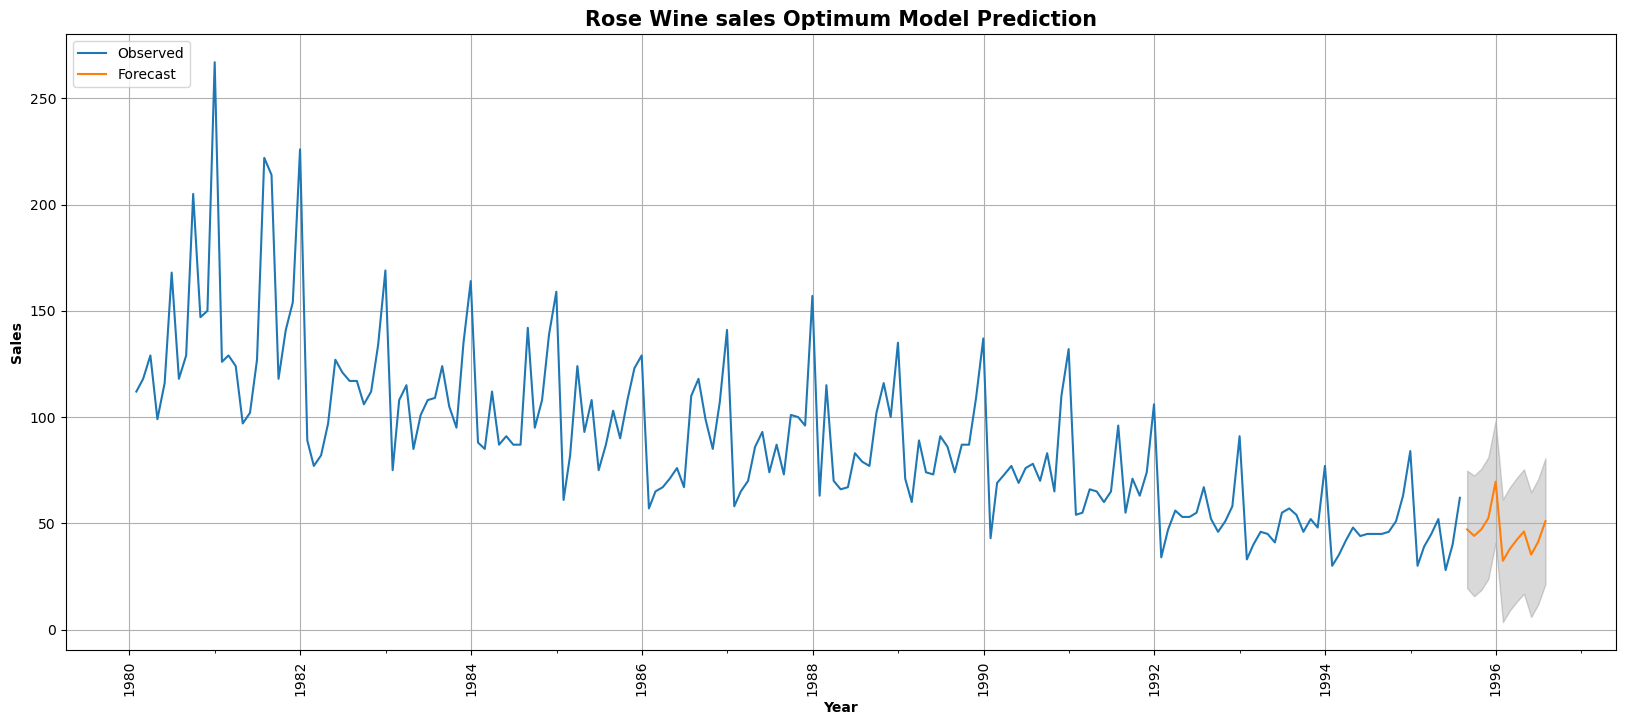

In [1949]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(Rose_wine_time_s.index.values,Rose_wine_time_s['Rose'])
ax.plot(Rose_predicted_manual_SARIMA_12_month_future_date.index.values,Rose_predicted_manual_SARIMA_12_month_future_date['mean'])
ax.fill_between(Rose_predicted_manual_SARIMA_12_month_future_date.index.values,Rose_predicted_manual_SARIMA_12_month_future_date['mean_ci_lower'],Rose_predicted_manual_SARIMA_12_month_future_date['mean_ci_upper'],color='k', alpha=.15)
# Rose_predicted_manual_SARIMA_12_month_future_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

# Set title and labels for axes
plt.legend(['Observed','Forecast'],loc="upper left")
plt.title("Rose Wine sales Optimum Model Prediction",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

In [1950]:
Rose_SARIMA_resultsDf5_12 = pd.DataFrame({'RMSE': [Rose_rmse_12_month_future]},index=['Rose - Prediction - 12 Months'])


Rose_ARIMA_resultsDf = pd.concat([Rose_ARIMA_resultsDf,Rose_SARIMA_resultsDf5_12])

Rose_ARIMA_resultsDf

RMSE
Rose - Auto - ARIMA(2,1,3)                36.84
Rose - Max Error Possible                104.94
Rose - Manual - ARIMA(3,1,13)             35.00
Rose - Auto - SARIMA(1,1,2)(2,0,2,6)      26.16
Rose - Auto - SARIMA(0,1,2)(2,0,2,12)     26.95
Rose - Manual - SARIMA(3,1,5)(1,0,1,6)    31.81
Rose - Manual - SARIMA(3,1,11)(2,0,1,12)  27.18
Rose - Prediction - 12 Months             27.68

In [1951]:
Rose_ARIMA_resultsDf.to_excel('Rose_ARIMA_models.xlsx')